In [12]:
#base

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline

In [13]:
class Maze():
    def __init__(self, maze_size=10, num_obst=20):
        obstacle = np.random.choice(maze_size*maze_size - 2, num_obst, replace=False)
        
        # to avoid to put obstacles in the entrance (lower-left corner) or the exit (upper-right corner)
        for i in range(len(obstacle)):
            if obstacle[i] >= maze_size-1:
                obstacle[i] += 1
                if obstacle[i] >= maze_size*(maze_size-1):
                    obstacle[i] += 1
                    if obstacle[i] >= maze_size*maze_size:
                        obstacle[i] -= maze_size*maze_size
        
        self.obstacle = list(obstacle)
        self.size = maze_size
    
    # This method translate each location on 2D-coordinate (x, y) of the square-shaped maze into 1D. For example, if the size of the maze is 
    #10 x 10, the coordinate (3, 5) becomes (5-1)*10 + 3 = [43] on the 1D coordinate.
    def coordinate2index(self, location):
        
        if type(location) == list and type(location[0]) == list:
            for i in range(len(location)):
                location[i] = np.reshape(np.arange(self.size*self.size), [self.size, self.size])[location[i][0]][location[i][1]]
        
        elif type(location) == list and len(location) == 2 and type(location[0]) == int:
            location = np.reshape(np.arange(self.size*self.size), [self.size, self.size])[location[0]][location[1]]
        
        return location
    
    # To visualize the maze.
    def visualize(self):
        self.obstacle = self.coordinate2index(self.obstacle)
        self.map_ = np.ones([self.size, self.size])
        self.map_[-1,0], self.map_[0,-1] = 0,0
       
        self.map_ = np.reshape(self.map_, [1, self.map_.size])

        if type(self.obstacle) == list:
            for i in range(len(self.obstacle)):
                self.map_[0][self.obstacle[i]] = 2

        self.map_[0][self.obstacle] = 2
        self.map_ = np.reshape(self.map_, [self.size, self.size])
        sns.heatmap(self.map_)
        plt.show()

In [14]:
class Agent():
    def __init__(self, states, actions):
        self.Qmat = np.random.random([states.size, len(actions)])
    
    # The agent take his action according to the values of his/her own matrix if the randomly generated value is larger than epsilon (the threshold 
    # between exploiting or exploring)
    def take_action(self, state, epsilon):
        if random.random() >  epsilon:
            action_idx = self.Qmat[state].argmax()
            self.action = actions[action_idx]
        else:
            self.action = random.choice(actions)
    
    def update_Q(self, alpha, gamma, Rmat, state, next_state, actions):
        self.Qmat[state, actions.index(self.action)] = self.Qmat[state, actions.index(self.action)] + alpha*(Rmat[next_state].max() + gamma*self.Qmat[next_state].max() - self.Qmat[state, actions.index(self.action)])

In [15]:
def coordinate2index(maze_size, location):
    if type(location) == list and type(location[0]) == list:
        for i in range(len(location)):
            location[i] = np.reshape(np.arange(maze_size*maze_size), [maze_size, maze_size])[location[i][0]][location[i][1]]
    elif type(location) == list and len(location) == 2 and type(location[0]) == int:
        location = np.reshape(np.arange(maze_size*maze_size), [maze_size, maze_size])[location[0]][location[1]]
    return location

In [16]:
def state_transition(state, action, maze_size, obstacle):
    obstacle = coordinate2index(maze_size, obstacle)
    
    location = np.where(states == state)
    next_state_index = list([np.array(location)[0] + action[0], np.array(location)[1] + action[1]])
    if max(next_state_index) == maze_size or min(next_state_index) == -1: # cannot go because of wall
        next_state = state
    else:
        next_state = list(states[next_state_index])[0]
    
    if type(obstacle) == int:
        obstacle = [obstacle]
    
    if next_state in obstacle:   # cannot go because of obstacle
        next_state = state
    return next_state

In [17]:
def set_Rmat(states, actions, reward):
    #Rmat = np.zeros([states.size, len(actions)])
    Rmat = np.zeros([states.size, len(actions)]) - reward / 100
    Rmat[maze_size-1] = reward
    return Rmat

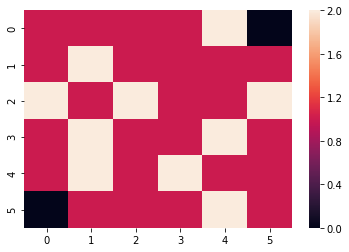

In [18]:
maze_size = 6
num_obstacle = 10
m = Maze(maze_size, num_obstacle)
m.visualize()

In [19]:

# Define states and actions of the agent.
states = np.reshape(np.arange(maze_size**2), [maze_size,maze_size])
actions =[[0,1],[-1,0],[0,-1],[1,0]]

a = Agent(states, actions)

step:0 MAP


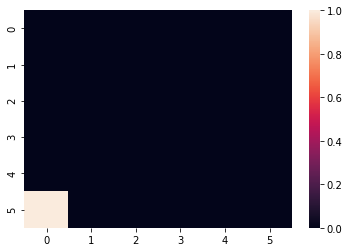

step:1 MAP


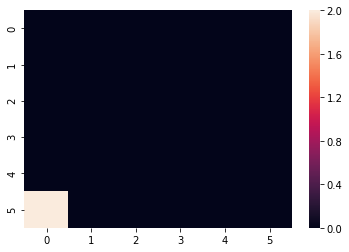

step:2 MAP


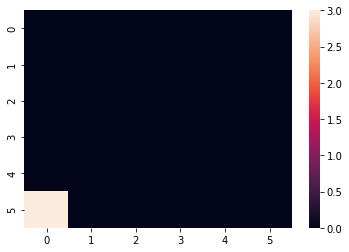

step:3 MAP


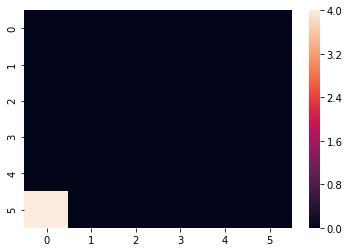

step:4 MAP


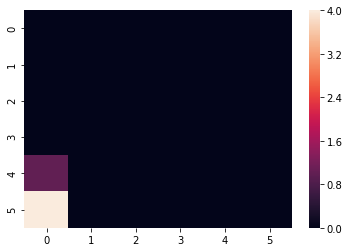

step:5 MAP


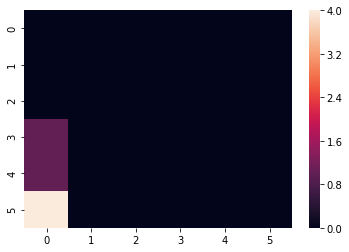

step:6 MAP


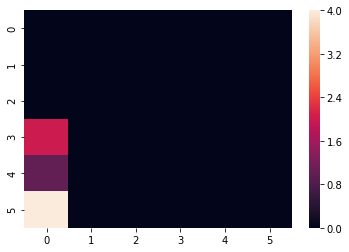

step:7 MAP


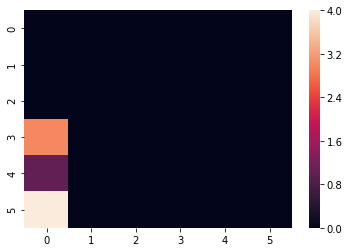

step:8 MAP


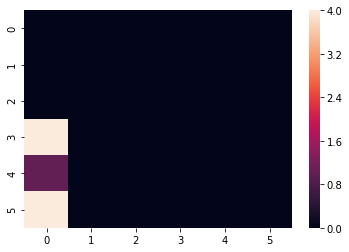

step:9 MAP


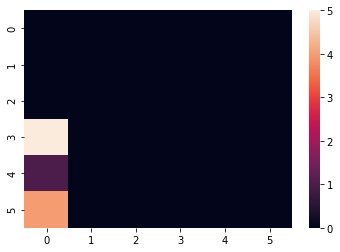

step:10 MAP


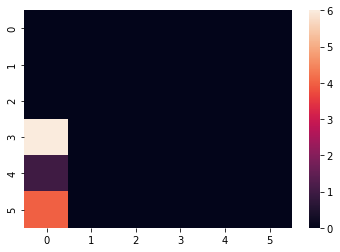

step:11 MAP


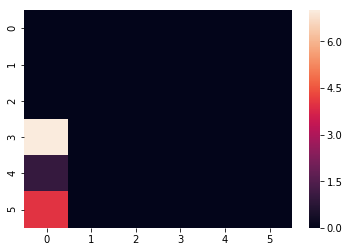

step:12 MAP


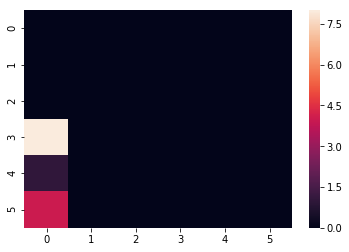

step:13 MAP


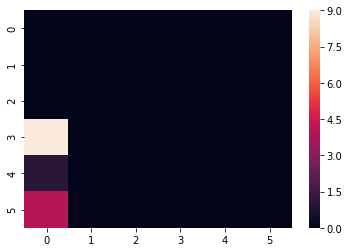

step:14 MAP


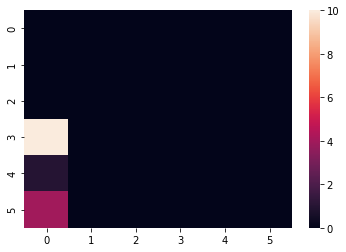

step:15 MAP


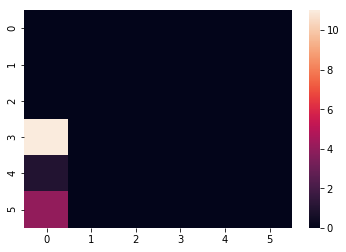

step:16 MAP


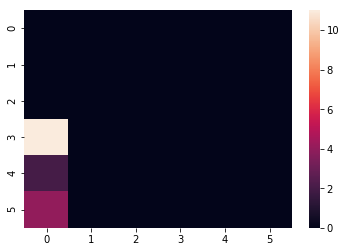

step:17 MAP


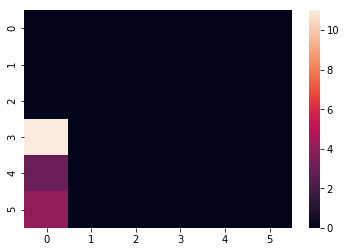

step:18 MAP


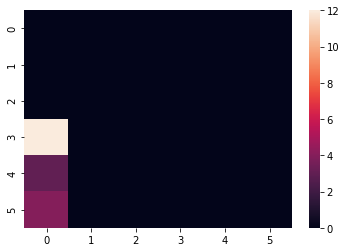

step:19 MAP


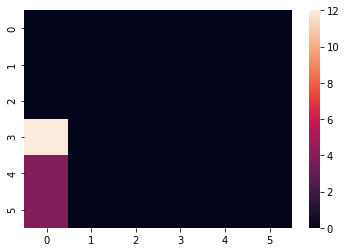

step:20 MAP


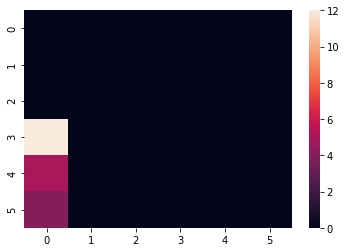

step:21 MAP


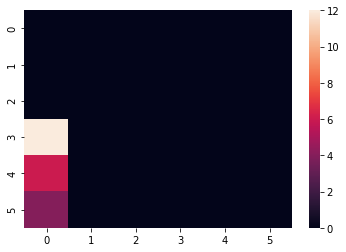

step:22 MAP


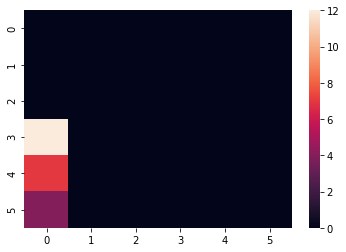

step:23 MAP


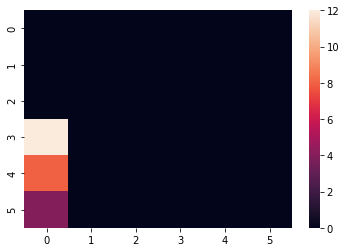

step:24 MAP


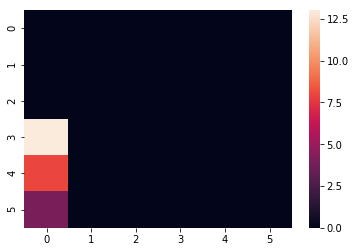

step:25 MAP


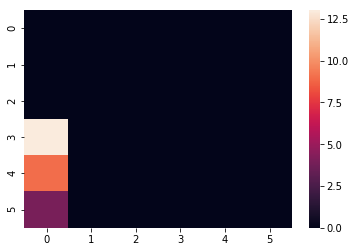

step:26 MAP


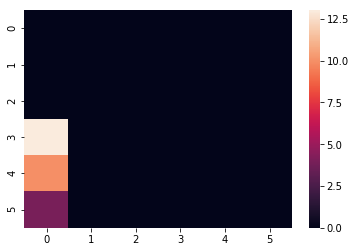

step:27 MAP


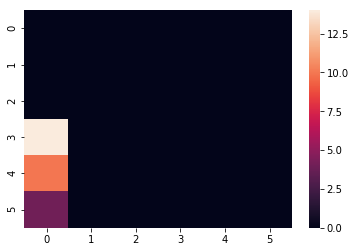

step:28 MAP


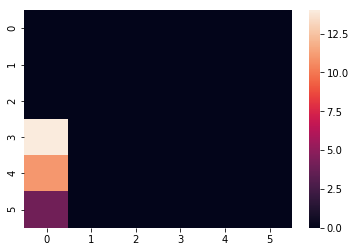

step:29 MAP


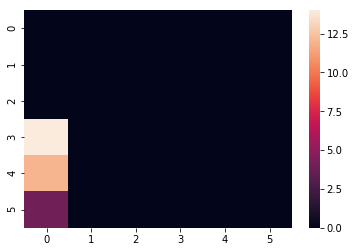

step:30 MAP


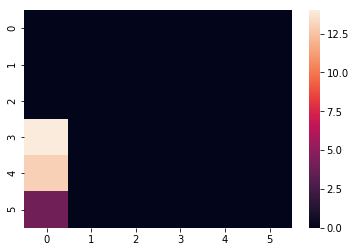

step:31 MAP


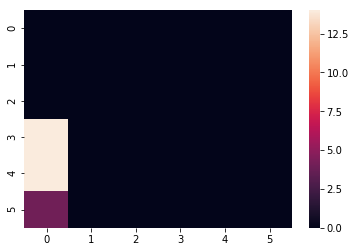

step:32 MAP


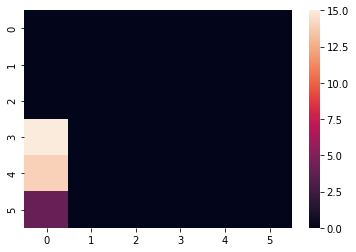

step:33 MAP


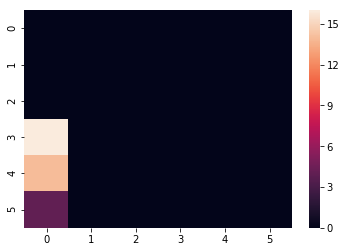

step:34 MAP


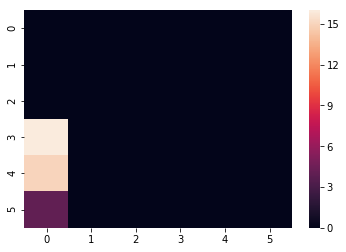

step:35 MAP


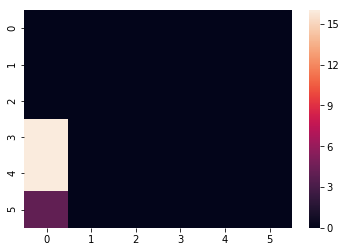

step:36 MAP


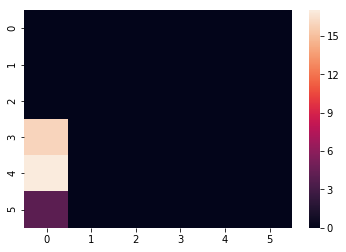

step:37 MAP


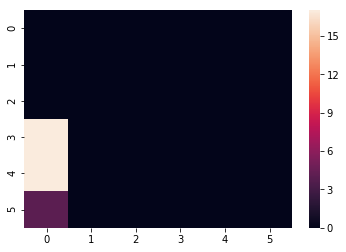

step:38 MAP


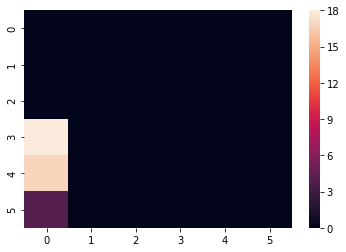

step:39 MAP


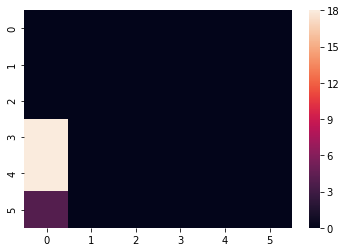

step:40 MAP


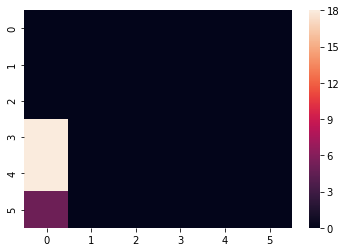

step:41 MAP


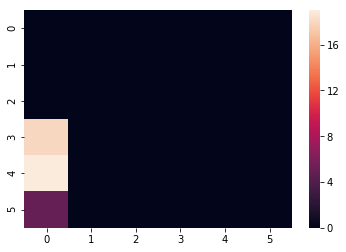

step:42 MAP


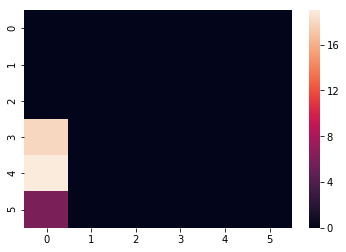

step:43 MAP


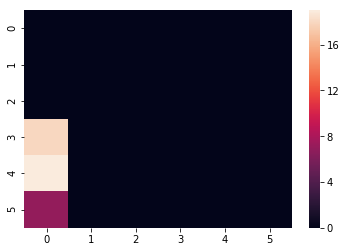

step:44 MAP


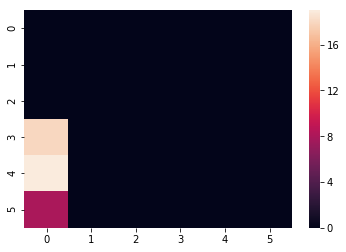

step:45 MAP


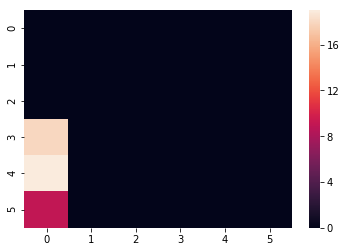

step:46 MAP


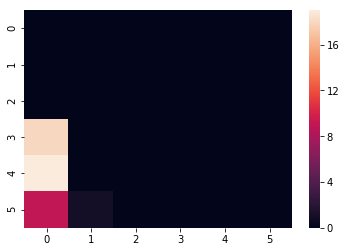

step:47 MAP


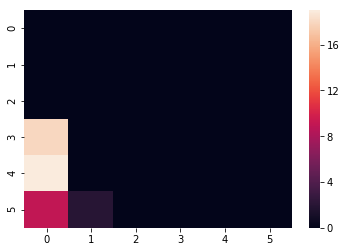

step:48 MAP


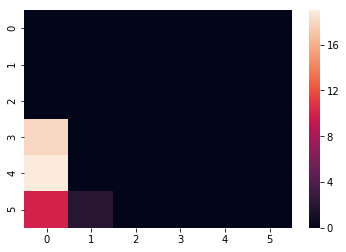

step:49 MAP


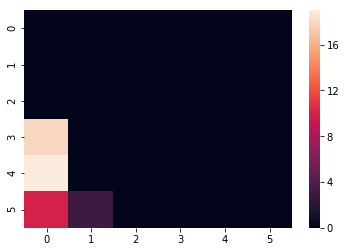

step:50 MAP


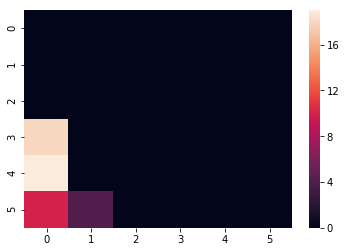

step:51 MAP


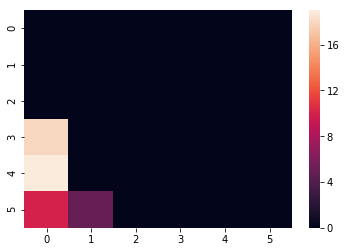

step:52 MAP


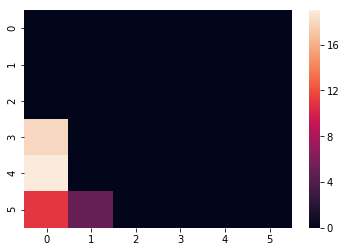

step:53 MAP


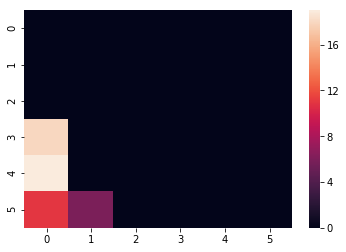

step:54 MAP


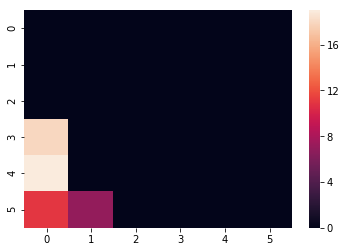

step:55 MAP


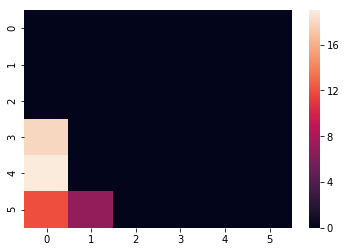

step:56 MAP


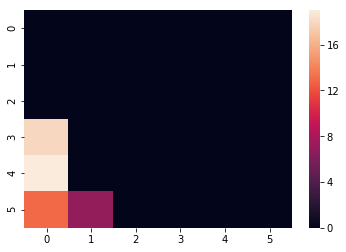

step:57 MAP


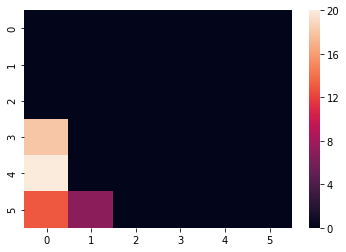

step:58 MAP


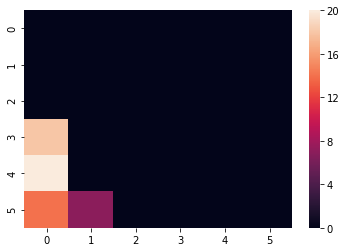

step:59 MAP


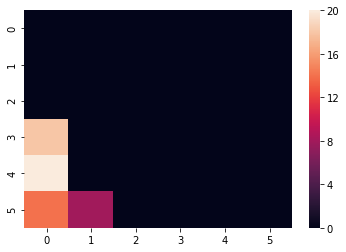

step:60 MAP


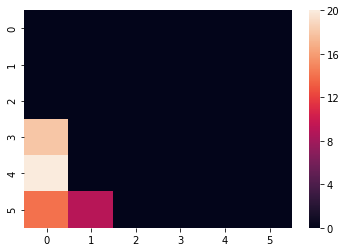

step:61 MAP


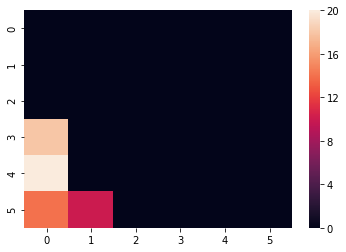

step:62 MAP


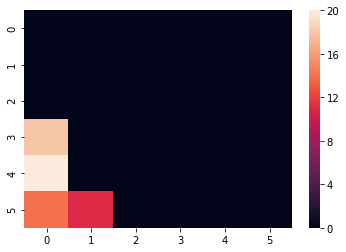

step:63 MAP


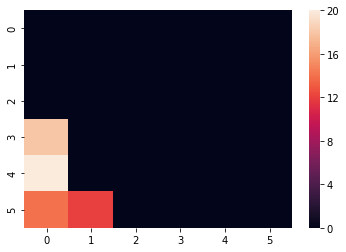

step:64 MAP


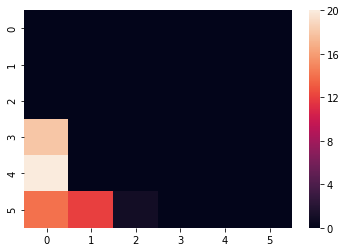

step:65 MAP


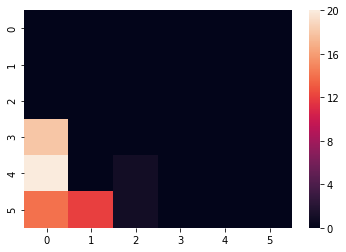

step:66 MAP


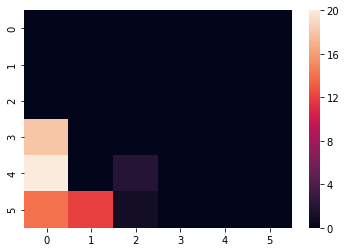

step:67 MAP


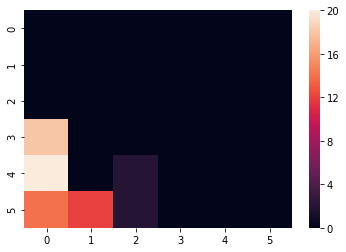

step:68 MAP


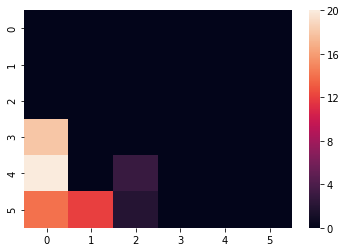

step:69 MAP


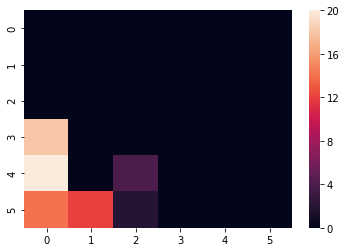

step:70 MAP


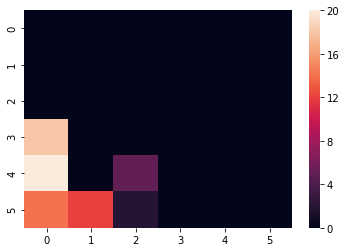

step:71 MAP


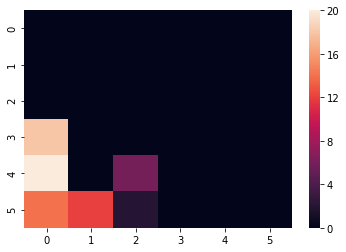

step:72 MAP


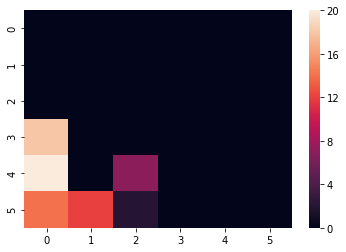

step:73 MAP


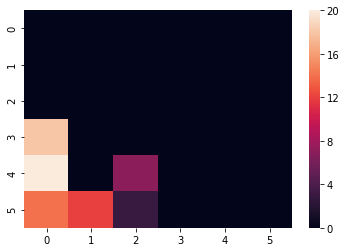

step:74 MAP


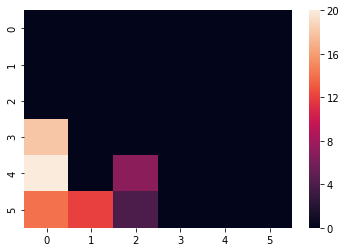

step:75 MAP


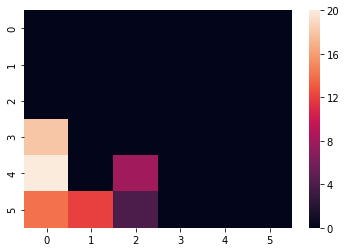

step:76 MAP


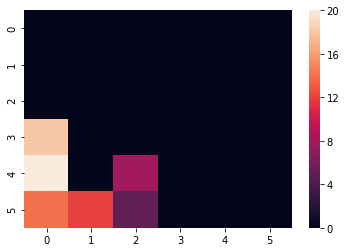

step:77 MAP


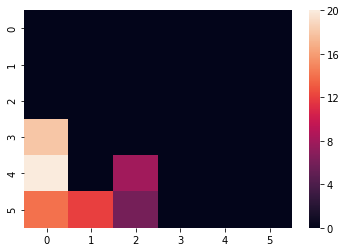

step:78 MAP


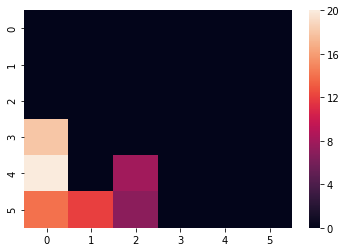

step:79 MAP


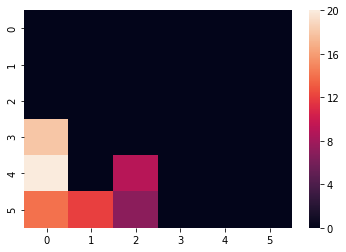

step:80 MAP


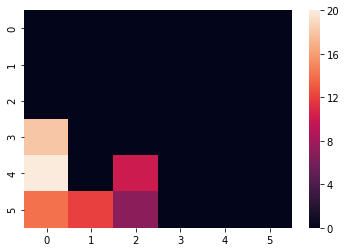

step:81 MAP


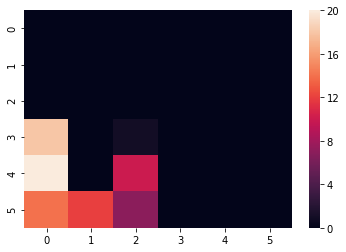

step:82 MAP


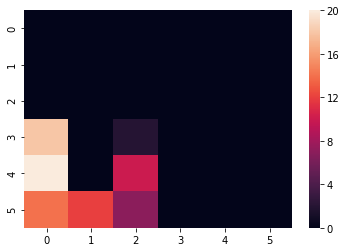

step:83 MAP


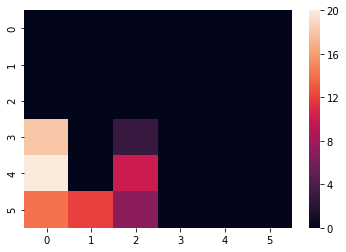

step:84 MAP


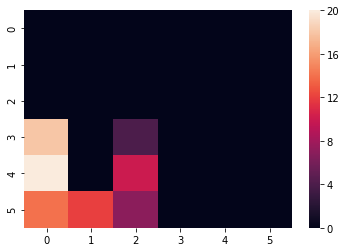

step:85 MAP


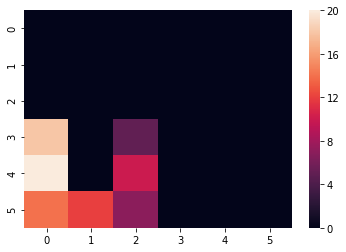

step:86 MAP


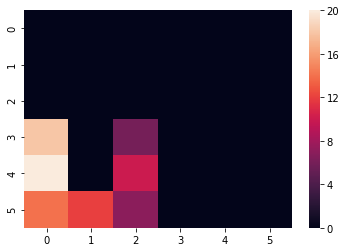

step:87 MAP


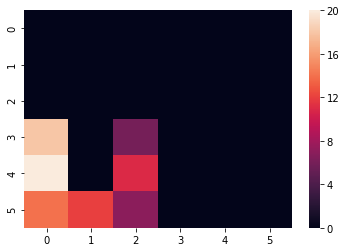

step:88 MAP


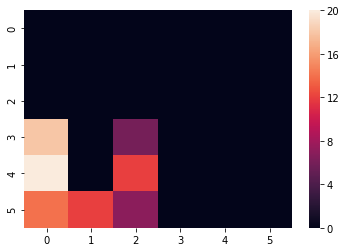

step:89 MAP


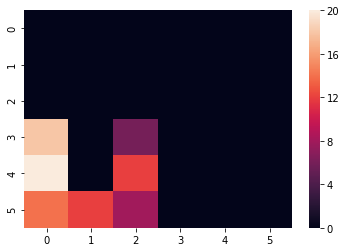

step:90 MAP


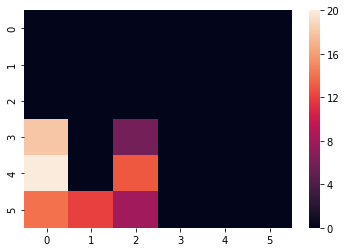

step:91 MAP


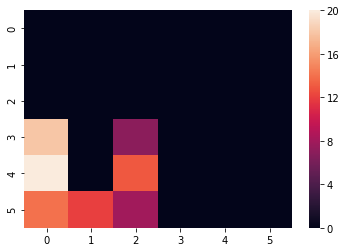

step:92 MAP


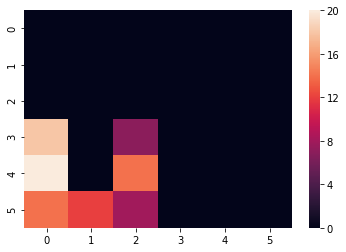

step:93 MAP


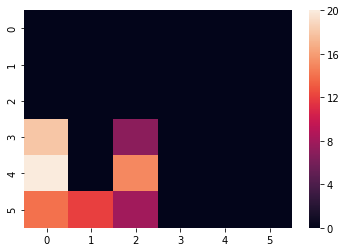

step:94 MAP


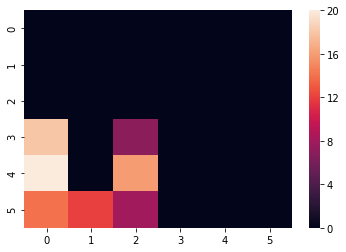

step:95 MAP


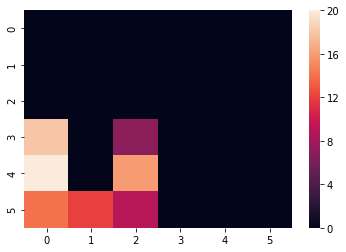

step:96 MAP


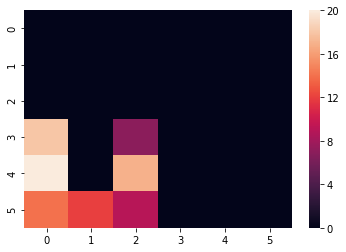

step:97 MAP


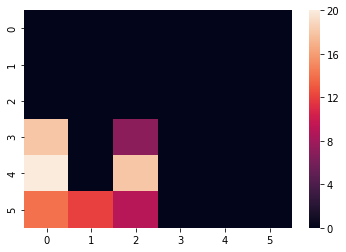

step:98 MAP


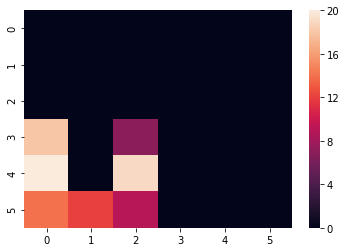

step:99 MAP


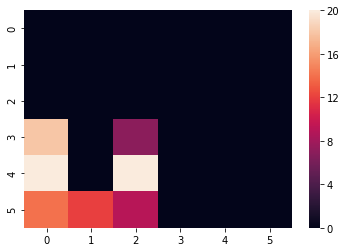

step:100 MAP


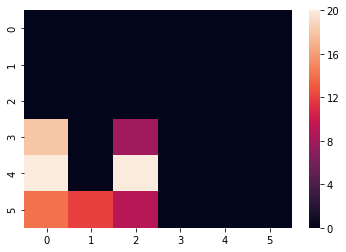

step:101 MAP


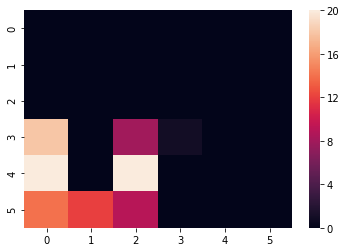

step:102 MAP


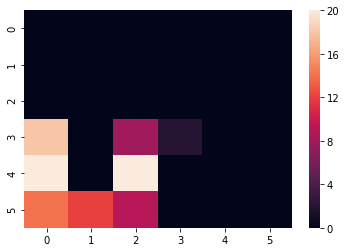

step:103 MAP


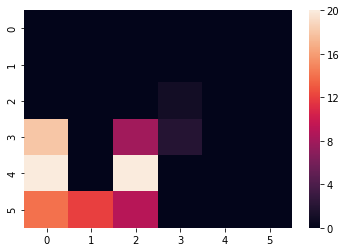

step:104 MAP


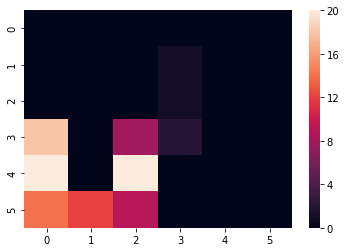

step:105 MAP


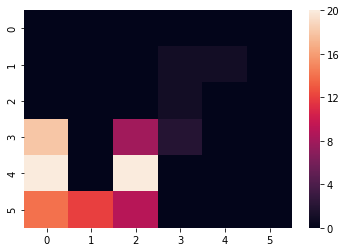

step:106 MAP


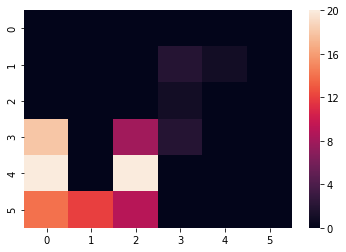

step:107 MAP


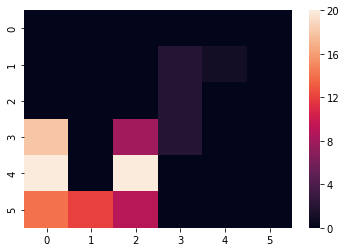

step:108 MAP


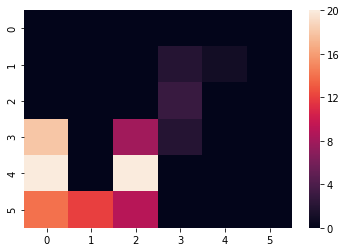

step:109 MAP


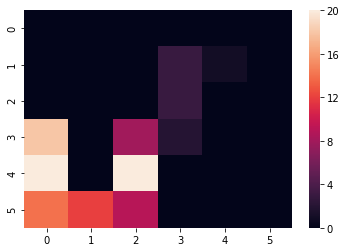

step:110 MAP


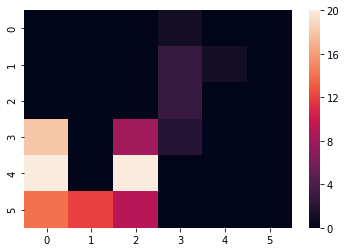

step:111 MAP


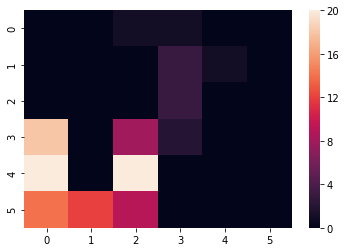

step:112 MAP


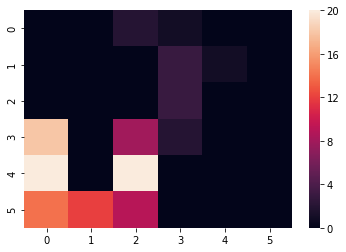

step:113 MAP


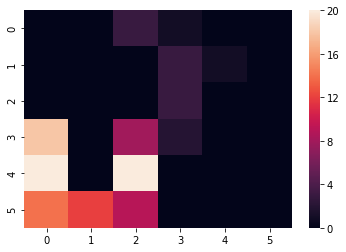

step:114 MAP


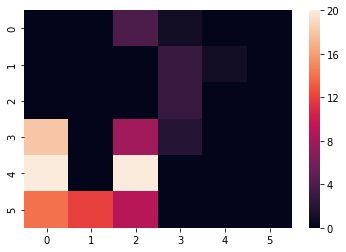

step:115 MAP


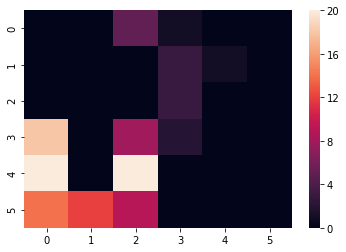

step:116 MAP


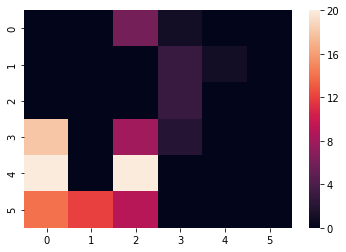

step:117 MAP


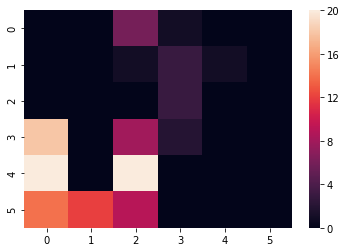

step:118 MAP


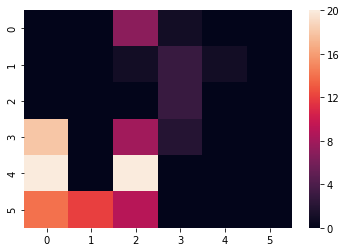

step:119 MAP


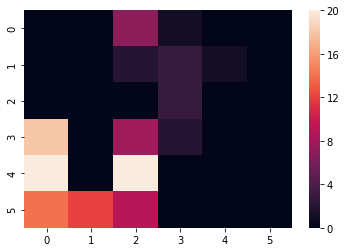

step:120 MAP


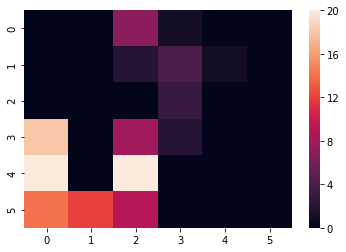

step:121 MAP


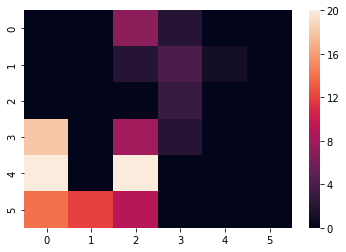

step:122 MAP


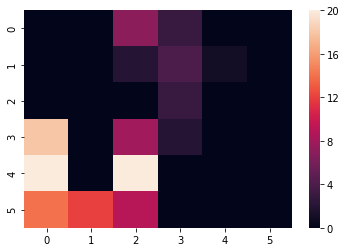

step:123 MAP


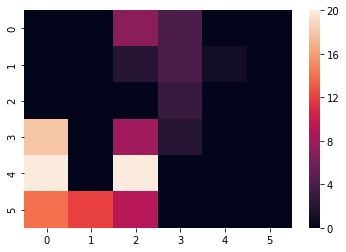

step:124 MAP


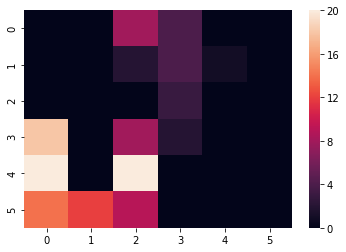

step:125 MAP


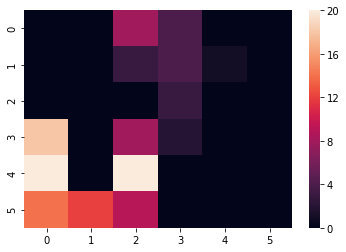

step:126 MAP


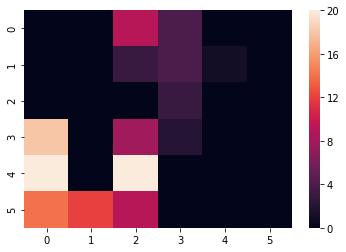

step:127 MAP


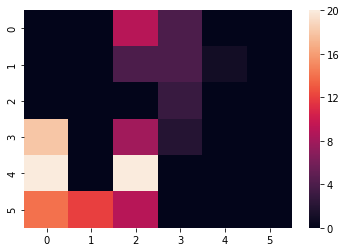

step:128 MAP


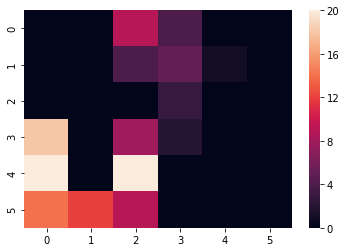

step:129 MAP


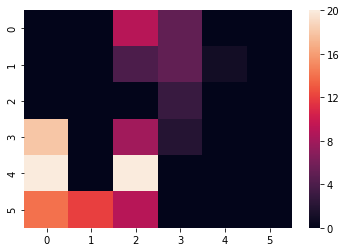

step:130 MAP


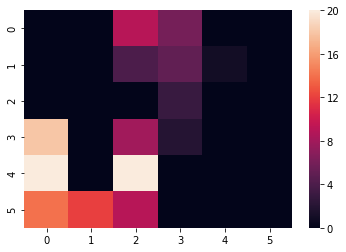

step:131 MAP


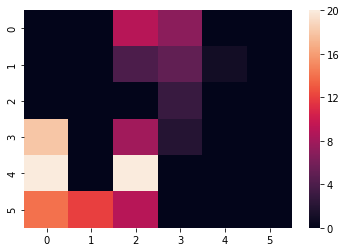

step:132 MAP


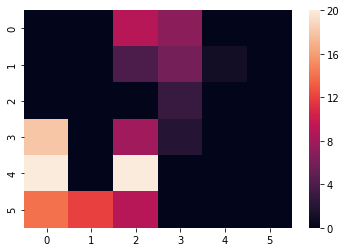

step:133 MAP


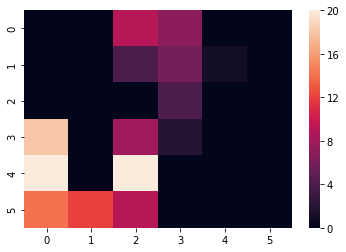

step:134 MAP


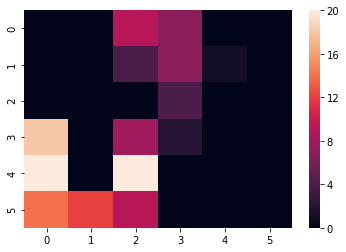

step:135 MAP


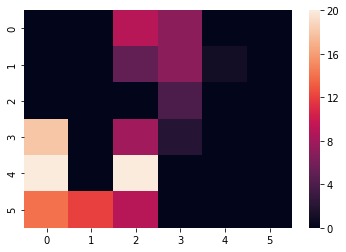

step:136 MAP


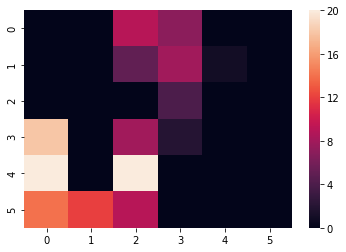

step:137 MAP


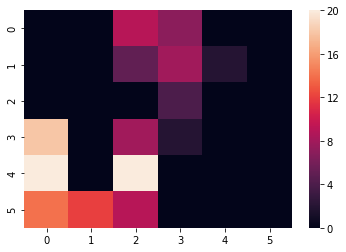

step:138 MAP


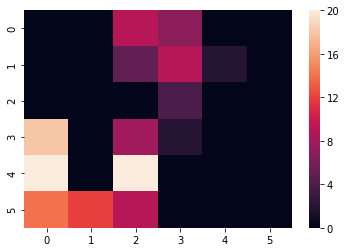

step:139 MAP


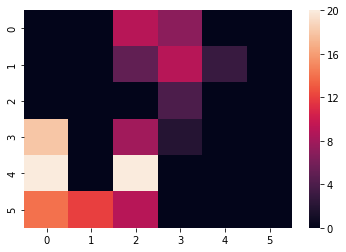

step:140 MAP


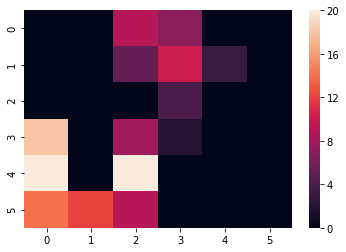

step:141 MAP


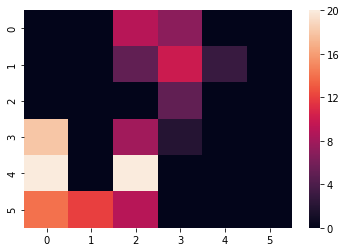

step:142 MAP


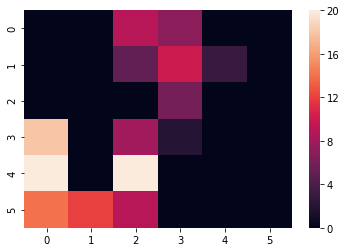

step:143 MAP


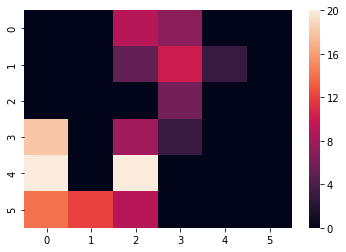

step:144 MAP


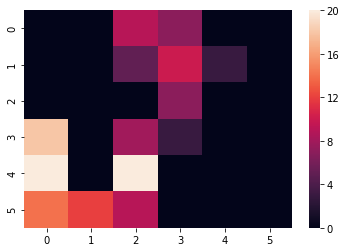

step:145 MAP


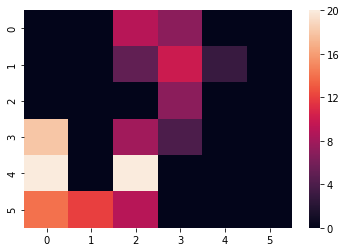

step:146 MAP


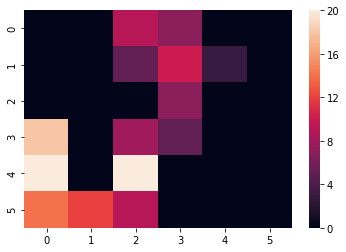

step:147 MAP


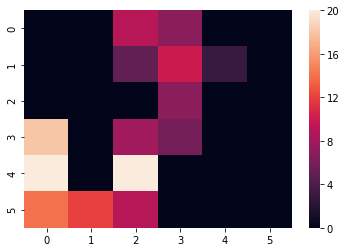

step:148 MAP


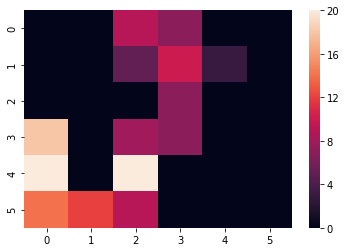

step:149 MAP


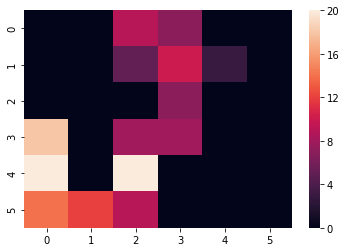

step:150 MAP


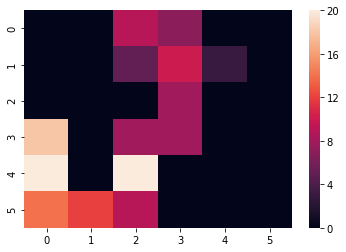

step:151 MAP


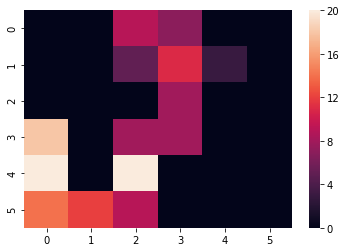

step:152 MAP


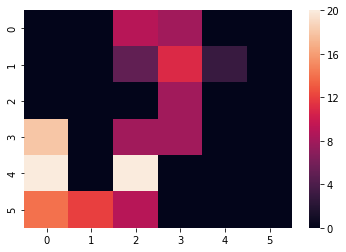

step:153 MAP


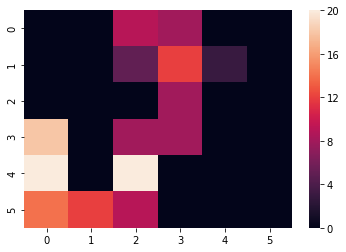

step:154 MAP


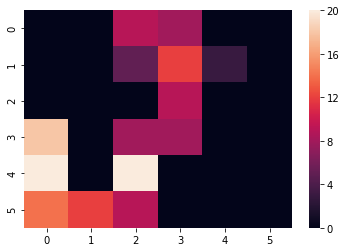

step:155 MAP


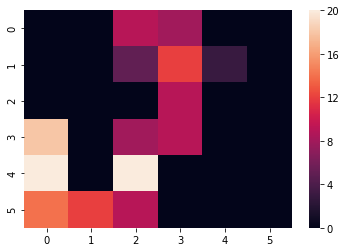

step:156 MAP


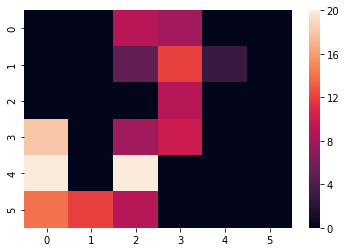

step:157 MAP


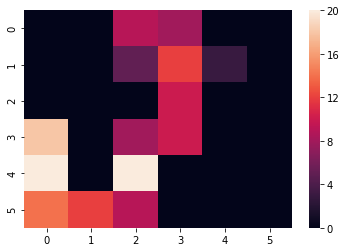

step:158 MAP


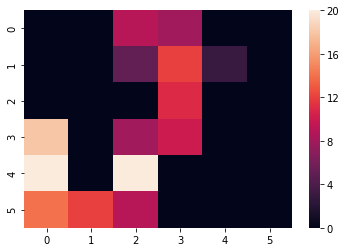

step:159 MAP


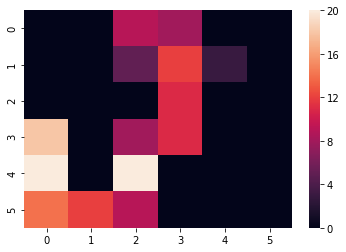

step:160 MAP


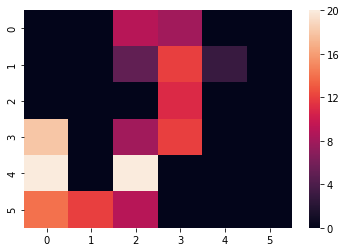

step:161 MAP


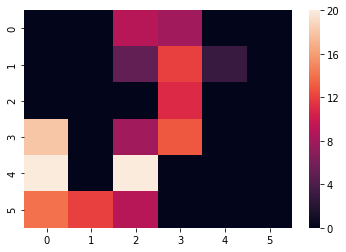

step:162 MAP


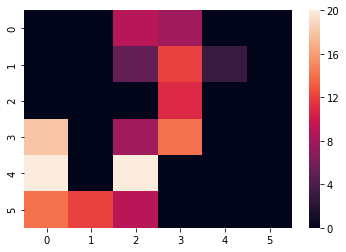

step:163 MAP


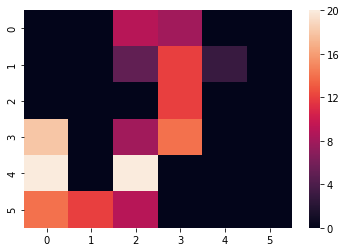

step:164 MAP


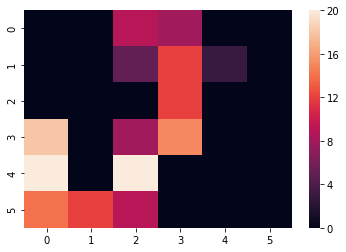

step:165 MAP


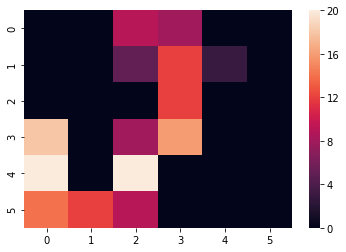

step:166 MAP


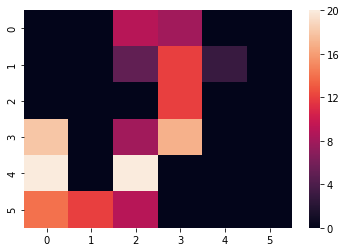

step:167 MAP


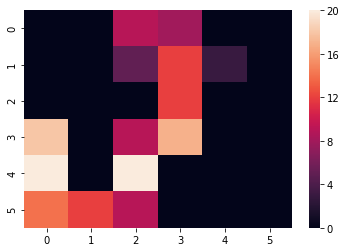

step:168 MAP


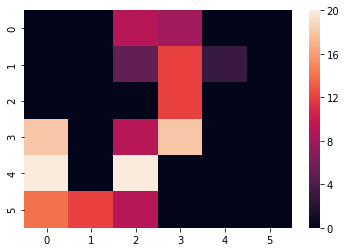

step:169 MAP


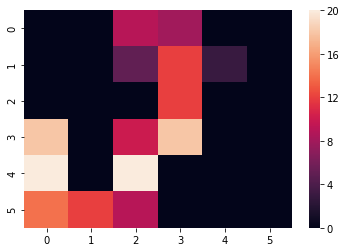

step:170 MAP


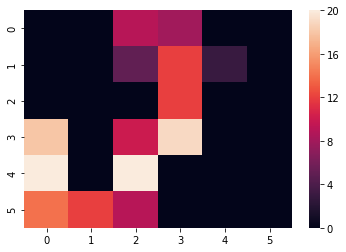

step:171 MAP


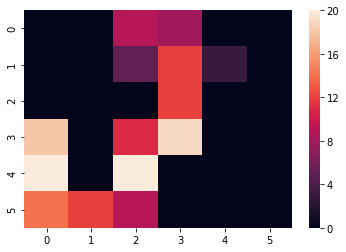

step:172 MAP


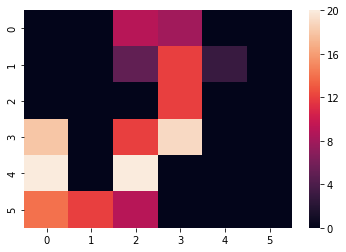

step:173 MAP


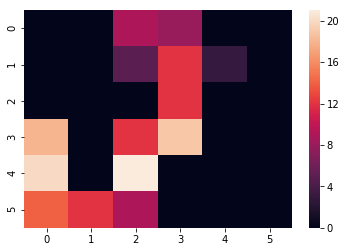

step:174 MAP


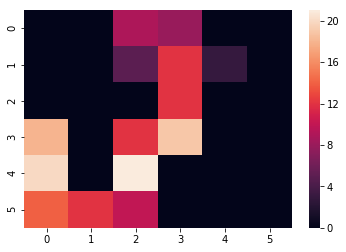

step:175 MAP


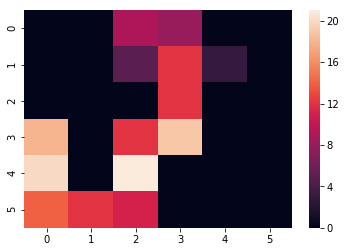

step:176 MAP


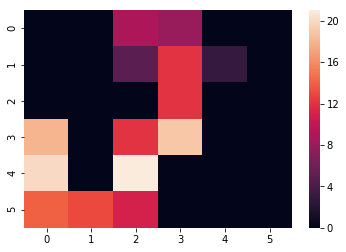

step:177 MAP


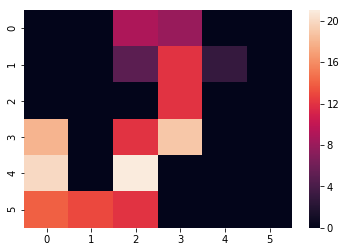

step:178 MAP


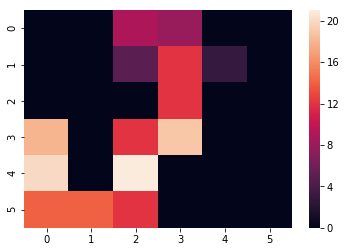

step:179 MAP


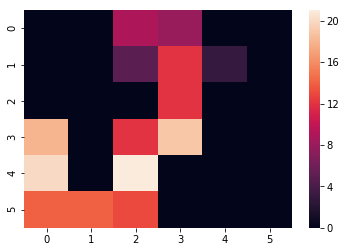

step:180 MAP


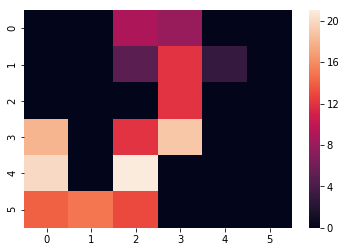

step:181 MAP


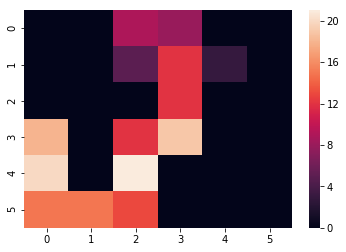

step:182 MAP


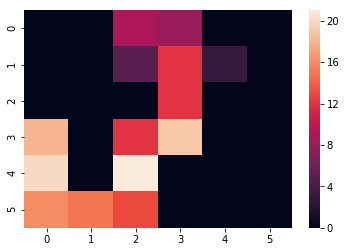

step:183 MAP


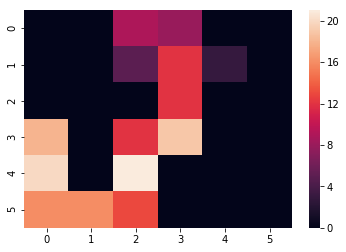

step:184 MAP


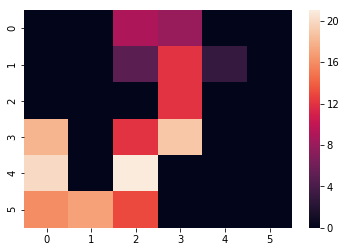

step:185 MAP


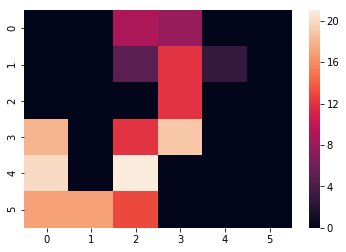

step:186 MAP


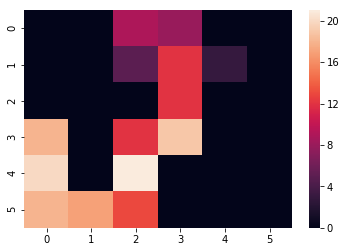

step:187 MAP


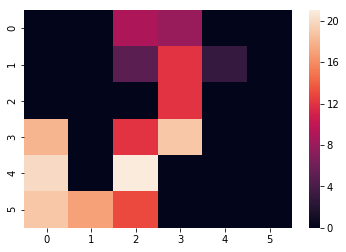

step:188 MAP


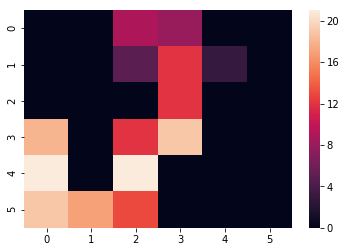

step:189 MAP


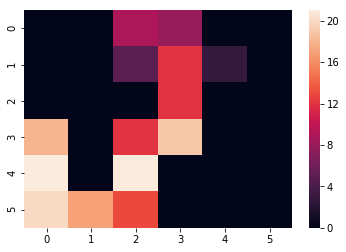

step:190 MAP


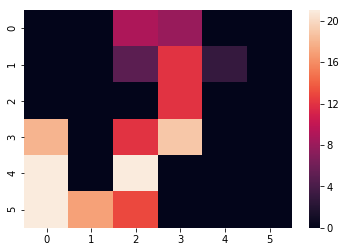

step:191 MAP


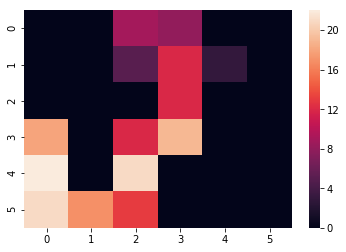

step:192 MAP


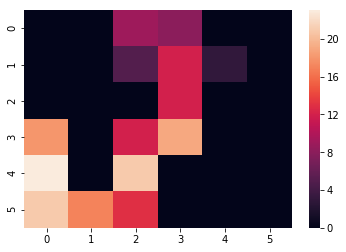

step:193 MAP


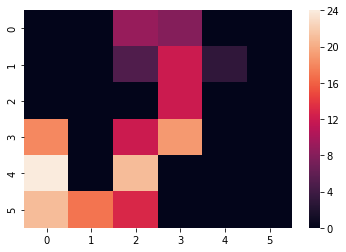

step:194 MAP


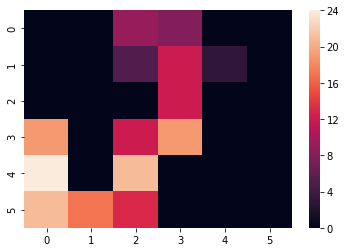

step:195 MAP


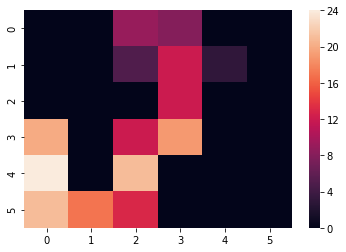

step:196 MAP


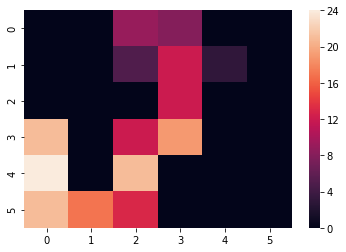

step:197 MAP


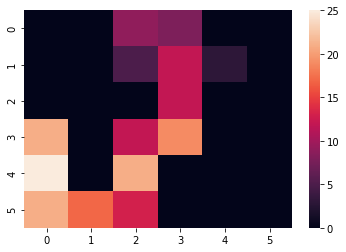

step:198 MAP


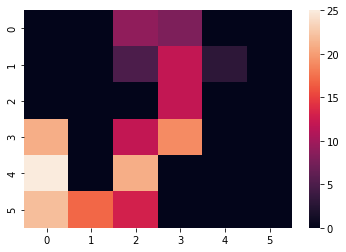

step:199 MAP


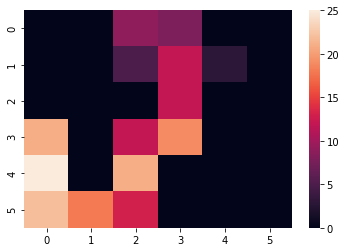

step:200 MAP


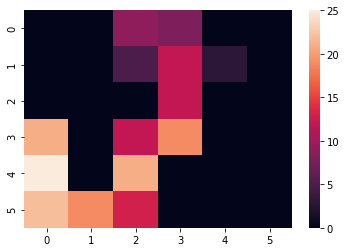

step:201 MAP


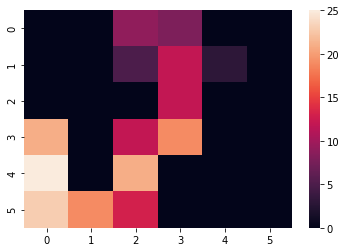

step:202 MAP


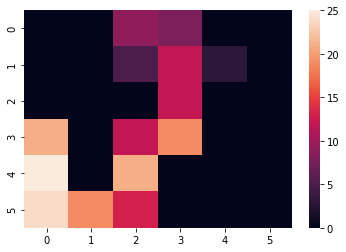

step:203 MAP


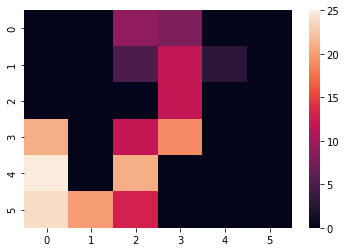

step:204 MAP


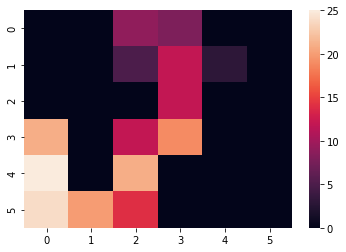

step:205 MAP


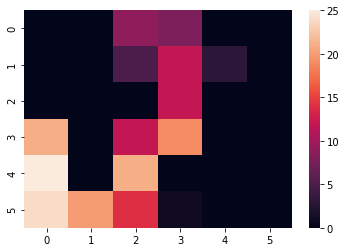

step:206 MAP


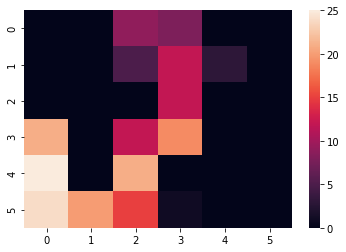

step:207 MAP


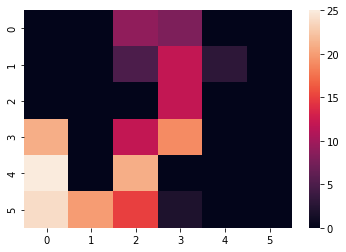

step:208 MAP


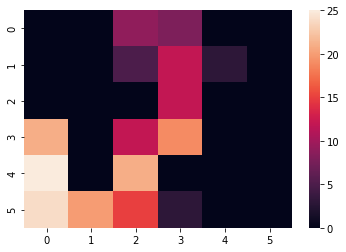

step:209 MAP


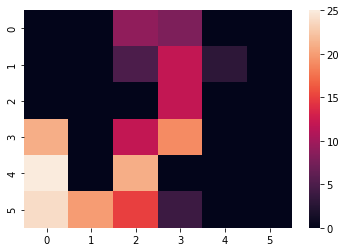

step:210 MAP


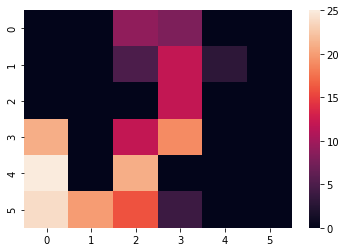

step:211 MAP


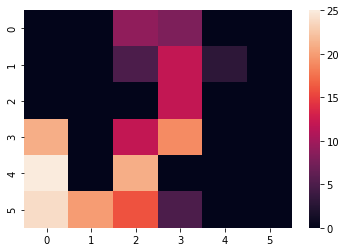

step:212 MAP


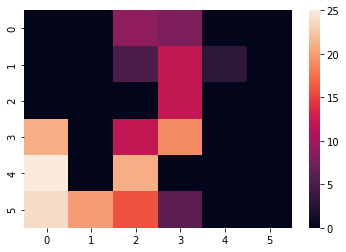

step:213 MAP


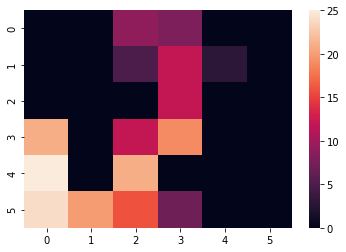

step:214 MAP


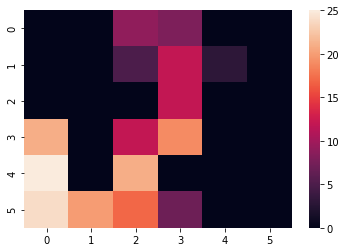

step:215 MAP


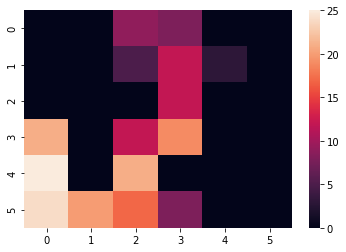

step:216 MAP


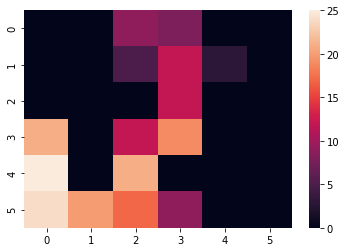

step:217 MAP


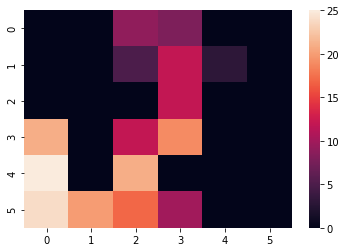

step:218 MAP


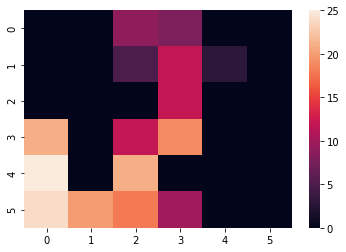

step:219 MAP


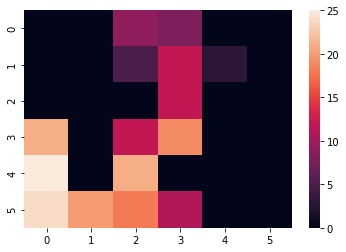

step:220 MAP


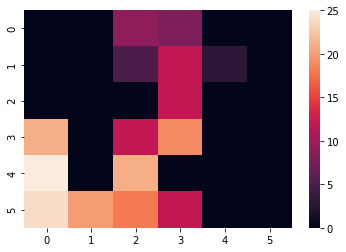

step:221 MAP


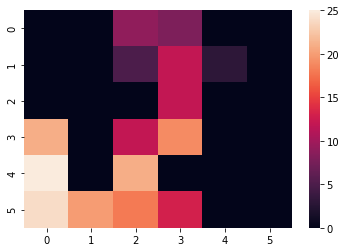

step:222 MAP


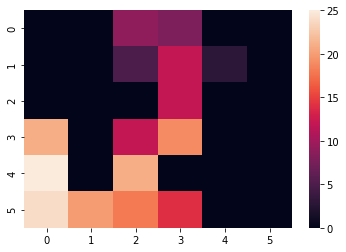

step:223 MAP


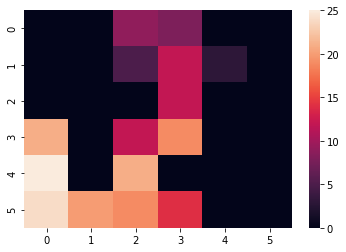

step:224 MAP


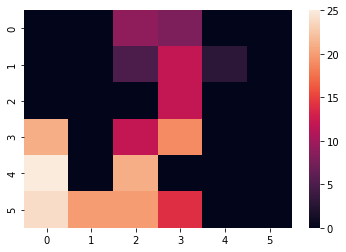

step:225 MAP


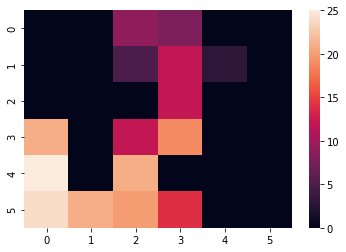

step:226 MAP


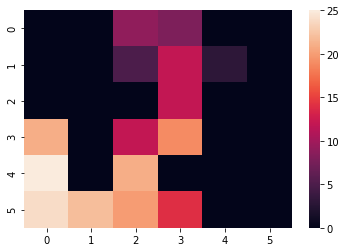

step:227 MAP


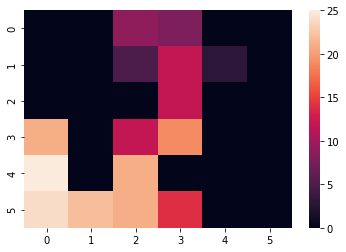

step:228 MAP


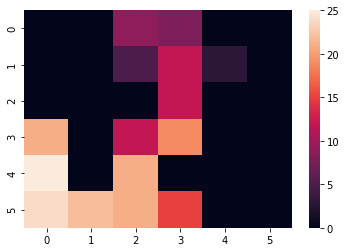

step:229 MAP


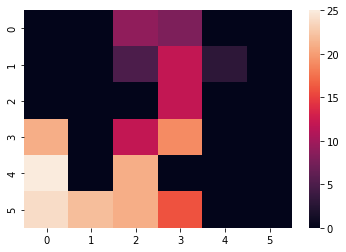

step:230 MAP


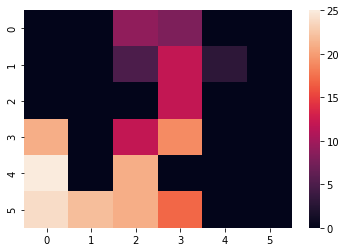

step:231 MAP


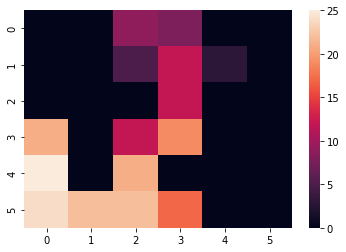

step:232 MAP


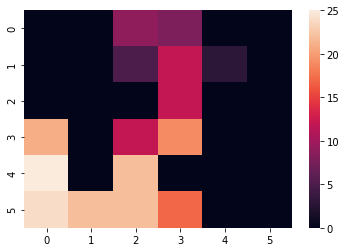

step:233 MAP


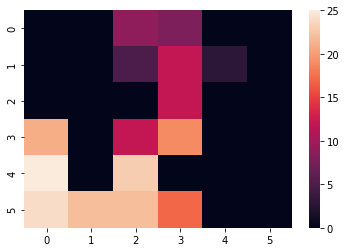

step:234 MAP


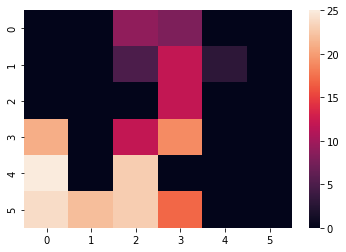

step:235 MAP


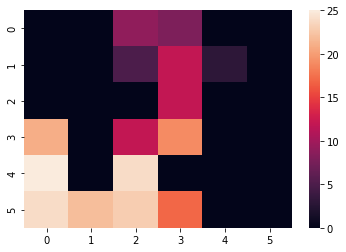

step:236 MAP


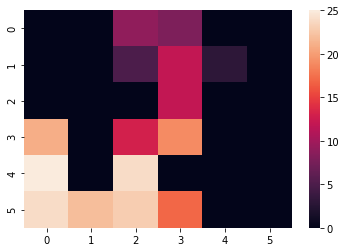

step:237 MAP


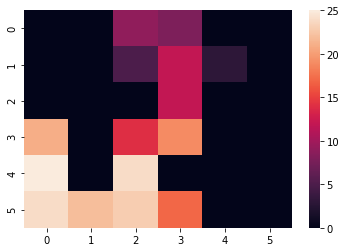

step:238 MAP


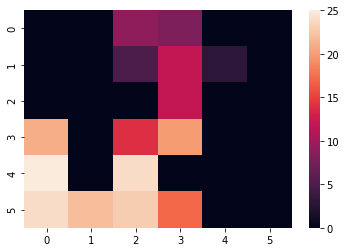

step:239 MAP


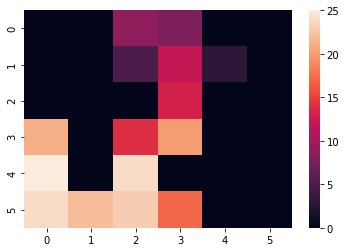

step:240 MAP


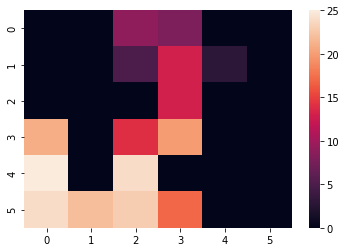

step:241 MAP


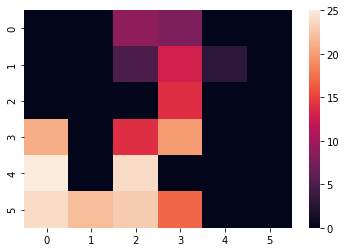

step:242 MAP


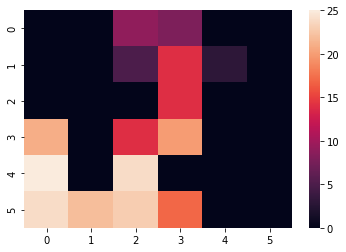

step:243 MAP


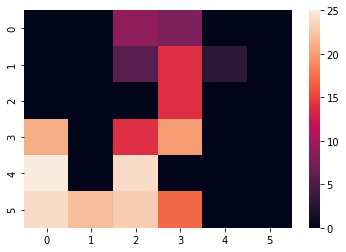

step:244 MAP


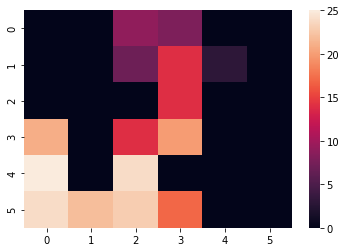

step:245 MAP


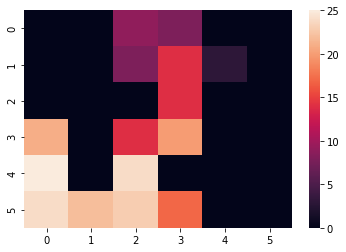

step:246 MAP


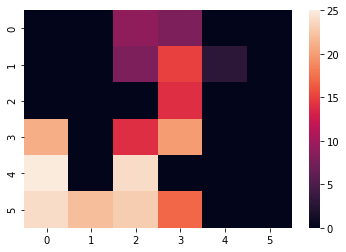

step:247 MAP


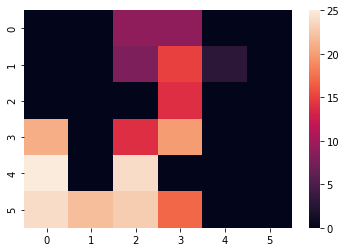

step:248 MAP


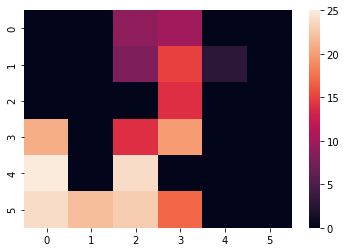

step:249 MAP


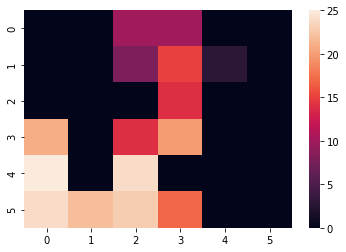

step:250 MAP


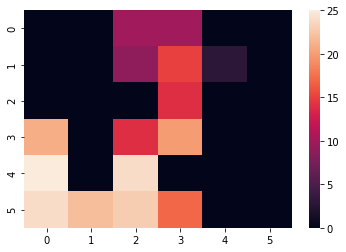

step:251 MAP


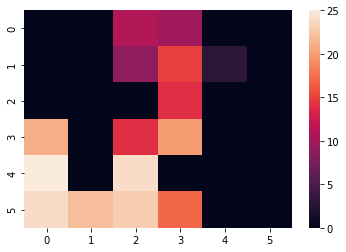

step:252 MAP


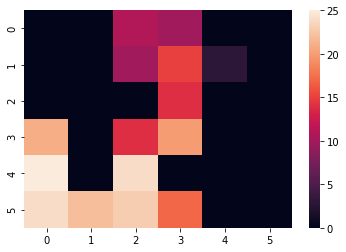

step:253 MAP


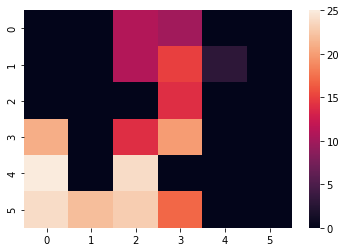

step:254 MAP


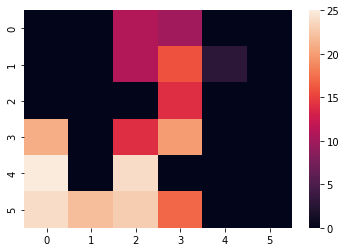

step:255 MAP


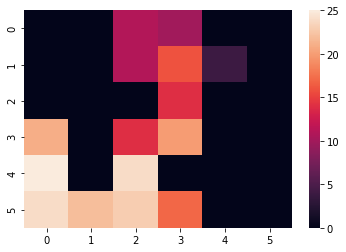

step:256 MAP


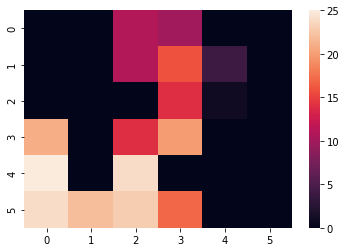

step:257 MAP


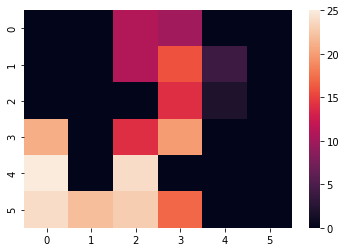

step:258 MAP


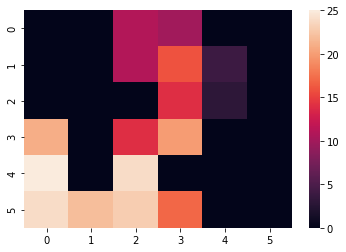

step:259 MAP


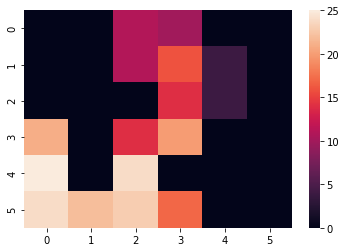

step:260 MAP


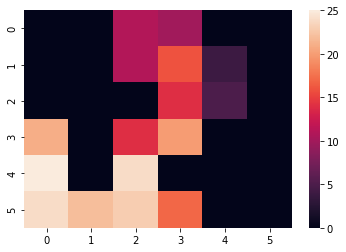

step:261 MAP


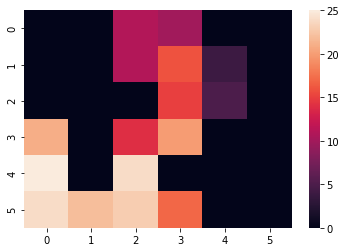

step:262 MAP


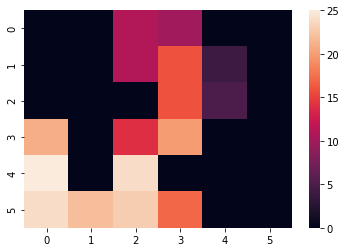

step:263 MAP


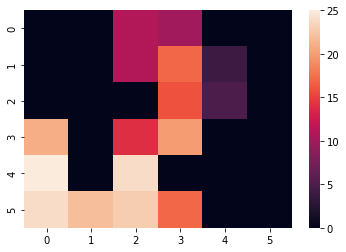

step:264 MAP


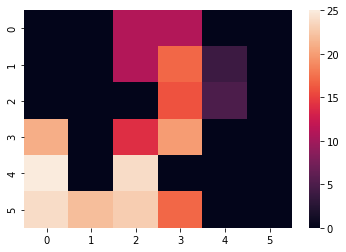

step:265 MAP


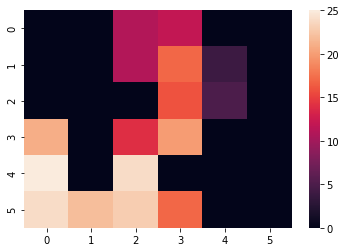

step:266 MAP


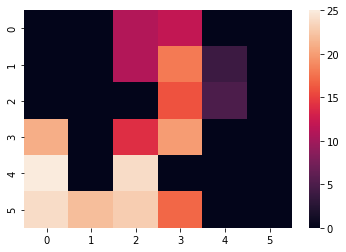

step:267 MAP


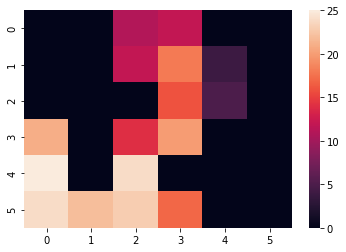

step:268 MAP


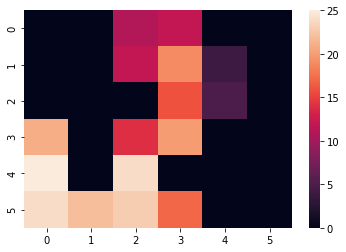

step:269 MAP


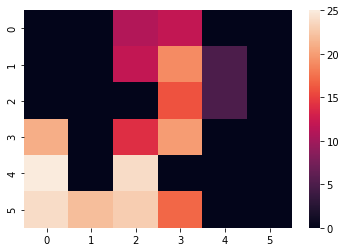

step:270 MAP


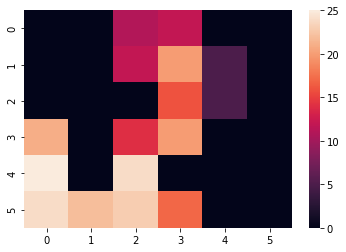

step:271 MAP


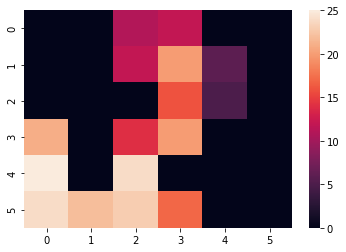

step:272 MAP


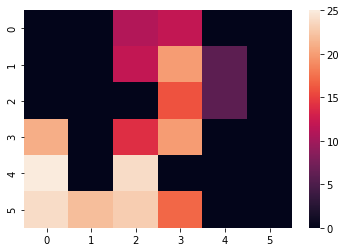

step:273 MAP


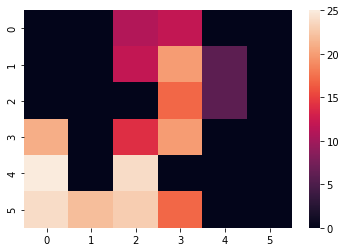

step:274 MAP


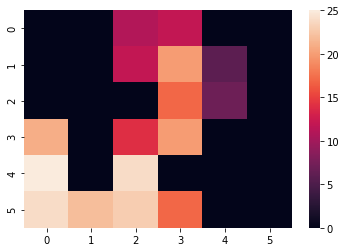

step:275 MAP


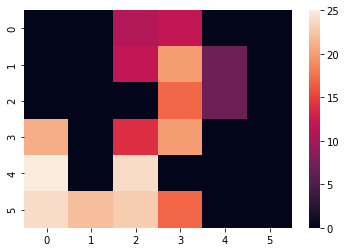

step:276 MAP


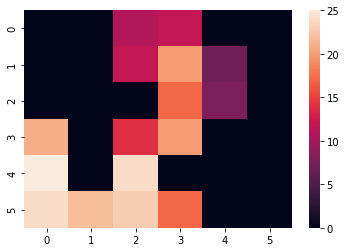

step:277 MAP


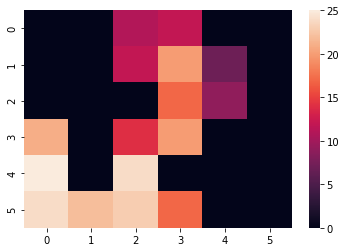

step:278 MAP


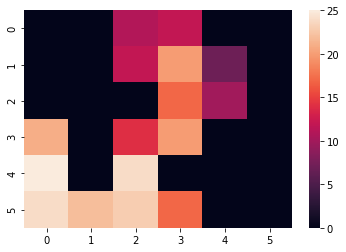

step:279 MAP


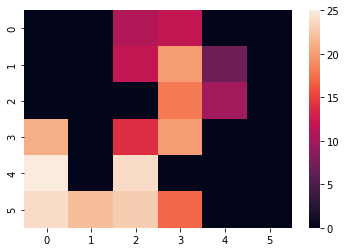

step:280 MAP


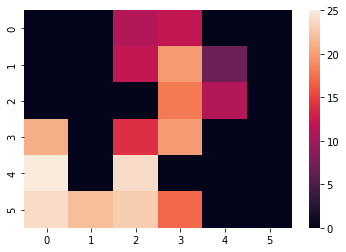

step:281 MAP


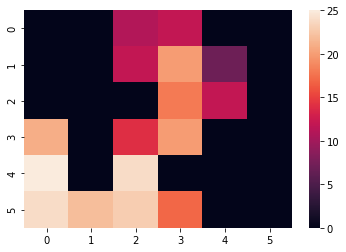

step:282 MAP


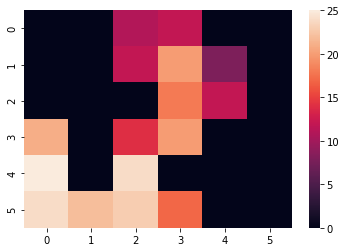

step:283 MAP


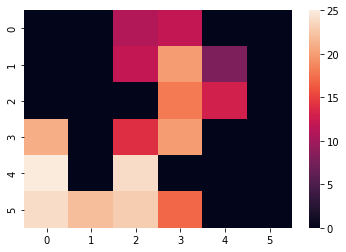

step:284 MAP


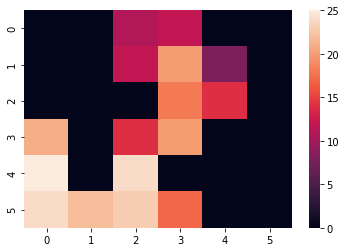

step:285 MAP


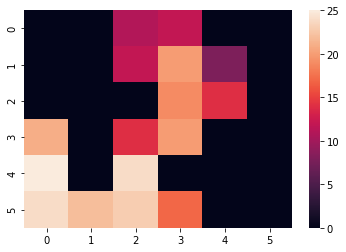

step:286 MAP


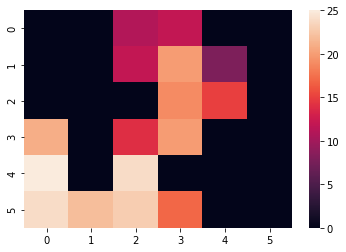

step:287 MAP


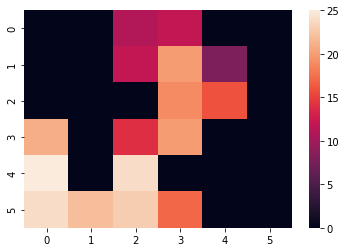

step:288 MAP


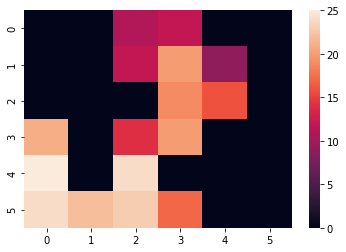

step:289 MAP


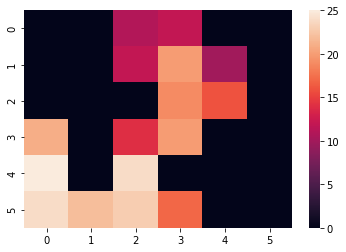

step:290 MAP


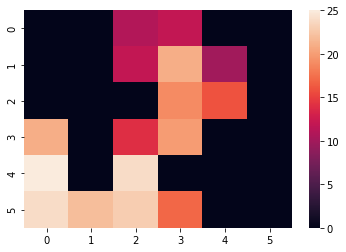

step:291 MAP


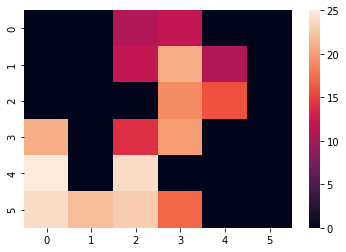

step:292 MAP


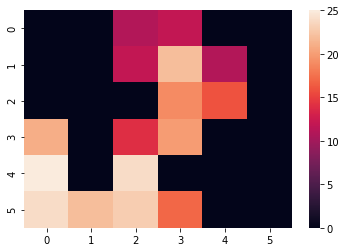

step:293 MAP


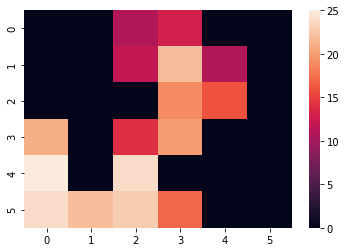

step:294 MAP


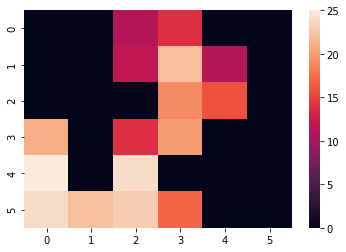

step:295 MAP


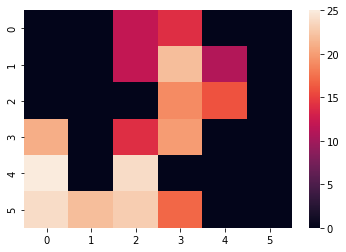

step:296 MAP


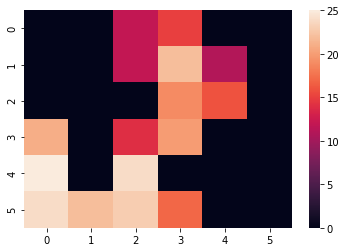

step:297 MAP


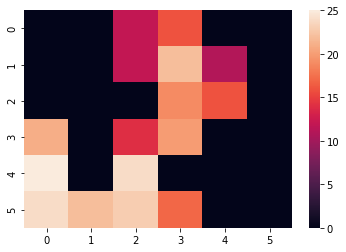

step:298 MAP


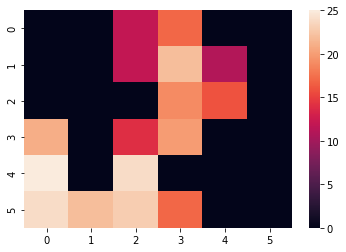

step:299 MAP


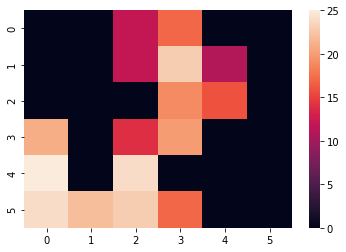

step:300 MAP


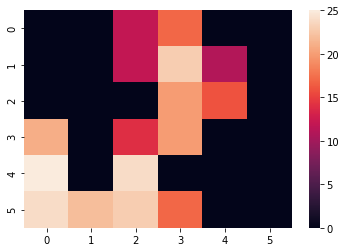

step:301 MAP


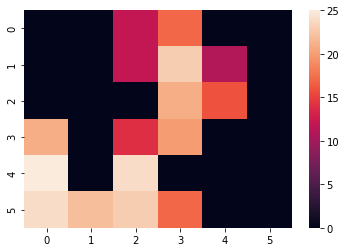

step:302 MAP


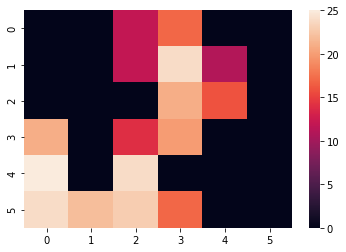

step:303 MAP


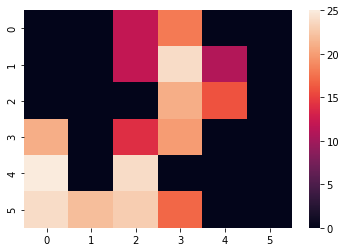

step:304 MAP


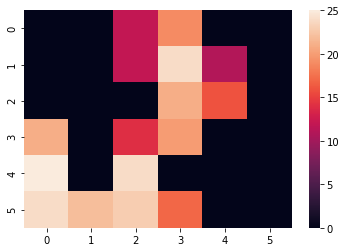

step:305 MAP


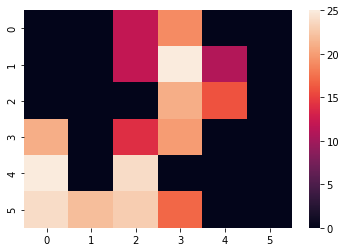

step:306 MAP


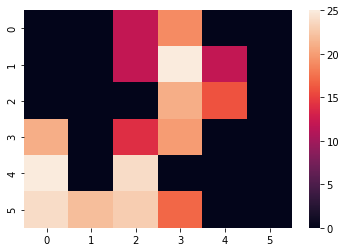

step:307 MAP


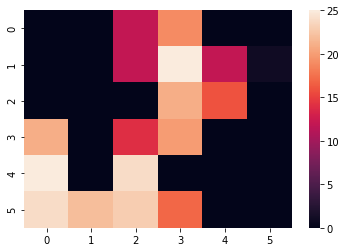

step:308 MAP


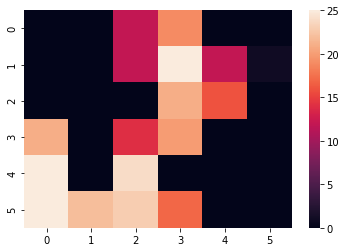

step:309 MAP


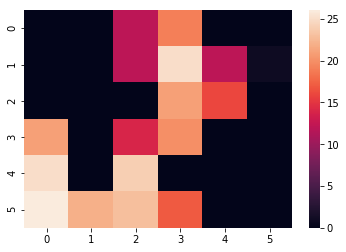

step:310 MAP


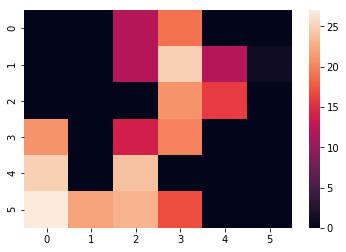

step:311 MAP


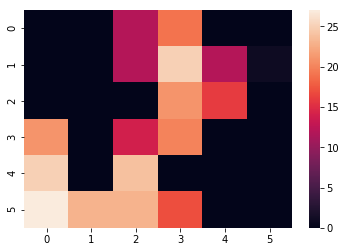

step:312 MAP


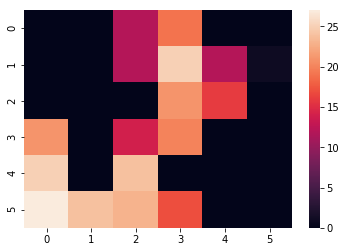

step:313 MAP


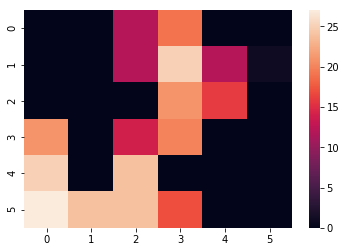

step:314 MAP


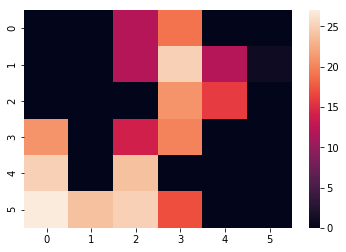

step:315 MAP


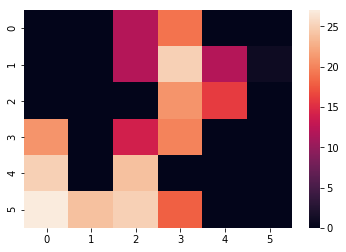

step:316 MAP


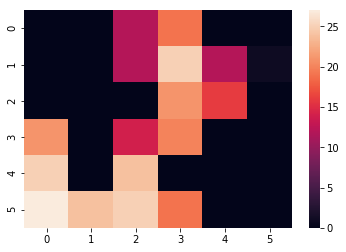

step:317 MAP


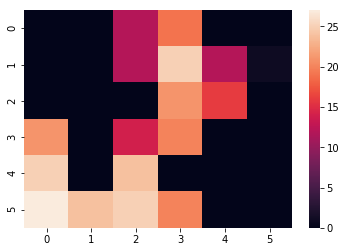

step:318 MAP


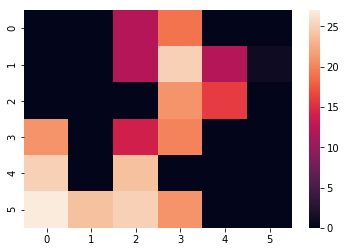

step:319 MAP


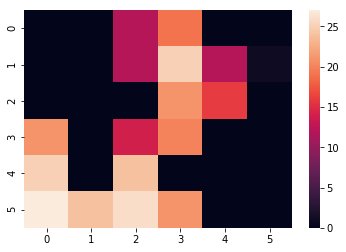

step:320 MAP


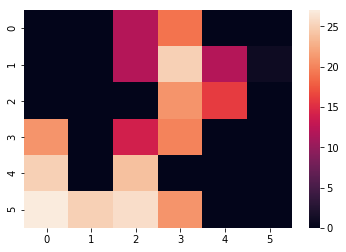

step:321 MAP


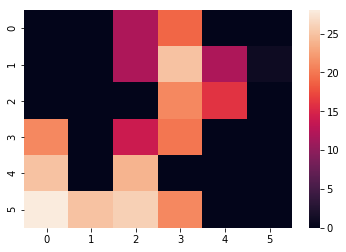

step:322 MAP


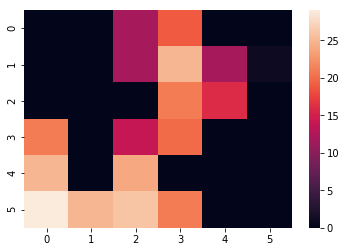

step:323 MAP


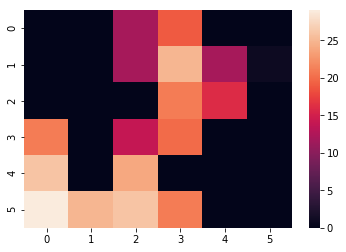

step:324 MAP


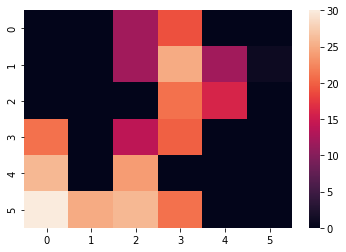

step:325 MAP


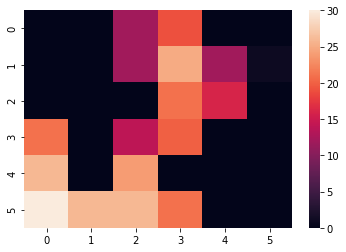

step:326 MAP


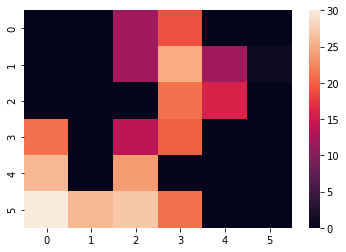

step:327 MAP


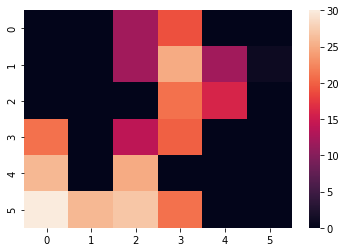

step:328 MAP


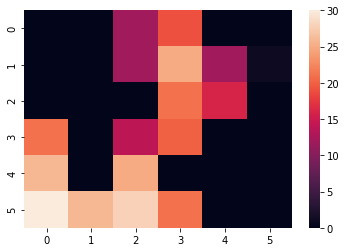

step:329 MAP


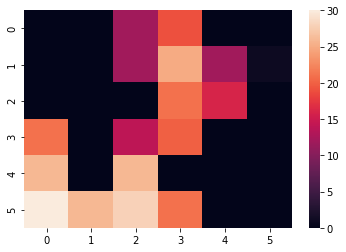

step:330 MAP


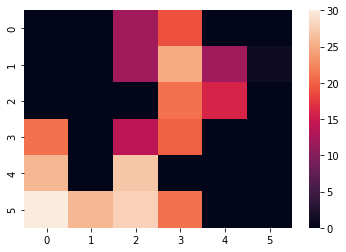

step:331 MAP


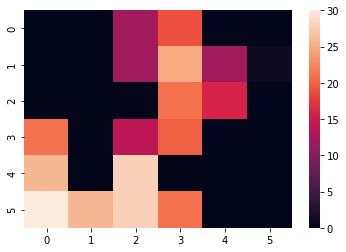

step:332 MAP


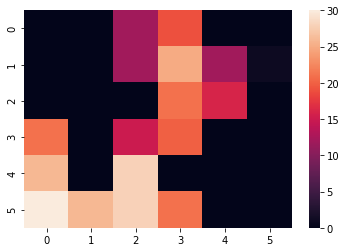

step:333 MAP


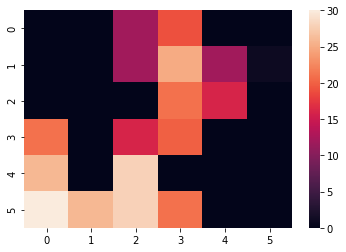

step:334 MAP


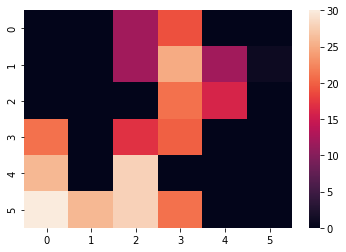

step:335 MAP


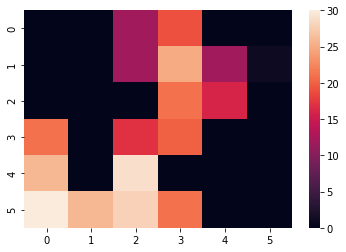

step:336 MAP


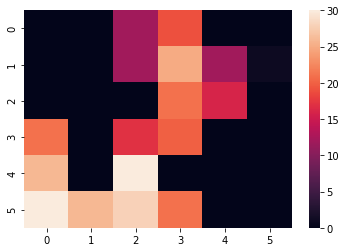

step:337 MAP


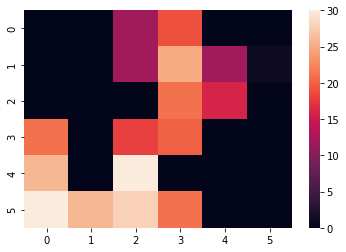

step:338 MAP


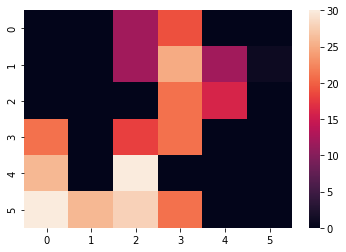

step:339 MAP


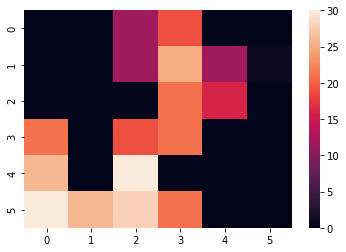

step:340 MAP


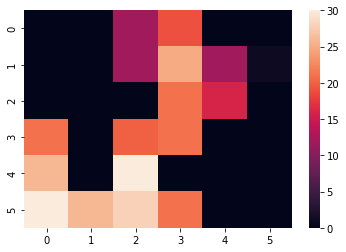

step:341 MAP


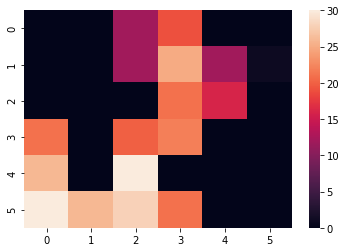

step:342 MAP


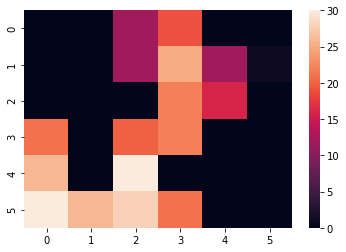

step:343 MAP


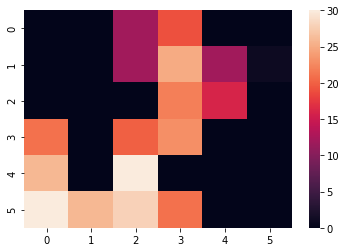

step:344 MAP


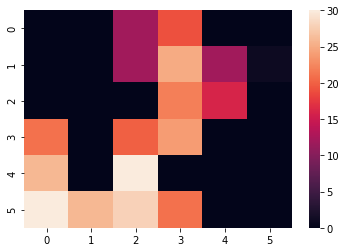

step:345 MAP


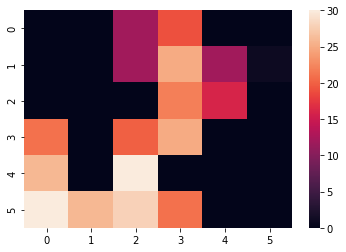

step:346 MAP


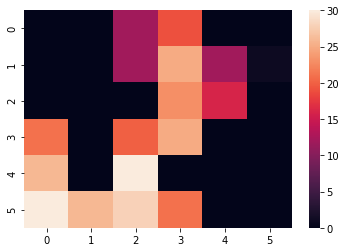

step:347 MAP


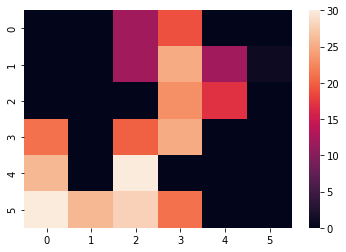

step:348 MAP


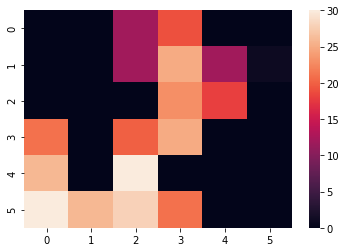

step:349 MAP


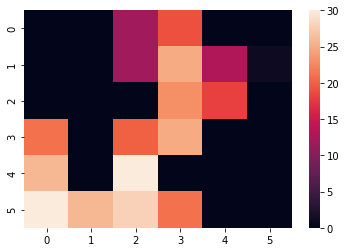

step:350 MAP


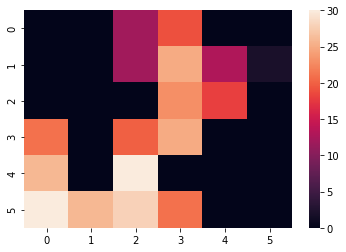

step:351 MAP


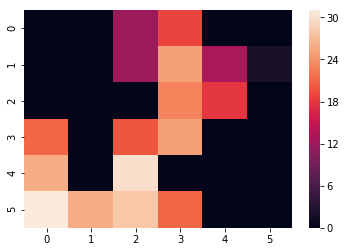

step:352 MAP


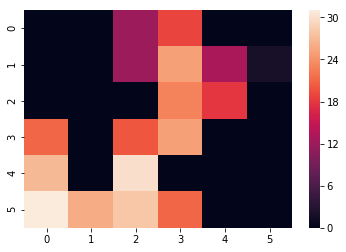

step:353 MAP


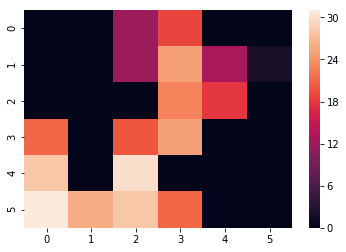

step:354 MAP


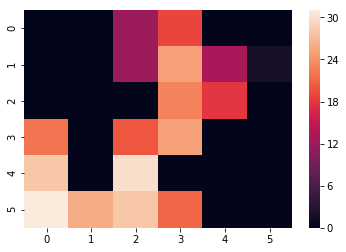

step:355 MAP


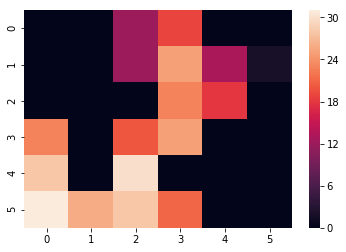

step:356 MAP


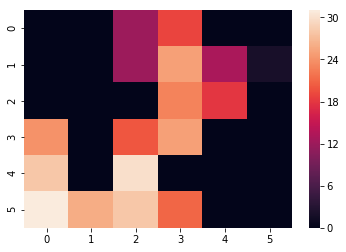

step:357 MAP


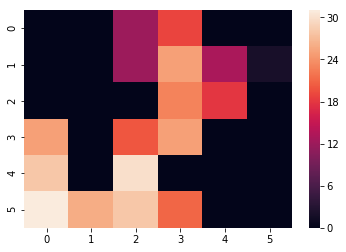

step:358 MAP


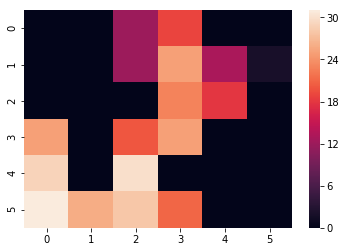

step:359 MAP


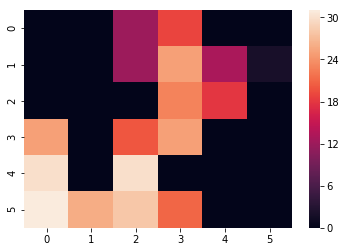

step:360 MAP


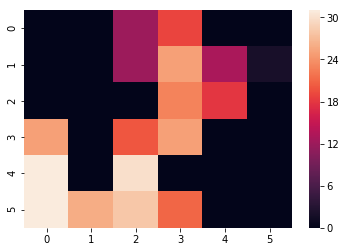

step:361 MAP


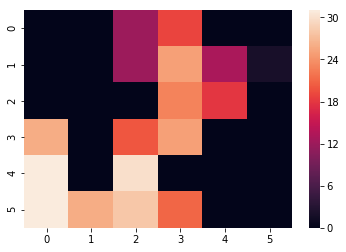

step:362 MAP


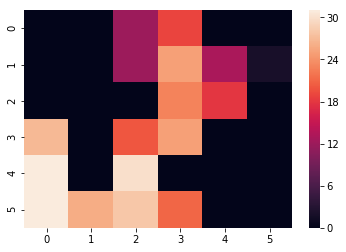

step:363 MAP


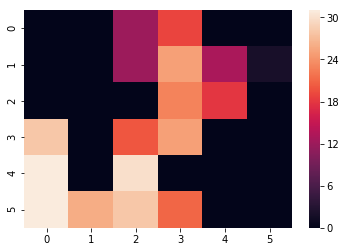

step:364 MAP


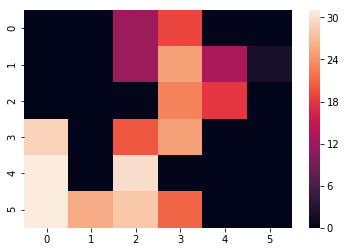

step:365 MAP


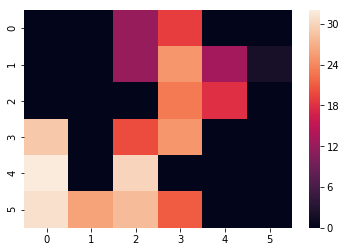

step:366 MAP


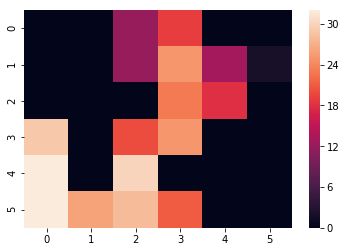

step:367 MAP


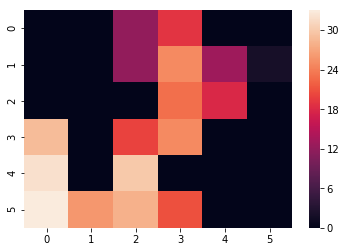

step:368 MAP


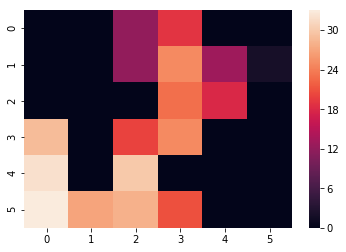

step:369 MAP


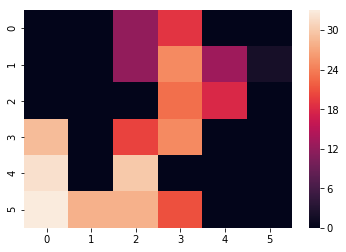

step:370 MAP


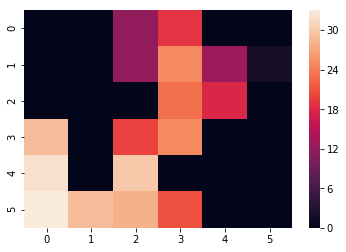

step:371 MAP


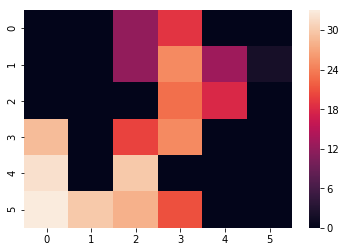

step:372 MAP


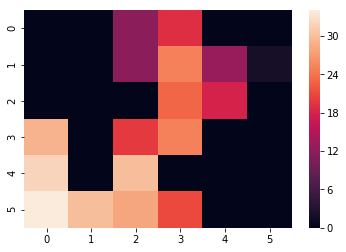

step:373 MAP


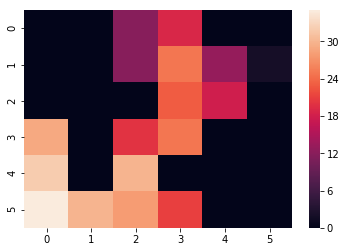

step:374 MAP


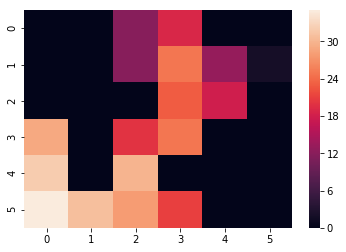

step:375 MAP


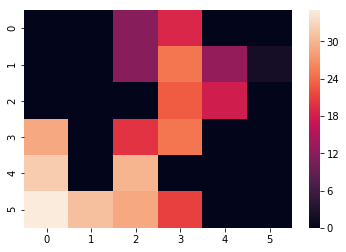

step:376 MAP


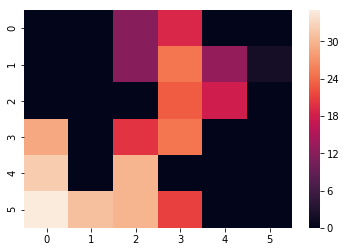

step:377 MAP


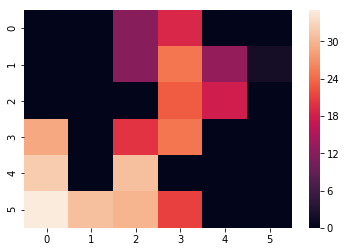

step:378 MAP


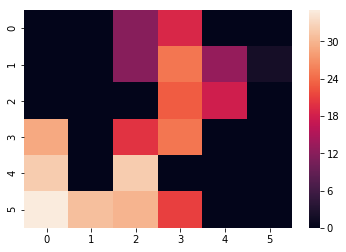

step:379 MAP


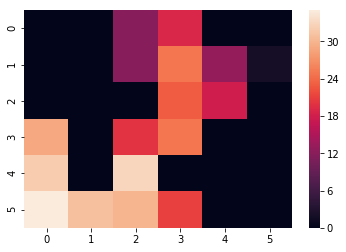

step:380 MAP


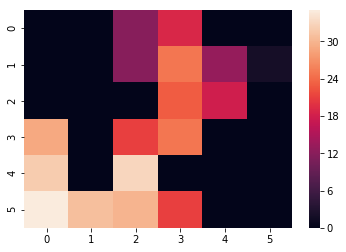

step:381 MAP


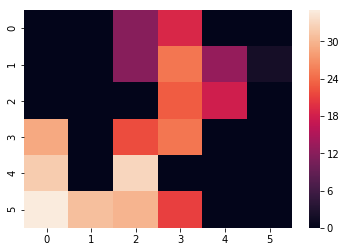

step:382 MAP


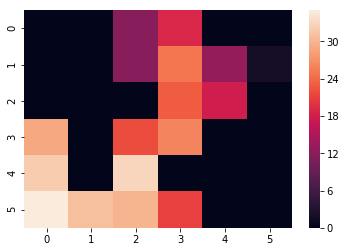

step:383 MAP


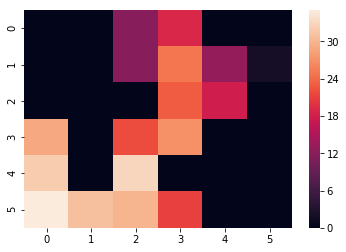

step:384 MAP


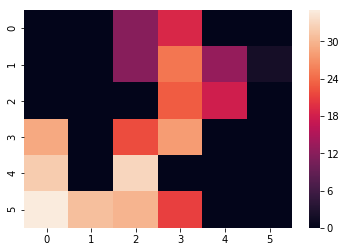

step:385 MAP


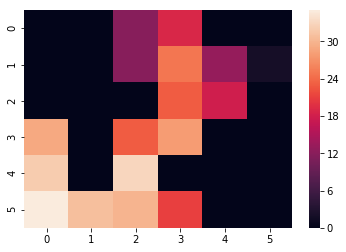

step:386 MAP


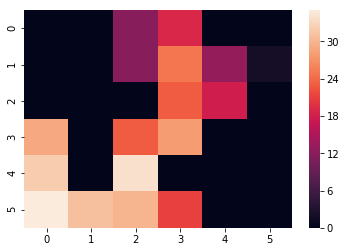

step:387 MAP


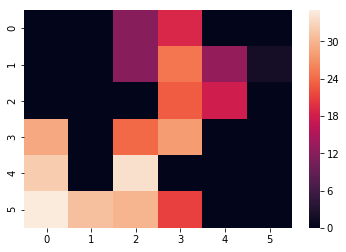

step:388 MAP


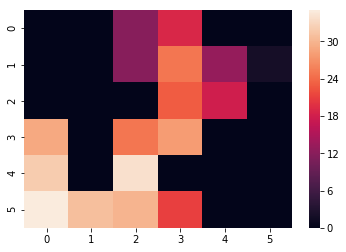

step:389 MAP


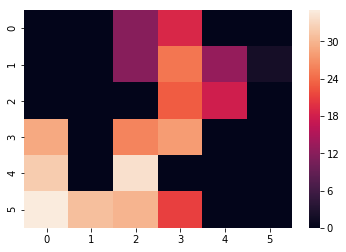

step:390 MAP


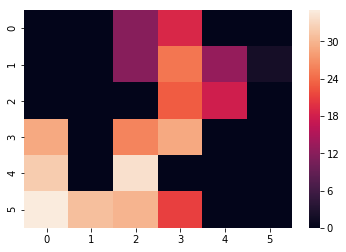

step:391 MAP


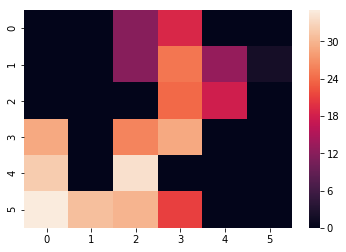

step:392 MAP


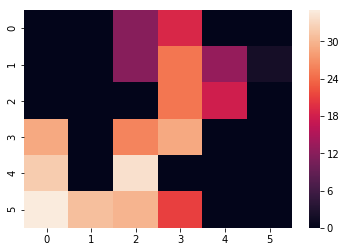

step:393 MAP


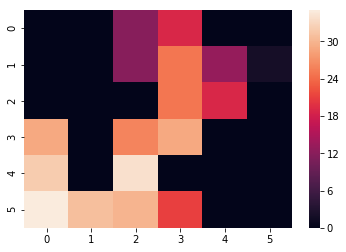

step:394 MAP


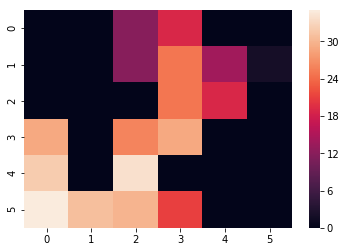

step:395 MAP


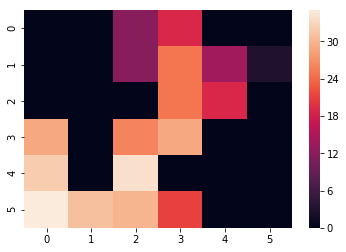

step:396 MAP


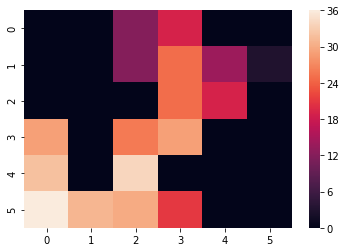

step:397 MAP


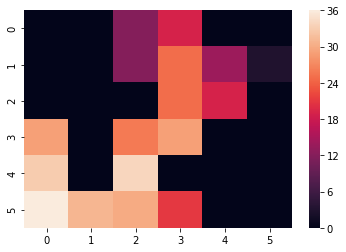

step:398 MAP


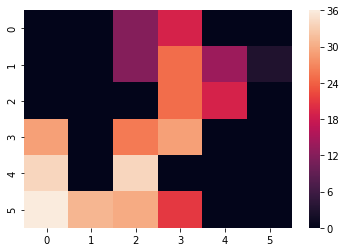

step:399 MAP


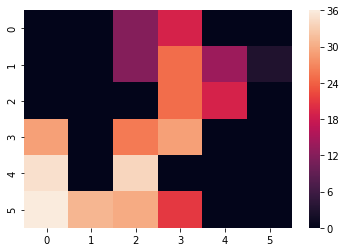

step:400 MAP


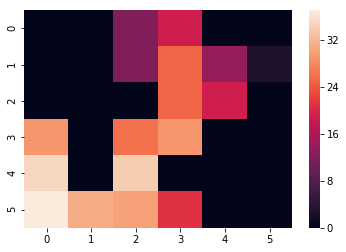

step:401 MAP


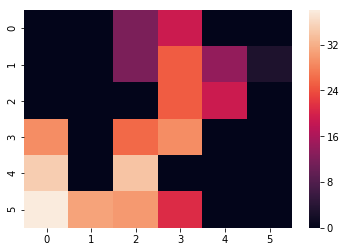

step:402 MAP


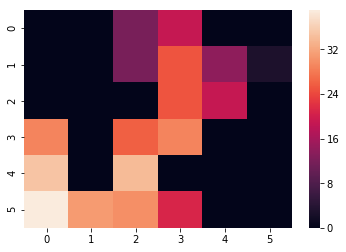

step:403 MAP


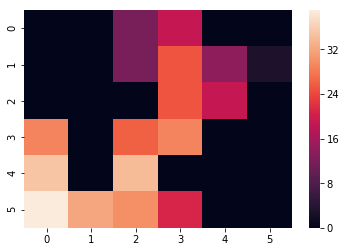

step:404 MAP


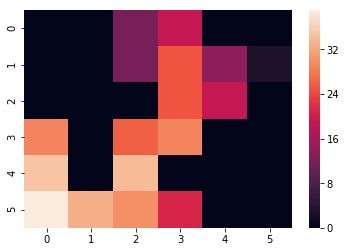

step:405 MAP


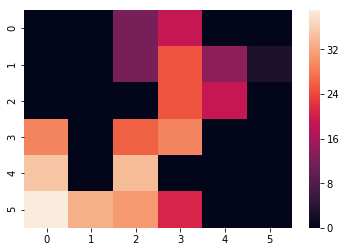

step:406 MAP


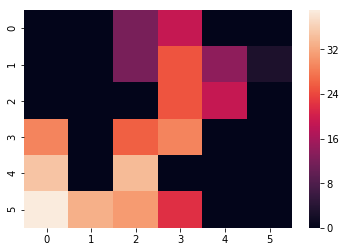

step:407 MAP


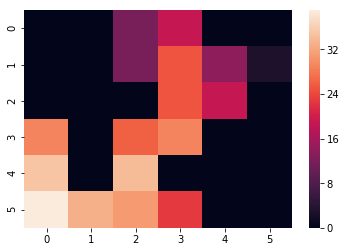

step:408 MAP


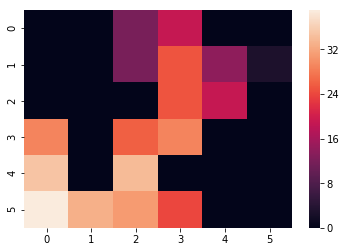

step:409 MAP


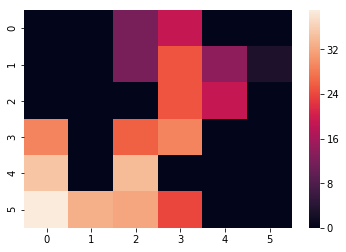

step:410 MAP


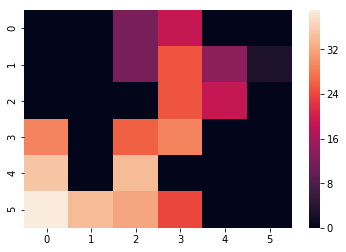

step:411 MAP


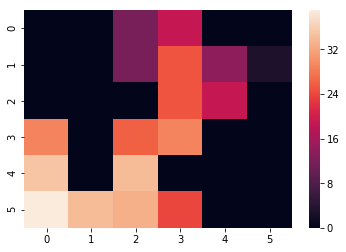

step:412 MAP


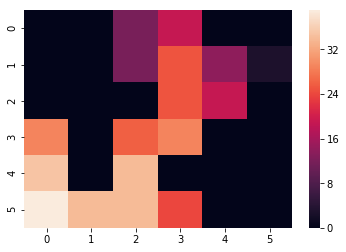

step:413 MAP


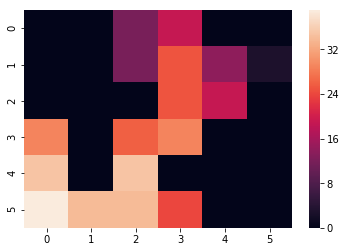

step:414 MAP


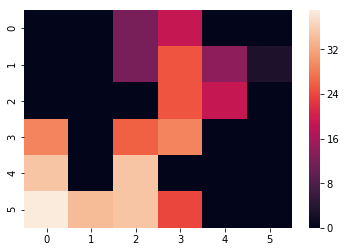

step:415 MAP


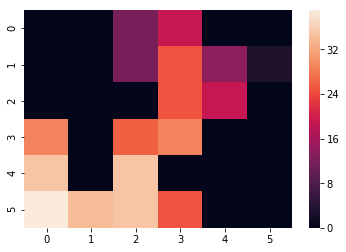

step:416 MAP


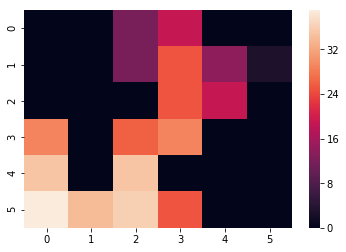

step:417 MAP


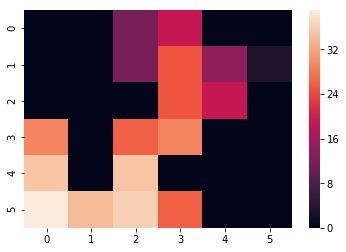

step:418 MAP


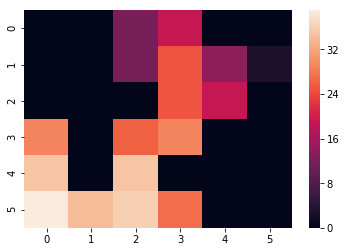

step:419 MAP


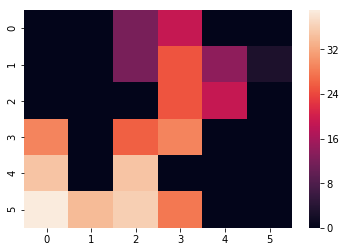

step:420 MAP


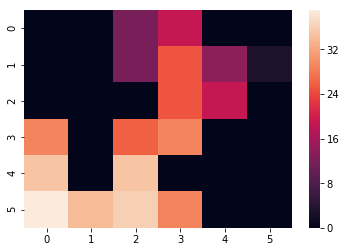

step:421 MAP


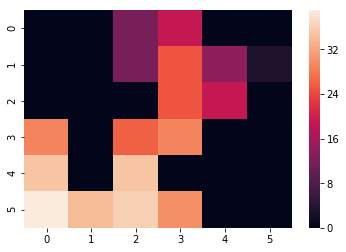

step:422 MAP


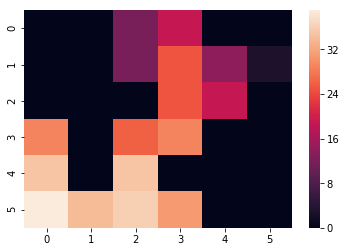

step:423 MAP


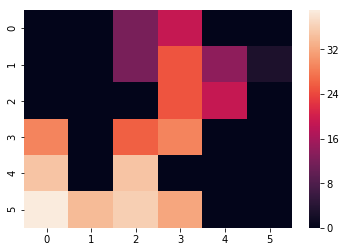

step:424 MAP


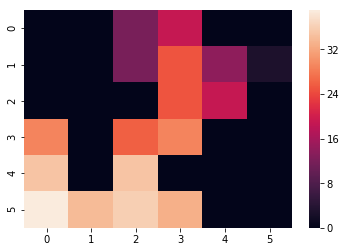

step:425 MAP


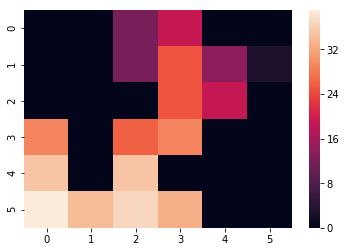

step:426 MAP


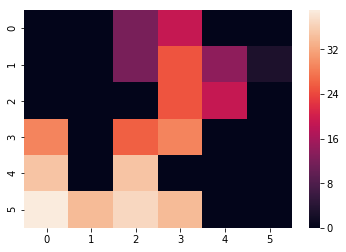

step:427 MAP


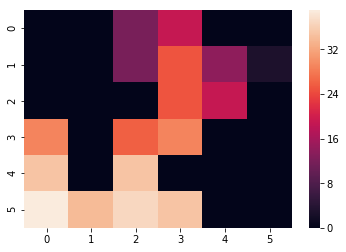

step:428 MAP


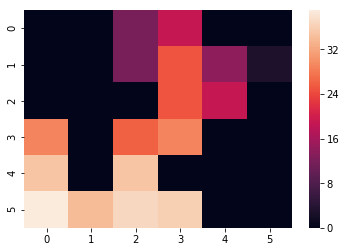

step:429 MAP


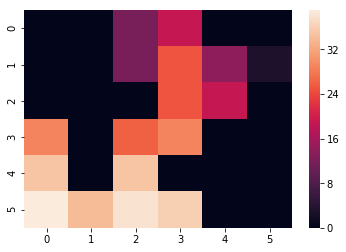

step:430 MAP


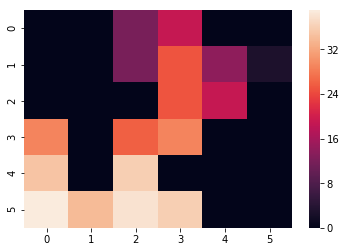

step:431 MAP


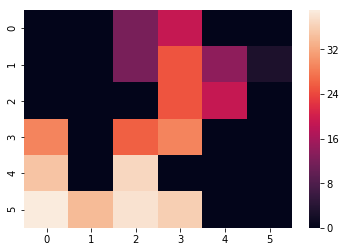

step:432 MAP


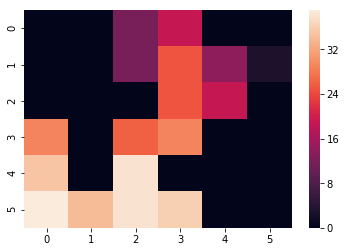

step:433 MAP


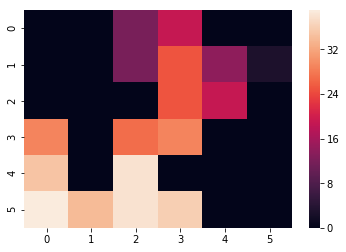

step:434 MAP


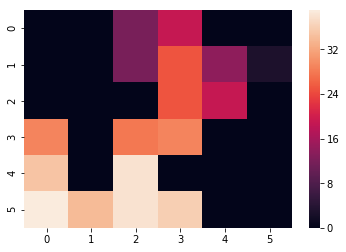

step:435 MAP


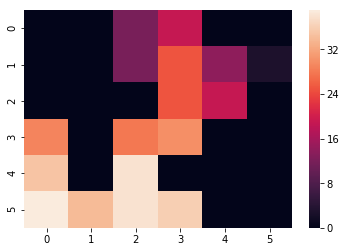

step:436 MAP


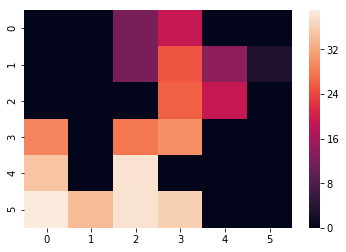

step:437 MAP


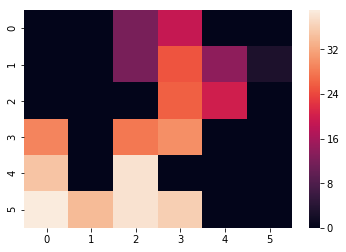

step:438 MAP


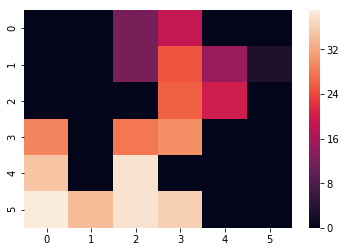

step:439 MAP


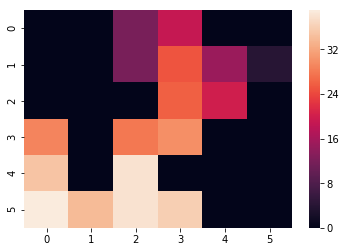

step:440 MAP


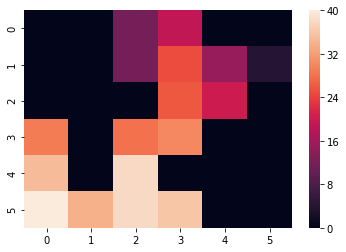

step:441 MAP


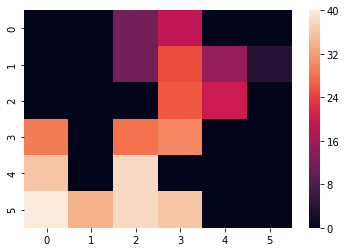

step:442 MAP


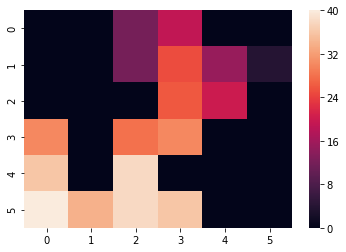

step:443 MAP


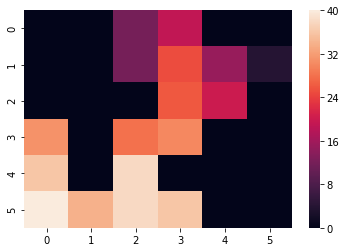

step:444 MAP


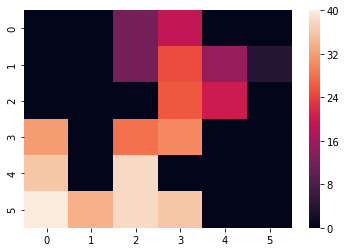

step:445 MAP


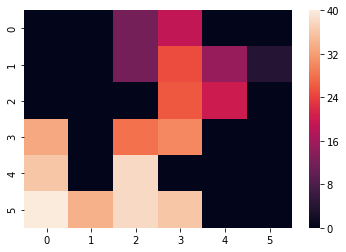

step:446 MAP


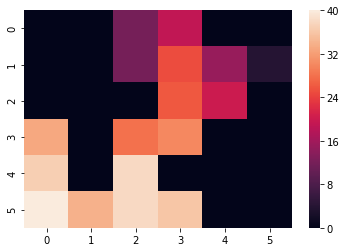

step:447 MAP


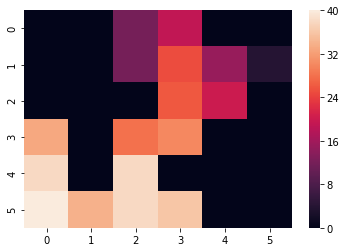

step:448 MAP


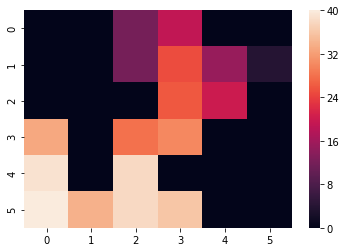

step:449 MAP


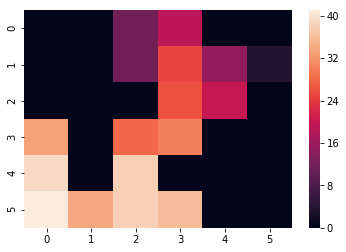

step:450 MAP


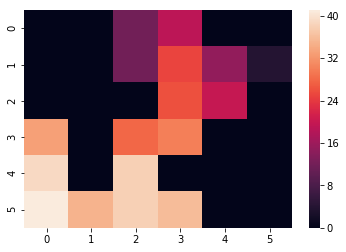

step:451 MAP


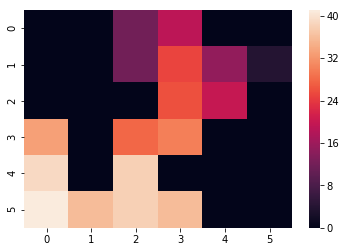

step:452 MAP


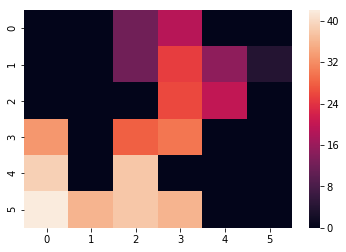

step:453 MAP


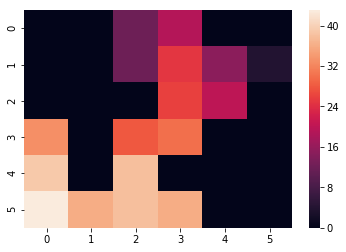

step:454 MAP


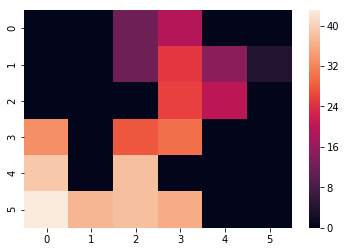

step:455 MAP


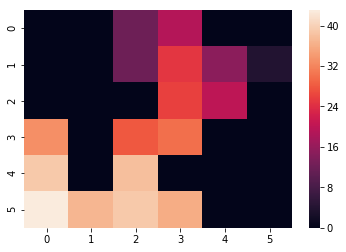

step:456 MAP


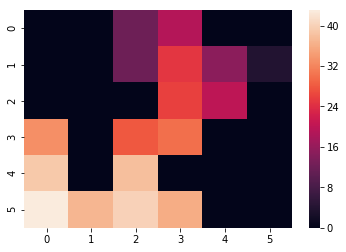

step:457 MAP


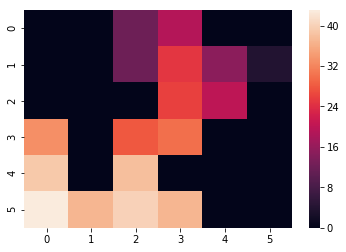

step:458 MAP


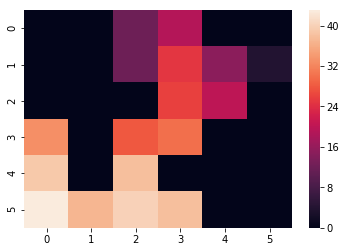

step:459 MAP


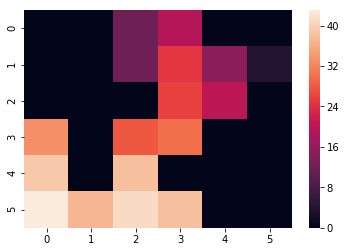

step:460 MAP


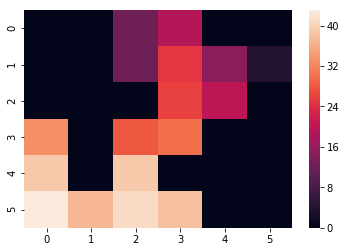

step:461 MAP


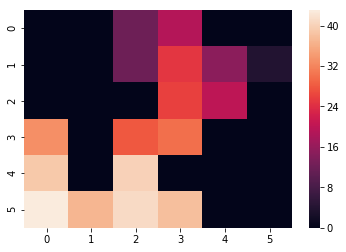

step:462 MAP


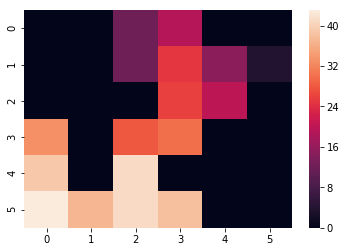

step:463 MAP


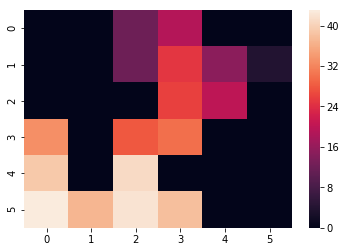

step:464 MAP


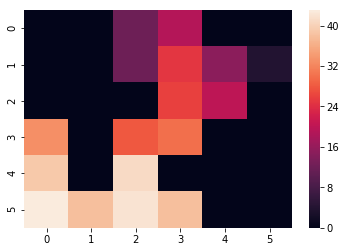

step:465 MAP


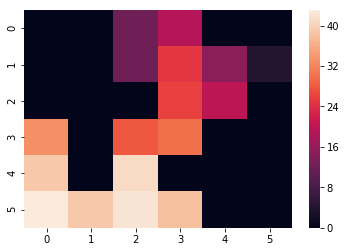

step:466 MAP


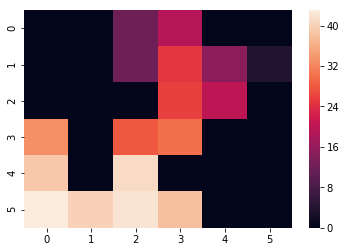

step:467 MAP


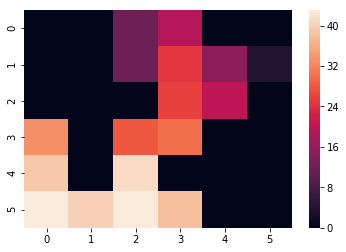

step:468 MAP


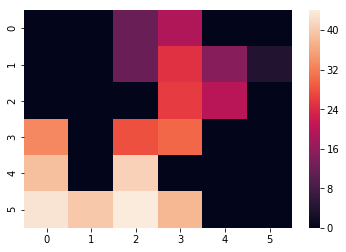

step:469 MAP


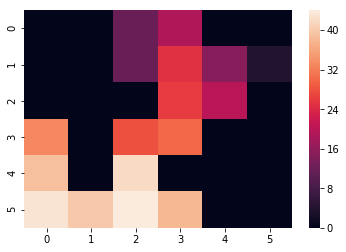

step:470 MAP


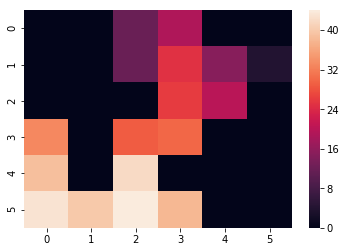

step:471 MAP


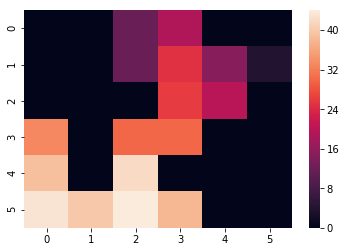

step:472 MAP


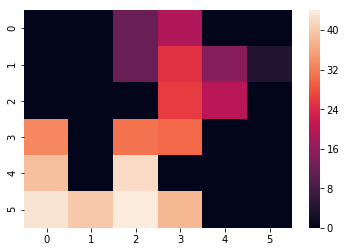

step:473 MAP


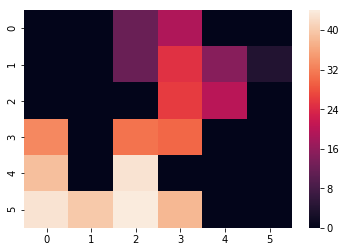

step:474 MAP


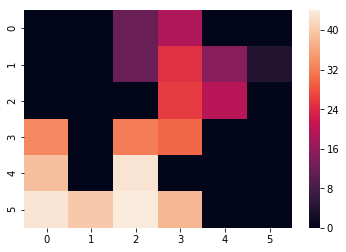

step:475 MAP


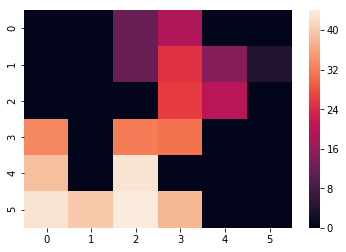

step:476 MAP


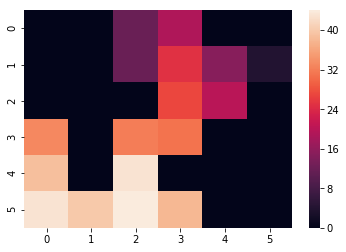

step:477 MAP


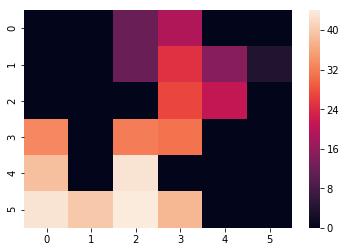

step:478 MAP


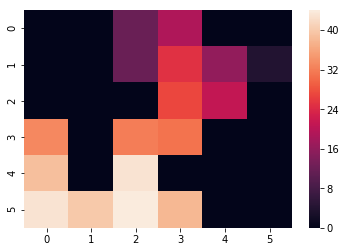

step:479 MAP


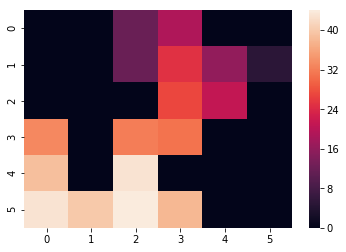

step:480 MAP


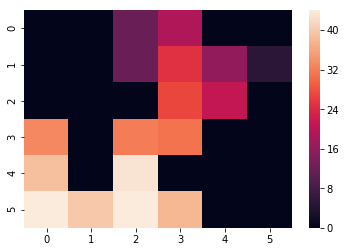

step:481 MAP


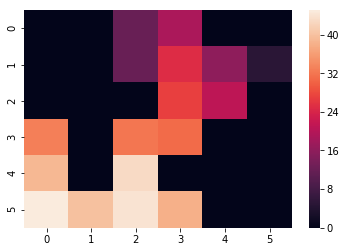

step:482 MAP


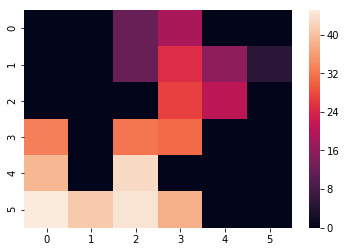

step:483 MAP


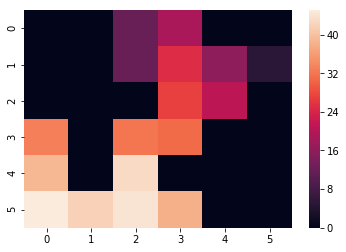

step:484 MAP


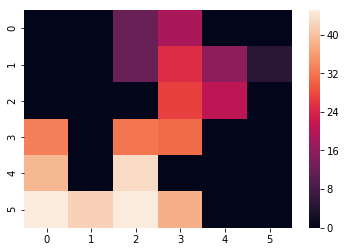

step:485 MAP


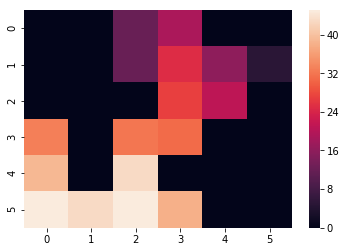

step:486 MAP


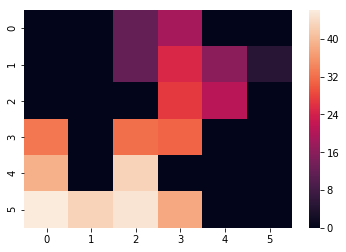

step:487 MAP


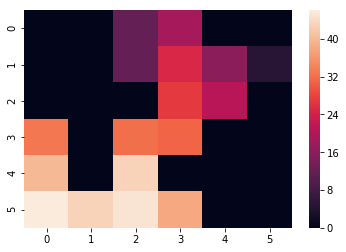

step:488 MAP


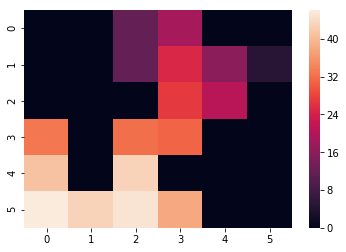

step:489 MAP


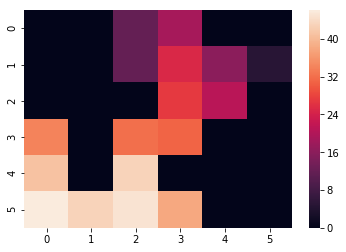

step:490 MAP


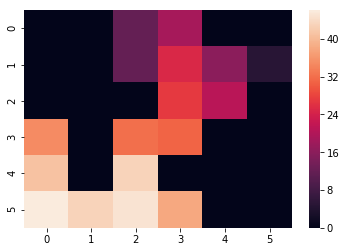

step:491 MAP


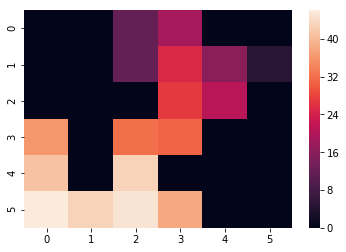

step:492 MAP


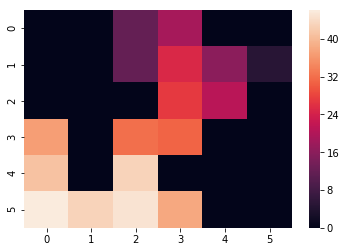

step:493 MAP


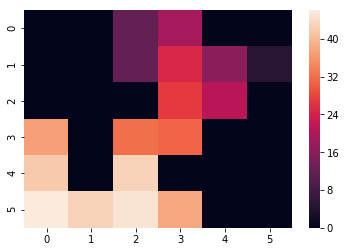

step:494 MAP


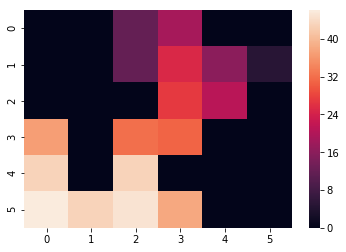

step:495 MAP


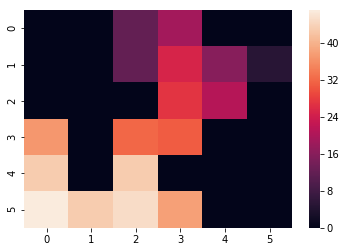

step:496 MAP


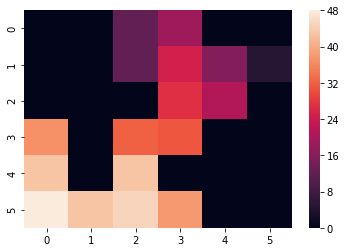

step:497 MAP


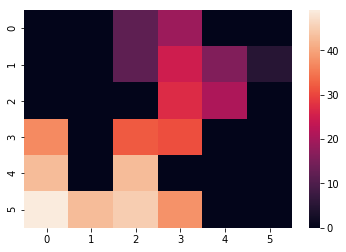

step:498 MAP


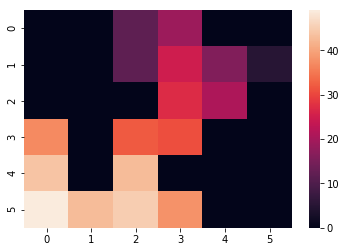

step:499 MAP


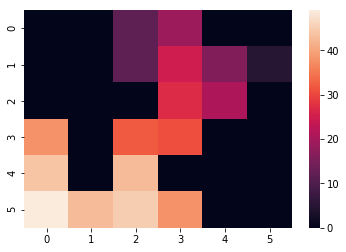

step:500 MAP


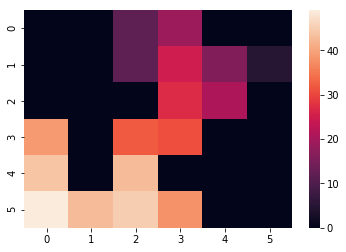

step:501 MAP


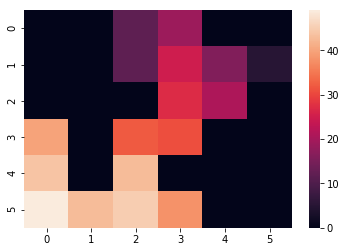

step:502 MAP


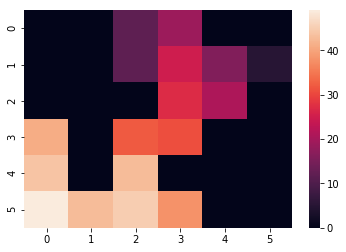

step:503 MAP


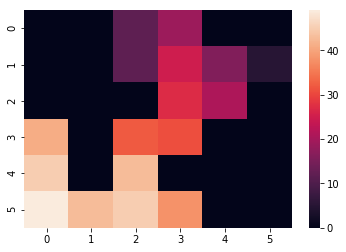

step:504 MAP


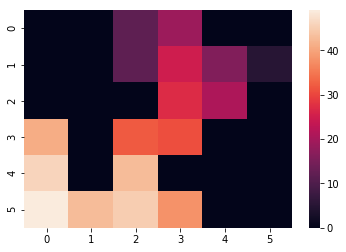

step:505 MAP


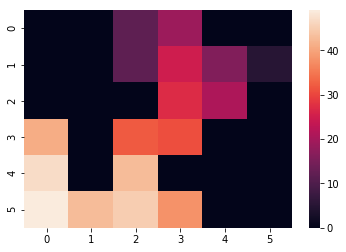

step:506 MAP


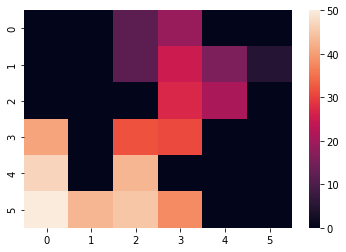

step:507 MAP


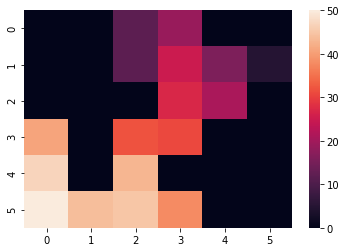

step:508 MAP


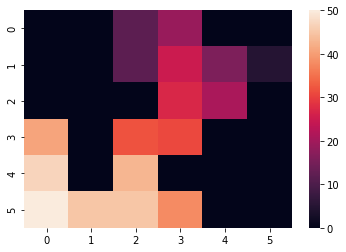

step:509 MAP


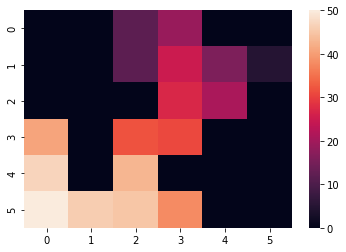

step:510 MAP


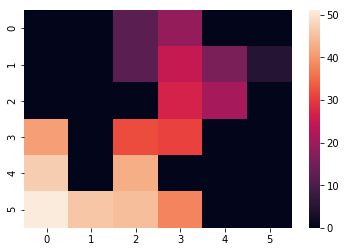

step:511 MAP


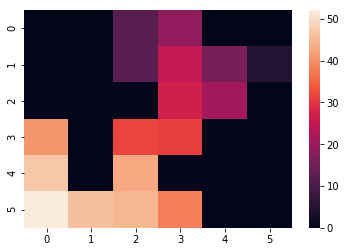

step:512 MAP


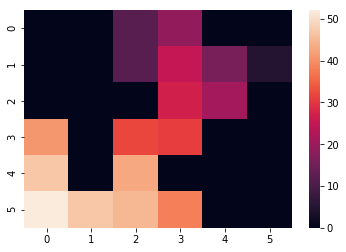

step:513 MAP


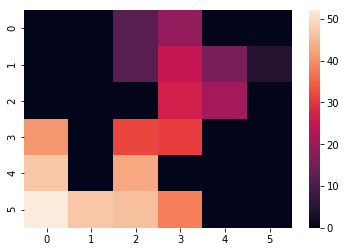

step:514 MAP


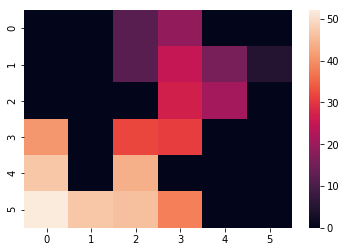

step:515 MAP


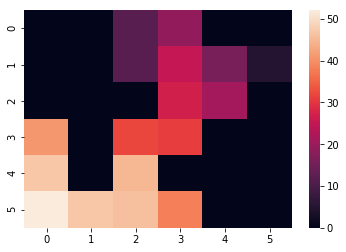

step:516 MAP


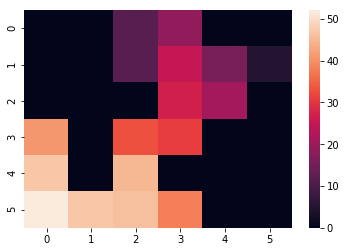

step:517 MAP


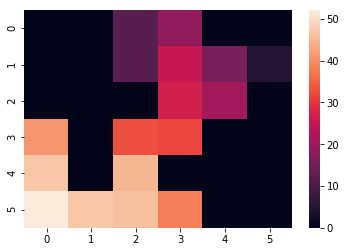

step:518 MAP


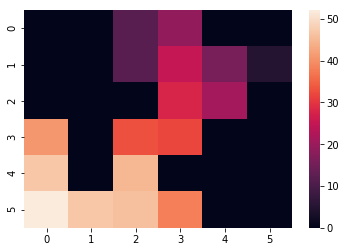

step:519 MAP


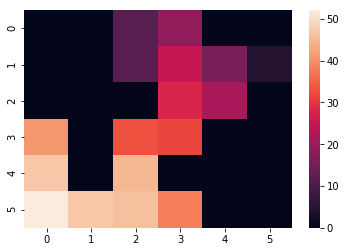

step:520 MAP


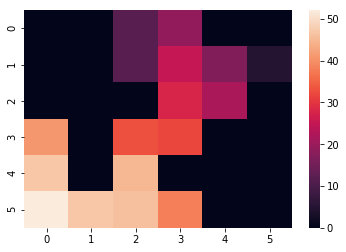

step:521 MAP


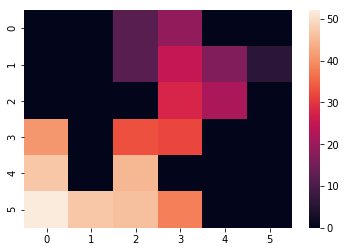

step:522 MAP


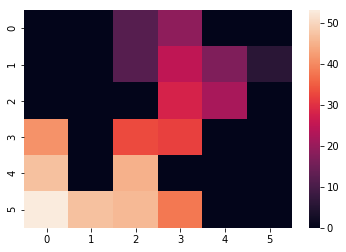

step:523 MAP


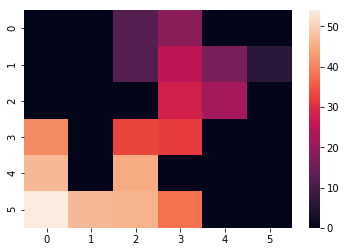

step:524 MAP


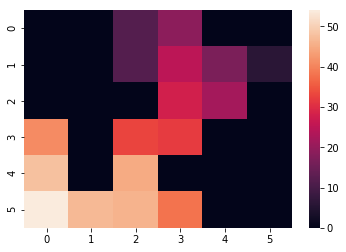

step:525 MAP


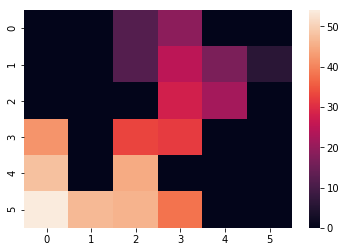

step:526 MAP


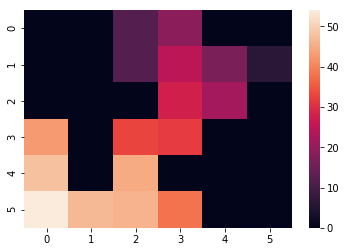

step:527 MAP


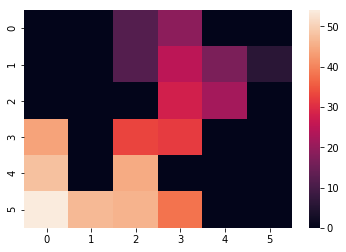

step:528 MAP


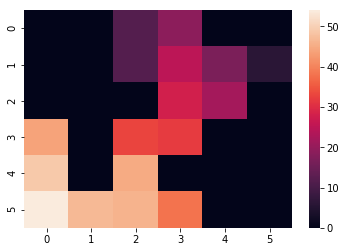

step:529 MAP


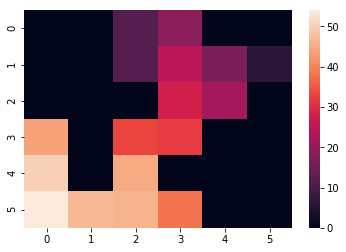

step:530 MAP


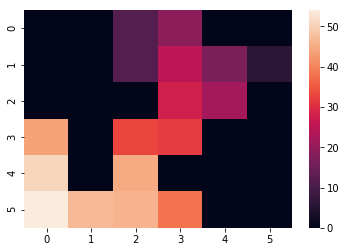

step:531 MAP


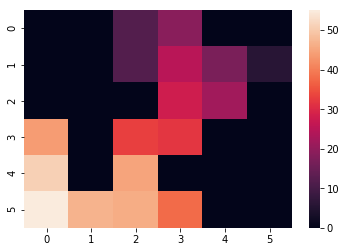

step:532 MAP


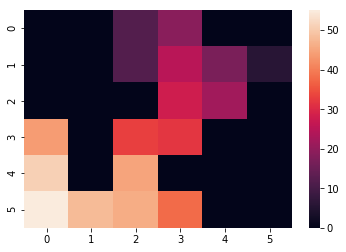

step:533 MAP


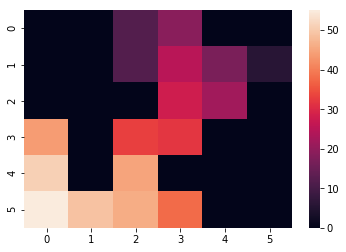

step:534 MAP


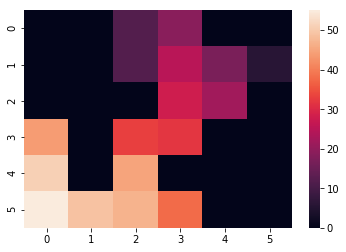

step:535 MAP


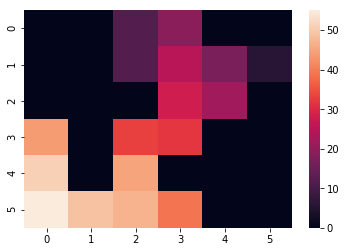

step:536 MAP


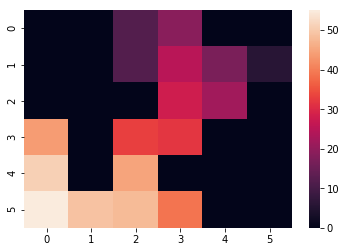

step:537 MAP


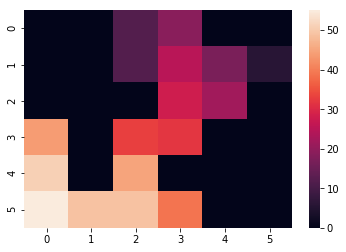

step:538 MAP


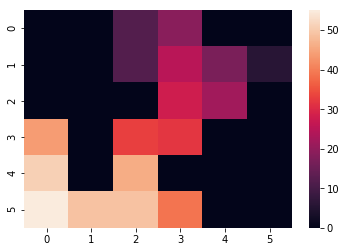

step:539 MAP


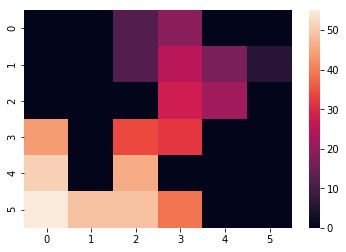

step:540 MAP


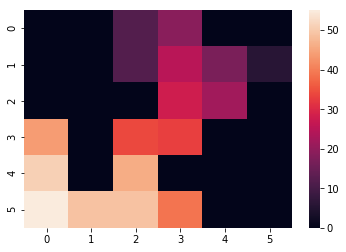

step:541 MAP


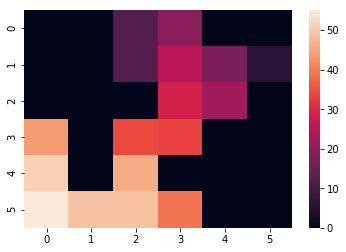

step:542 MAP


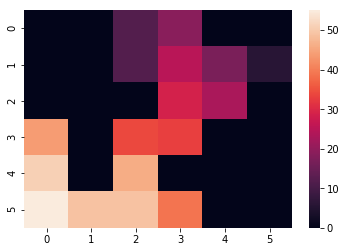

step:543 MAP


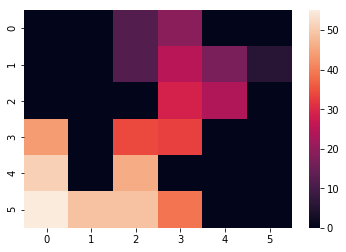

step:544 MAP


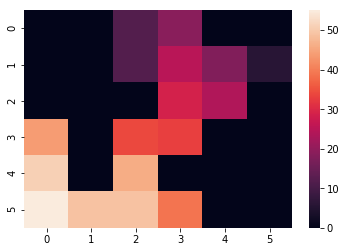

step:545 MAP


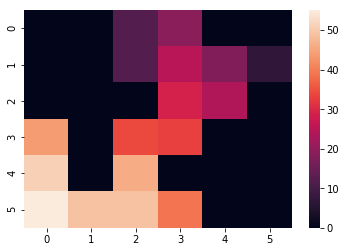

step:546 MAP


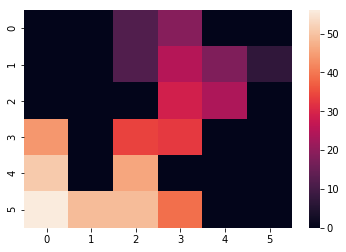

step:547 MAP


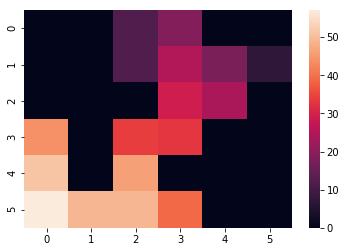

step:548 MAP


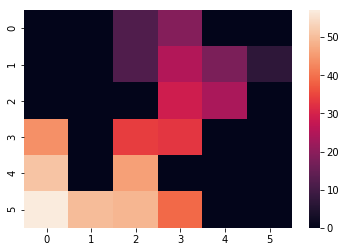

step:549 MAP


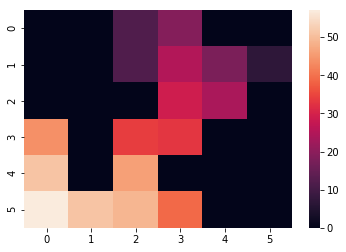

step:550 MAP


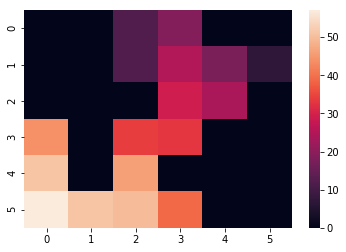

step:551 MAP


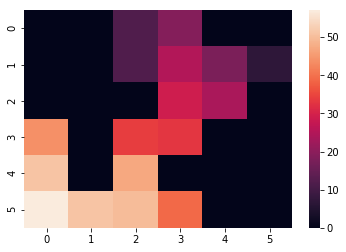

step:552 MAP


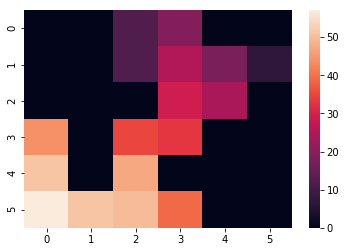

step:553 MAP


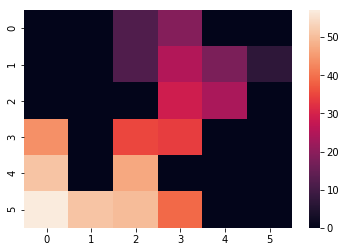

step:554 MAP


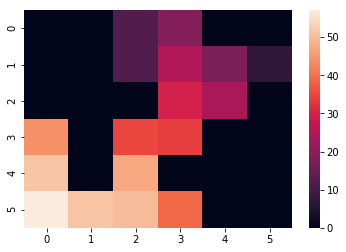

step:555 MAP


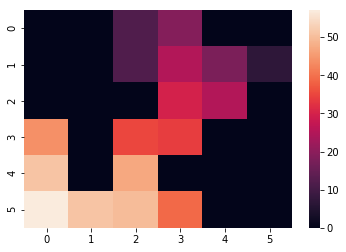

step:556 MAP


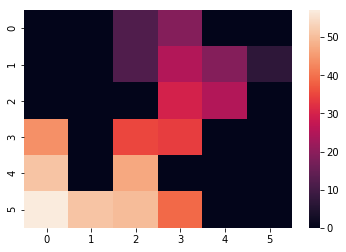

step:557 MAP


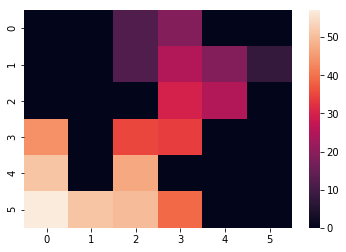

step:558 MAP


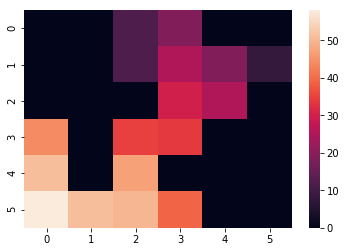

step:559 MAP


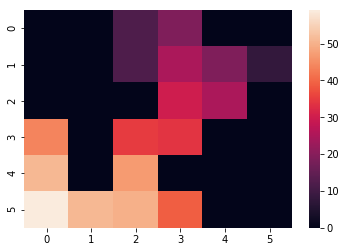

step:560 MAP


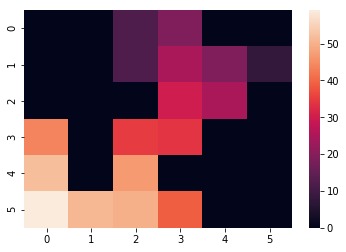

step:561 MAP


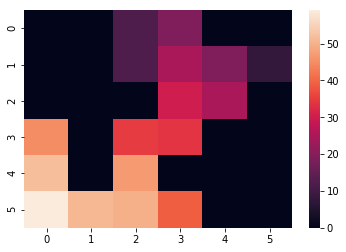

step:562 MAP


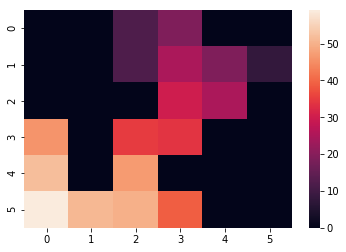

step:563 MAP


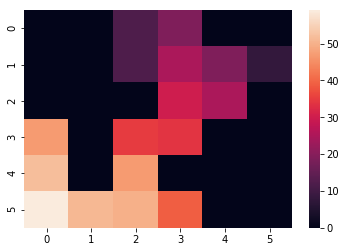

step:564 MAP


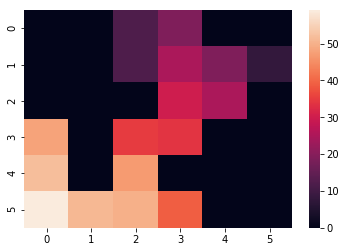

step:565 MAP


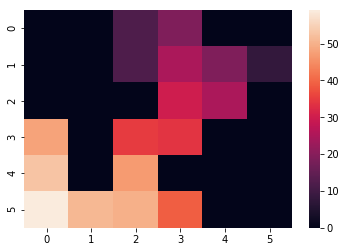

step:566 MAP


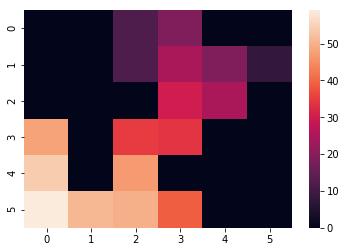

step:567 MAP


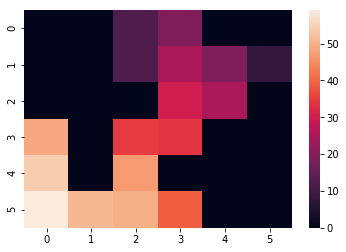

step:568 MAP


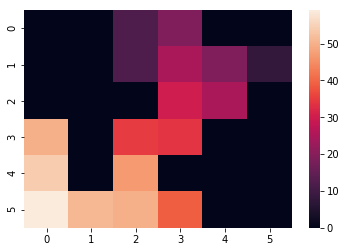

step:569 MAP


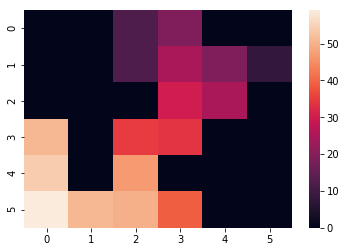

step:570 MAP


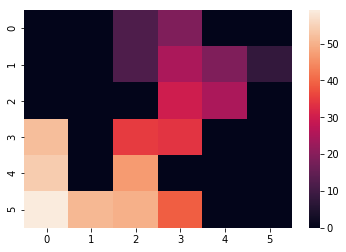

step:571 MAP


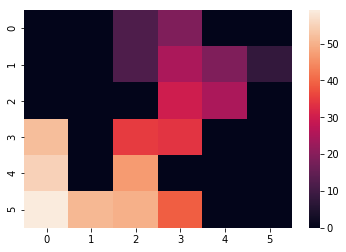

step:572 MAP


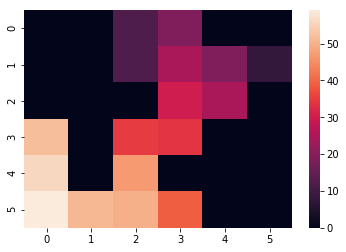

step:573 MAP


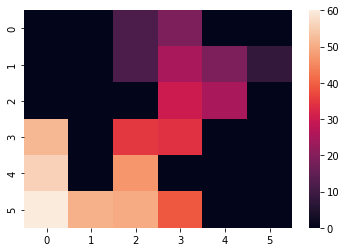

step:574 MAP


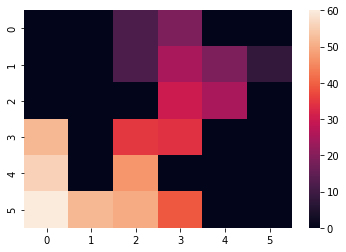

step:575 MAP


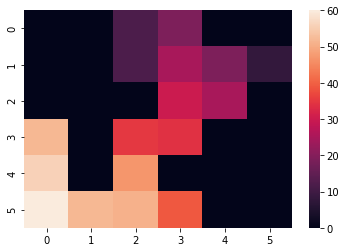

step:576 MAP


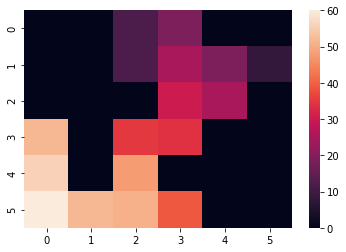

step:577 MAP


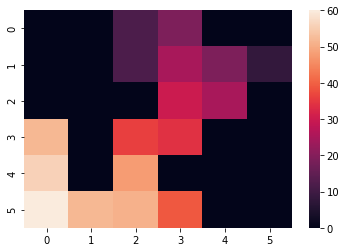

step:578 MAP


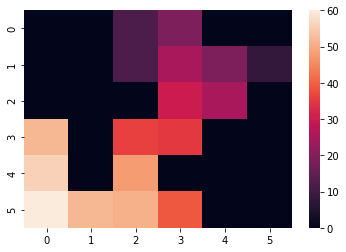

step:579 MAP


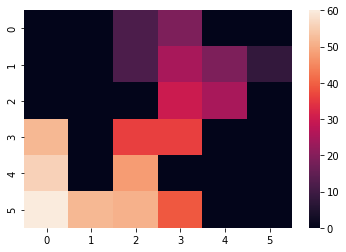

step:580 MAP


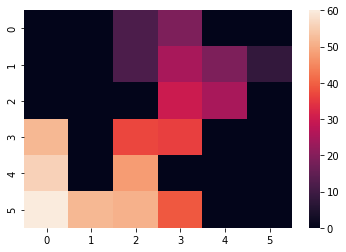

step:581 MAP


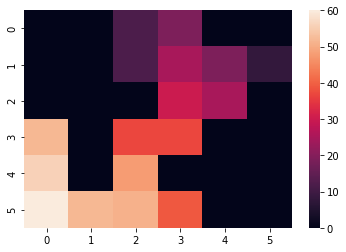

step:582 MAP


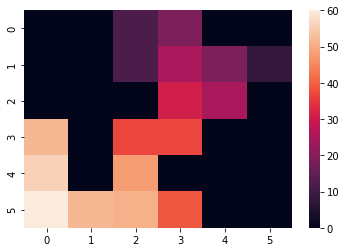

step:583 MAP


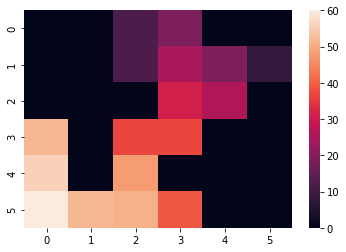

step:584 MAP


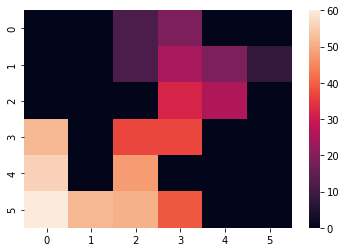

step:585 MAP


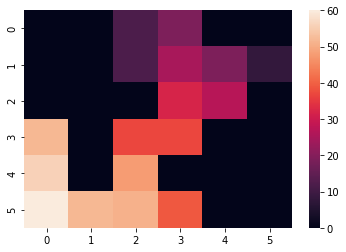

step:586 MAP


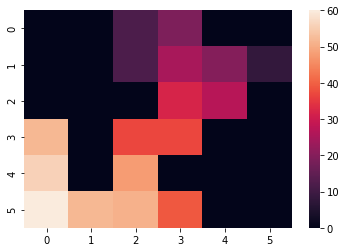

step:587 MAP


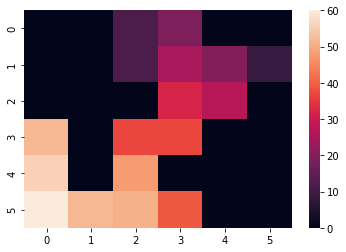

step:588 MAP


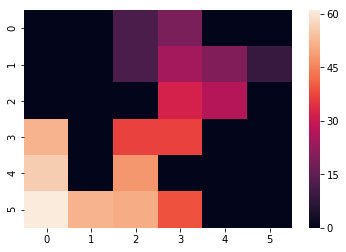

step:589 MAP


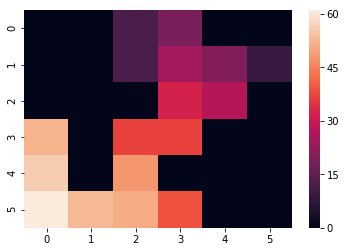

step:590 MAP


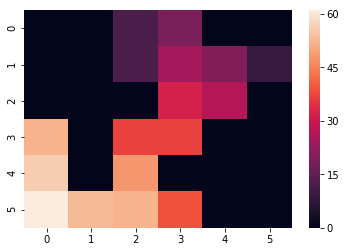

step:591 MAP


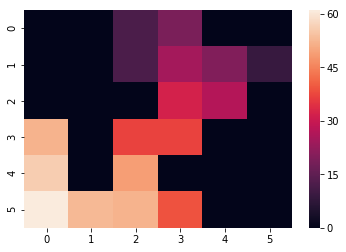

step:592 MAP


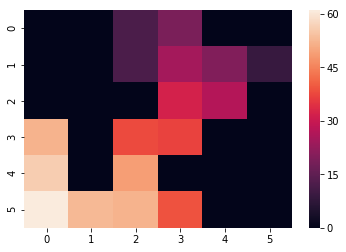

step:593 MAP


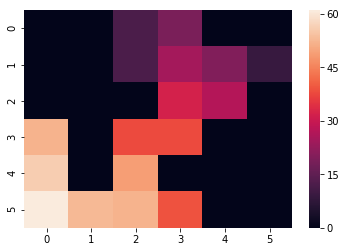

step:594 MAP


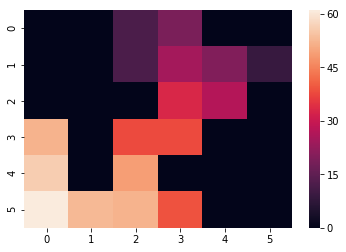

step:595 MAP


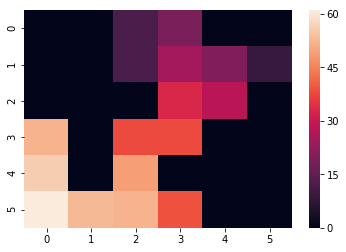

step:596 MAP


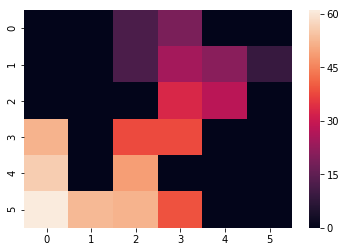

step:597 MAP


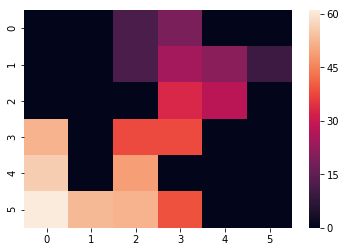

step:598 MAP


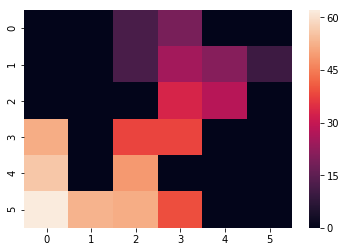

step:599 MAP


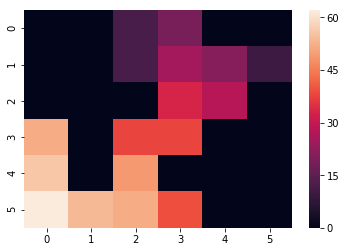

step:600 MAP


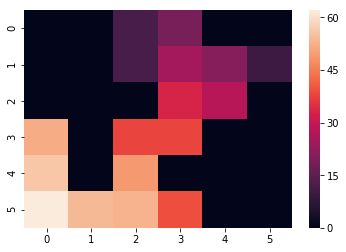

step:601 MAP


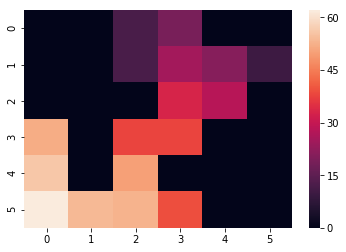

step:602 MAP


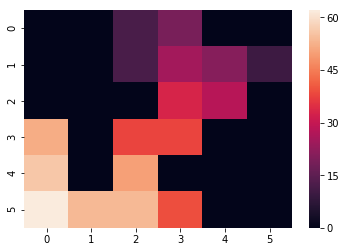

step:603 MAP


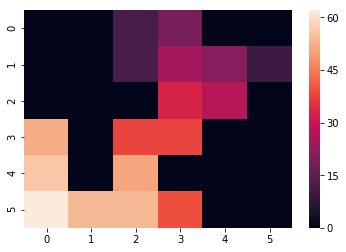

step:604 MAP


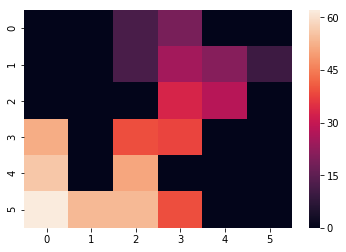

step:605 MAP


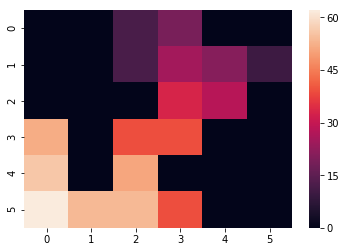

step:606 MAP


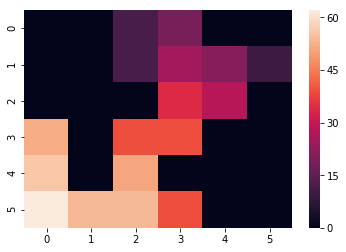

step:607 MAP


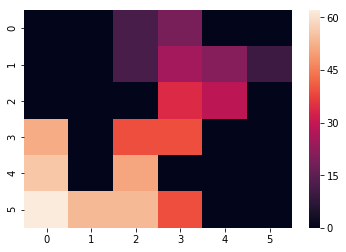

step:608 MAP


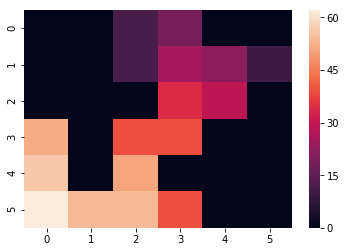

step:609 MAP


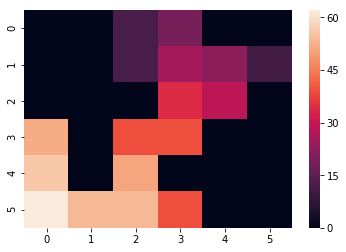

step:610 MAP


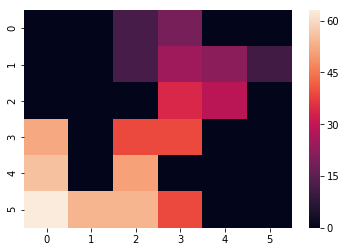

step:611 MAP


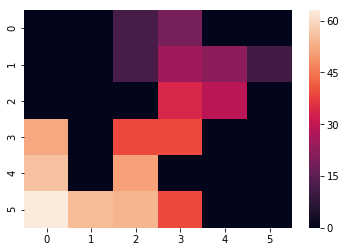

step:612 MAP


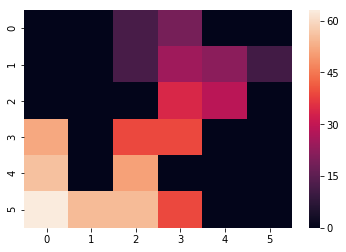

step:613 MAP


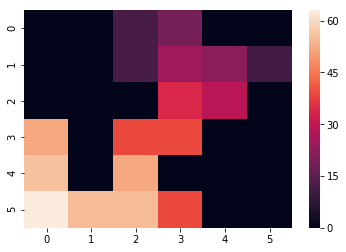

step:614 MAP


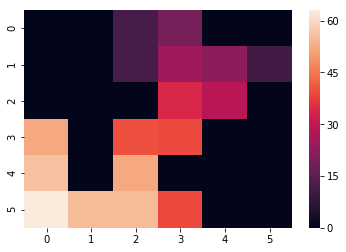

step:615 MAP


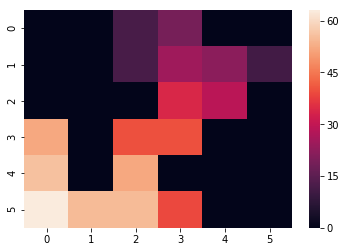

step:616 MAP


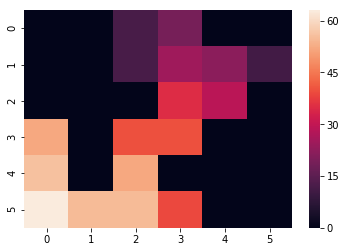

step:617 MAP


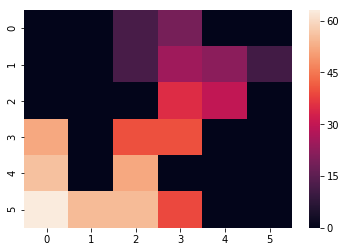

step:618 MAP


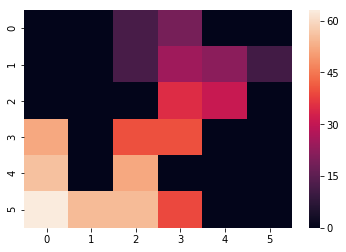

step:619 MAP


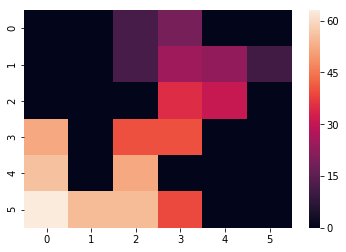

step:620 MAP


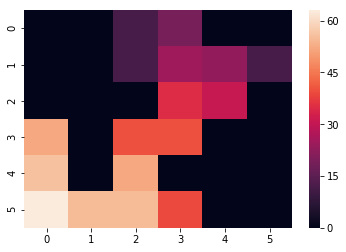

step:621 MAP


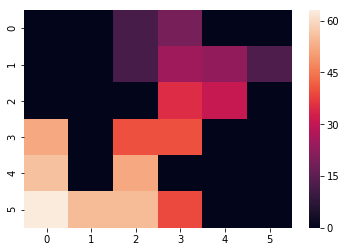

step:622 MAP


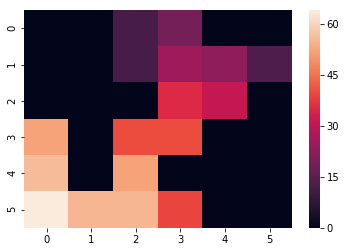

step:623 MAP


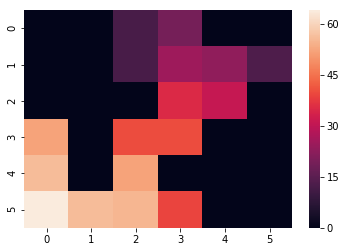

step:624 MAP


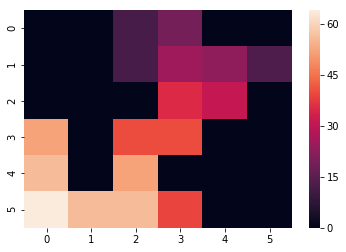

step:625 MAP


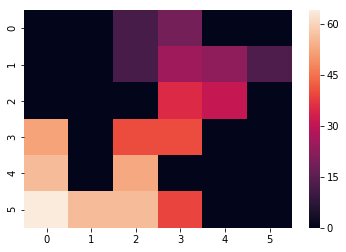

step:626 MAP


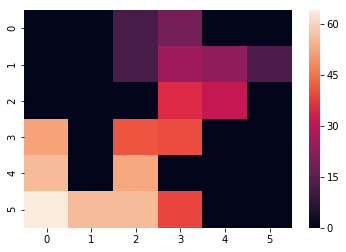

step:627 MAP


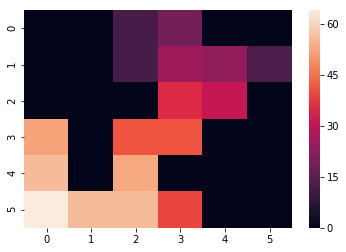

step:628 MAP


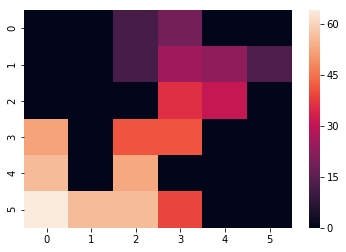

step:629 MAP


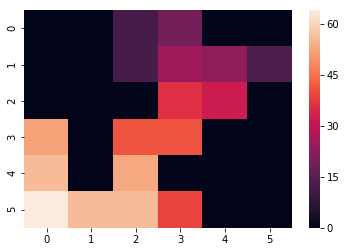

step:630 MAP


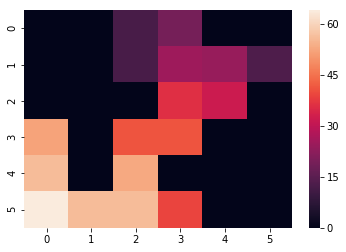

step:631 MAP


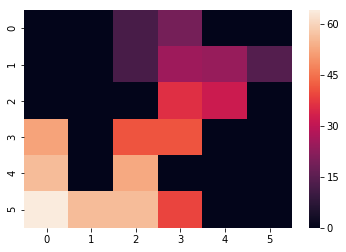

step:632 MAP


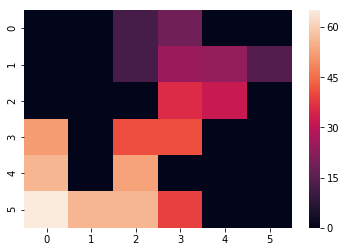

step:633 MAP


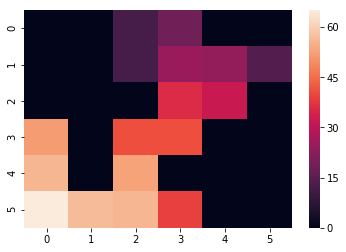

step:634 MAP


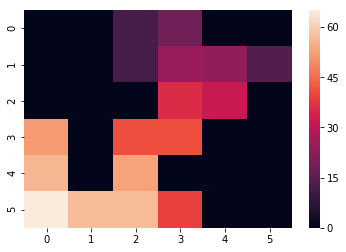

step:635 MAP


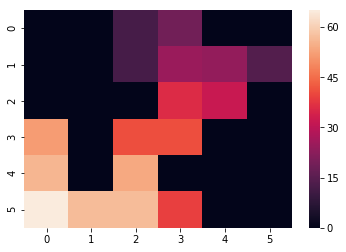

step:636 MAP


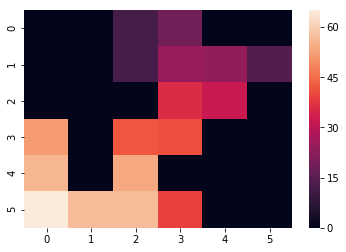

step:637 MAP


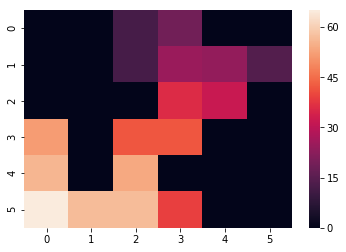

step:638 MAP


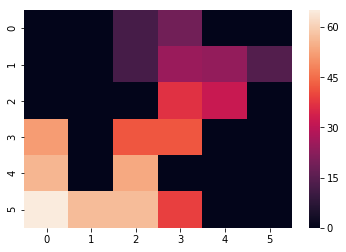

step:639 MAP


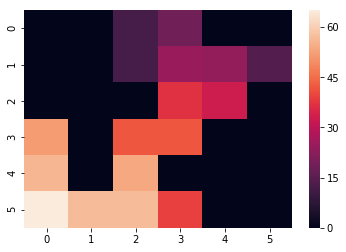

step:640 MAP


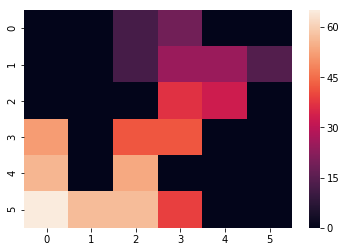

step:641 MAP


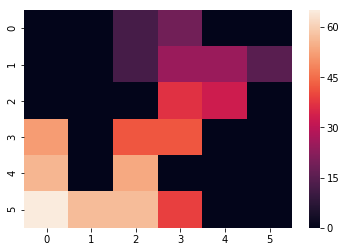

step:642 MAP


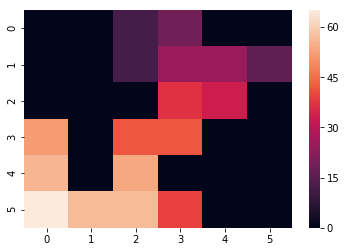

step:643 MAP


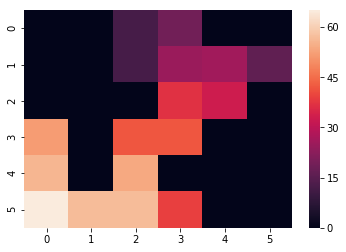

step:644 MAP


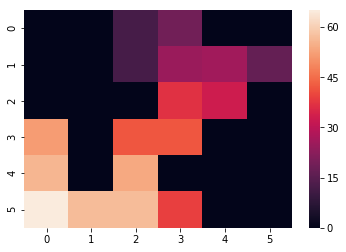

step:645 MAP


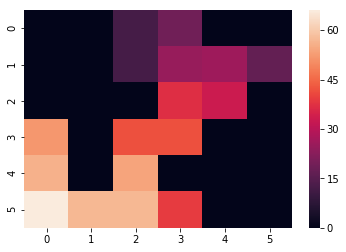

step:646 MAP


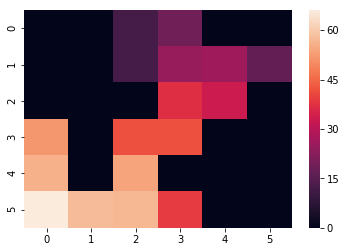

step:647 MAP


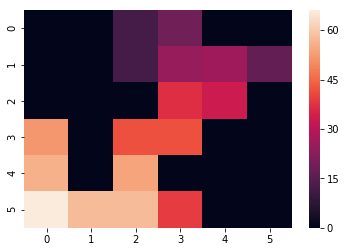

step:648 MAP


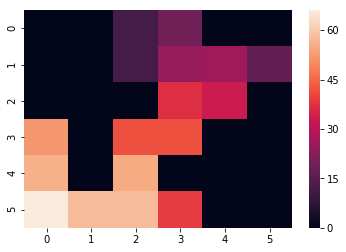

step:649 MAP


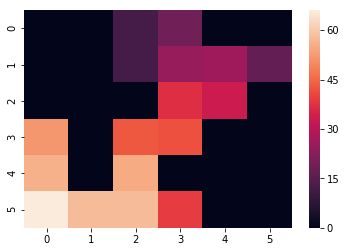

step:650 MAP


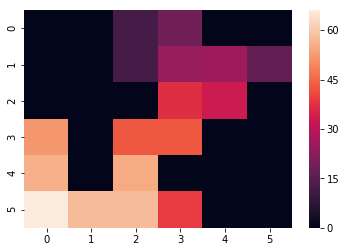

step:651 MAP


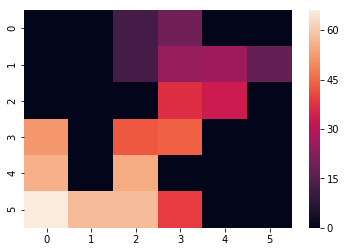

step:652 MAP


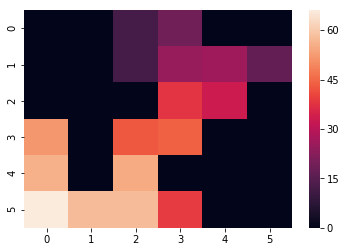

step:653 MAP


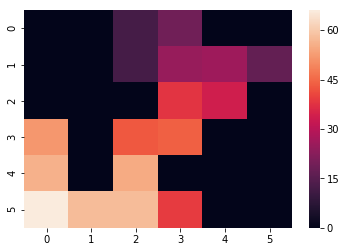

step:654 MAP


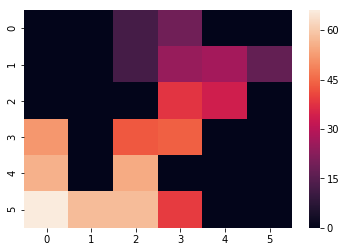

step:655 MAP


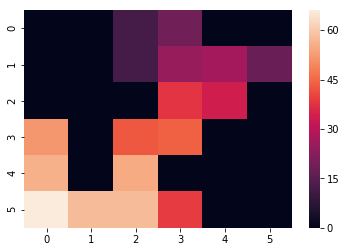

step:656 MAP


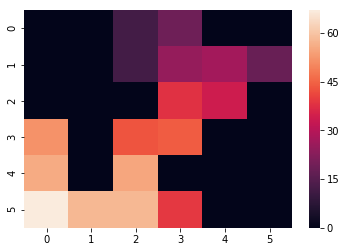

step:657 MAP


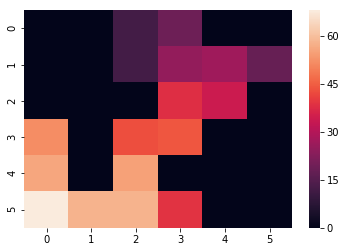

step:658 MAP


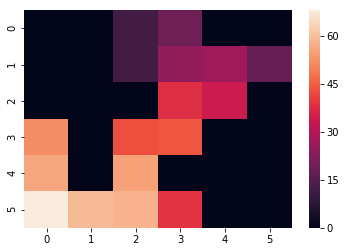

step:659 MAP


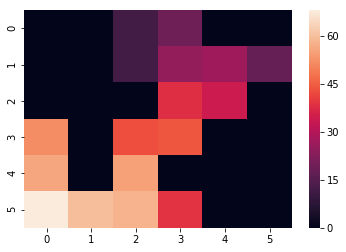

step:660 MAP


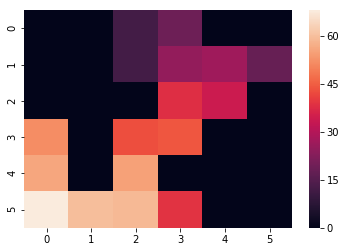

step:661 MAP


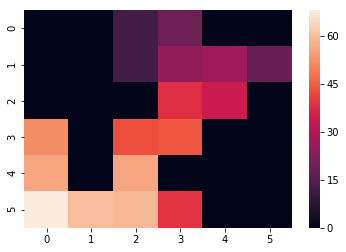

step:662 MAP


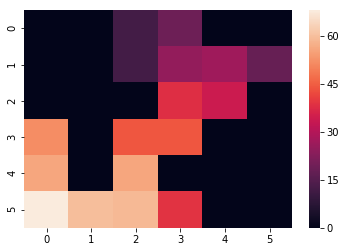

step:663 MAP


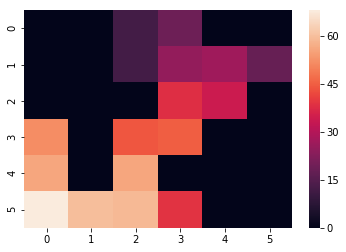

step:664 MAP


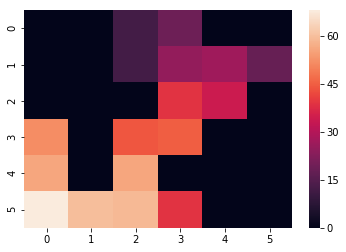

step:665 MAP


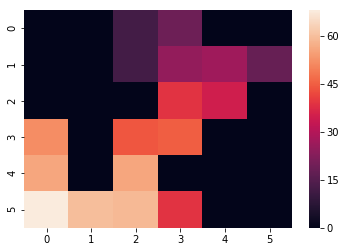

step:666 MAP


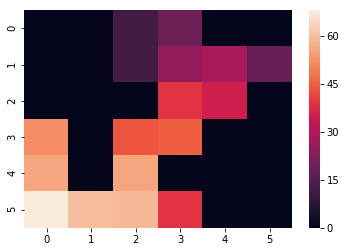

step:667 MAP


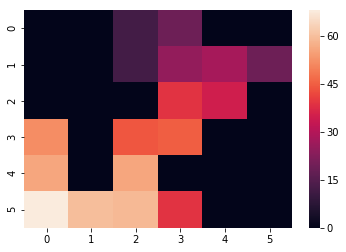

step:668 MAP


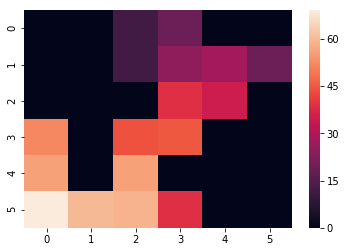

step:669 MAP


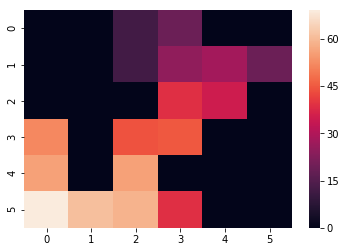

step:670 MAP


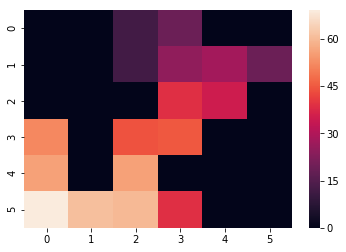

step:671 MAP


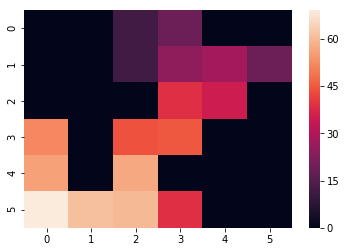

step:672 MAP


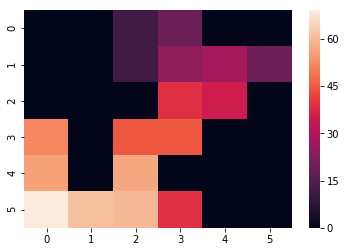

step:673 MAP


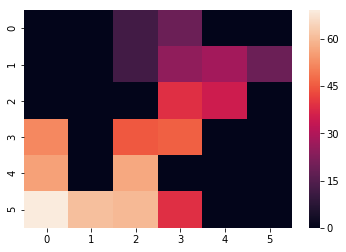

step:674 MAP


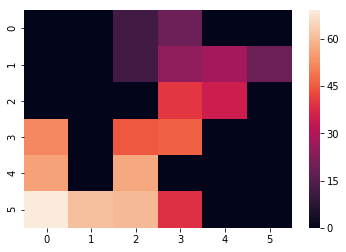

step:675 MAP


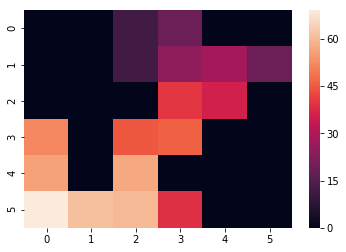

step:676 MAP


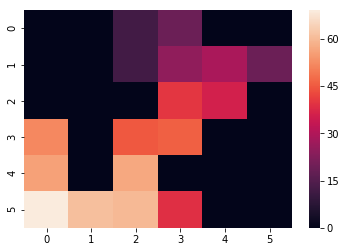

step:677 MAP


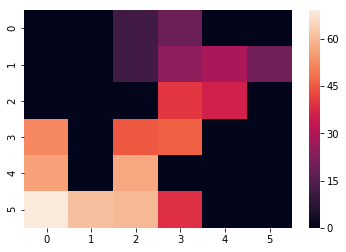

step:678 MAP


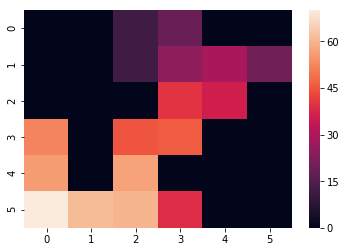

step:679 MAP


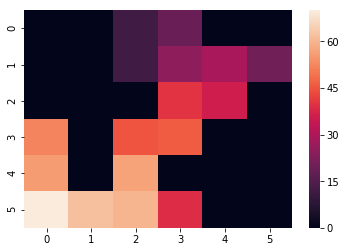

step:680 MAP


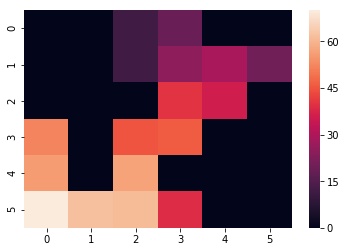

step:681 MAP


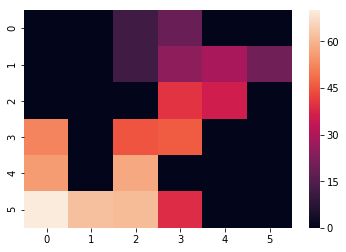

step:682 MAP


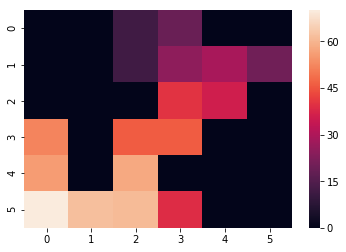

step:683 MAP


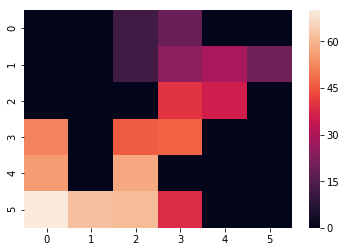

step:684 MAP


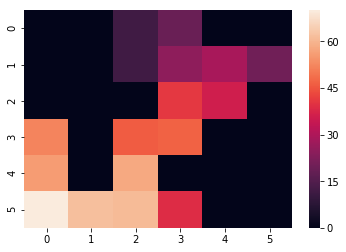

step:685 MAP


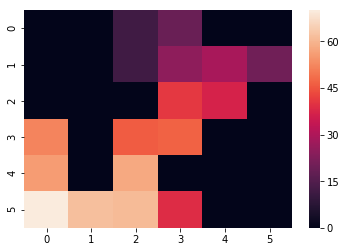

step:686 MAP


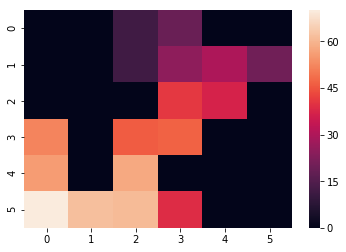

step:687 MAP


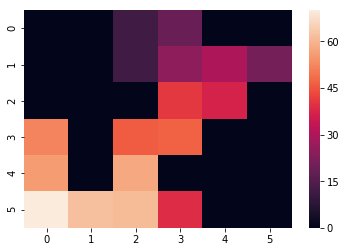

step:688 MAP


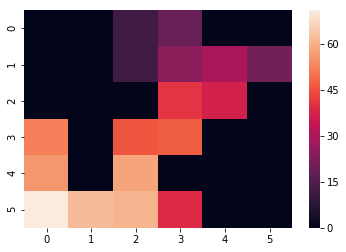

step:689 MAP


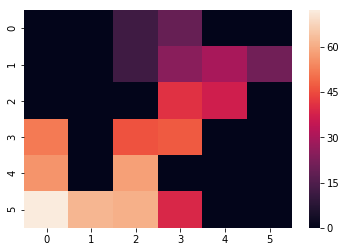

step:690 MAP


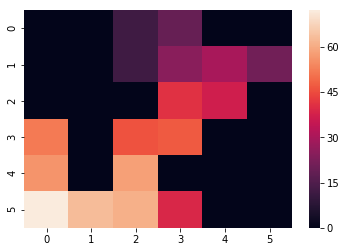

step:691 MAP


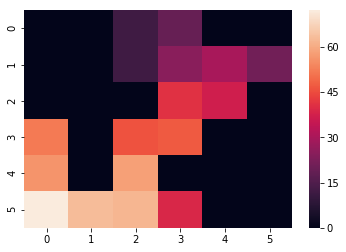

step:692 MAP


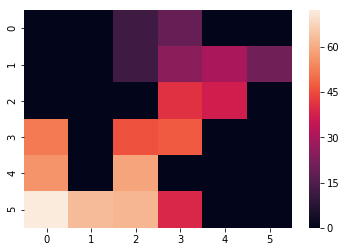

step:693 MAP


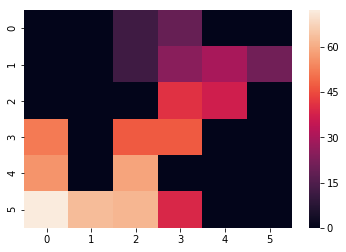

step:694 MAP


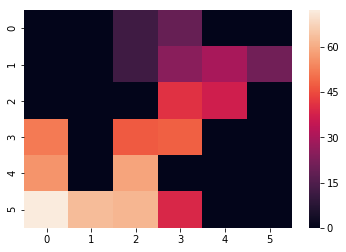

step:695 MAP


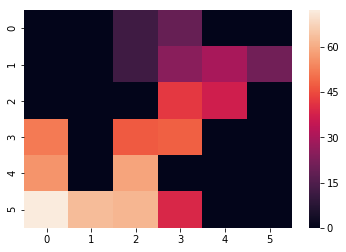

step:696 MAP


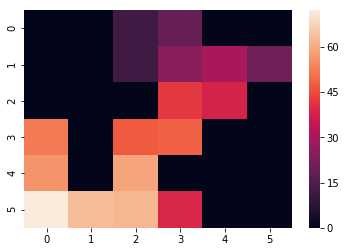

step:697 MAP


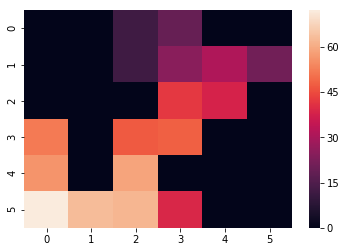

step:698 MAP


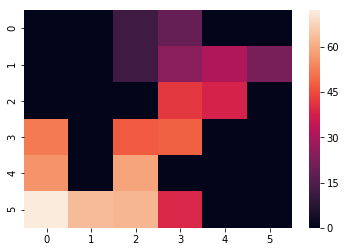

step:699 MAP


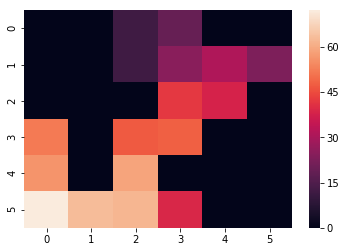

step:700 MAP


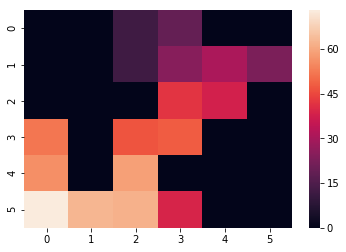

step:701 MAP


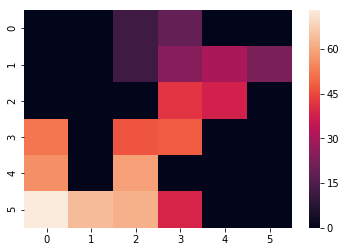

step:702 MAP


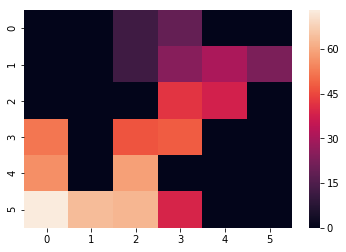

step:703 MAP


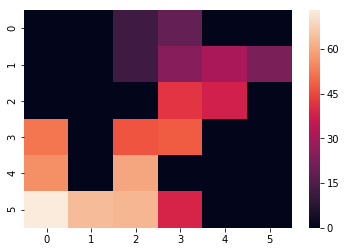

step:704 MAP


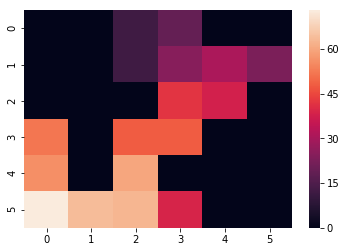

step:705 MAP


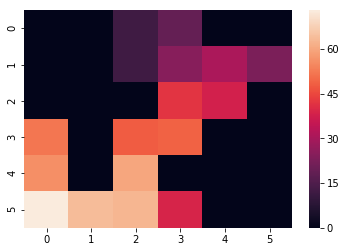

step:706 MAP


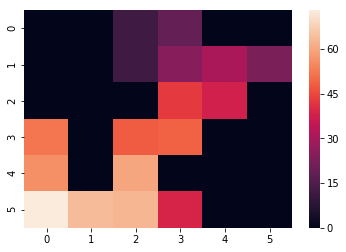

step:707 MAP


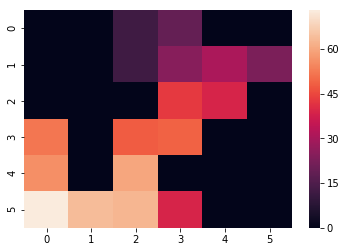

step:708 MAP


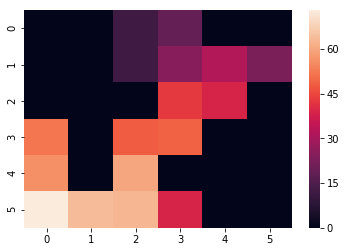

step:709 MAP


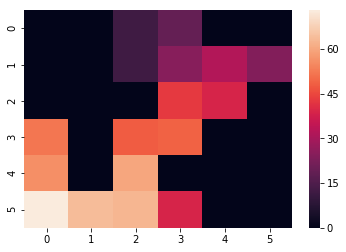

step:710 MAP


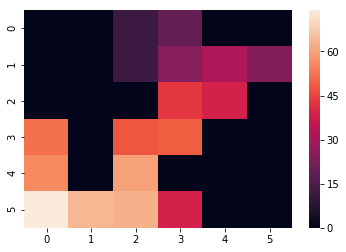

step:711 MAP


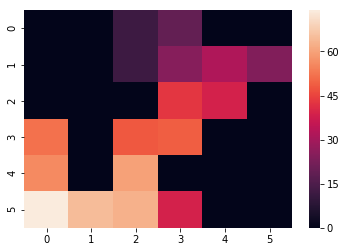

step:712 MAP


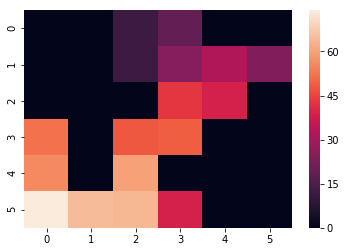

step:713 MAP


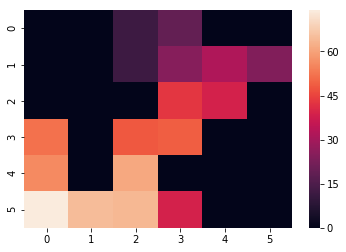

step:714 MAP


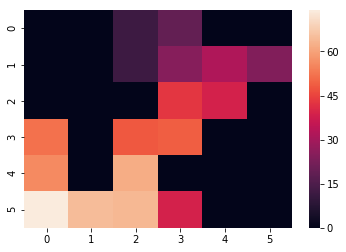

step:715 MAP


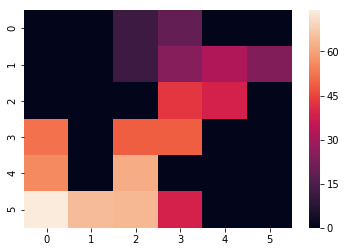

step:716 MAP


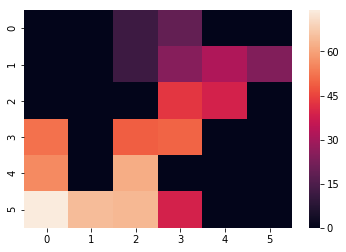

step:717 MAP


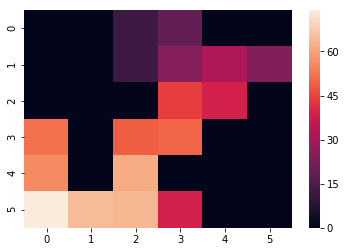

step:718 MAP


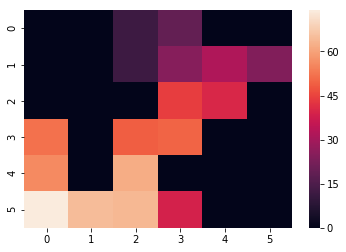

step:719 MAP


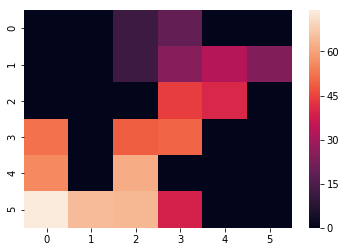

step:720 MAP


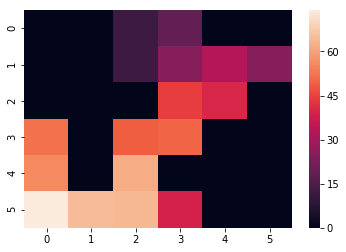

step:721 MAP


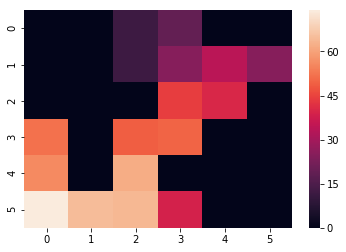

step:722 MAP


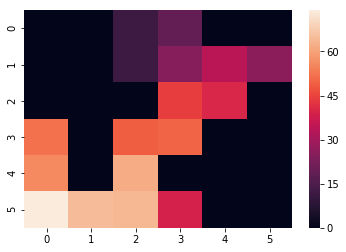

step:723 MAP


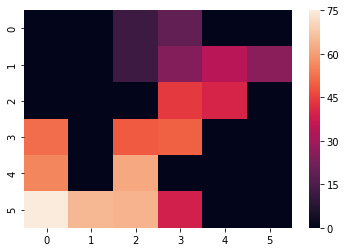

step:724 MAP


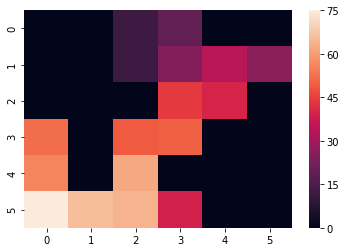

step:725 MAP


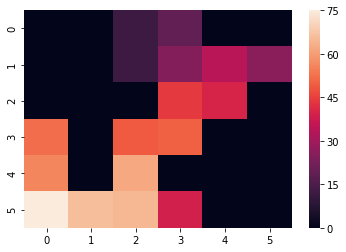

step:726 MAP


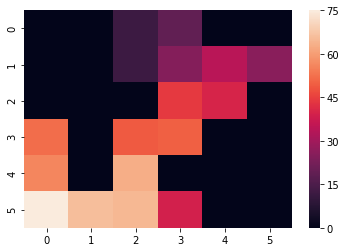

step:727 MAP


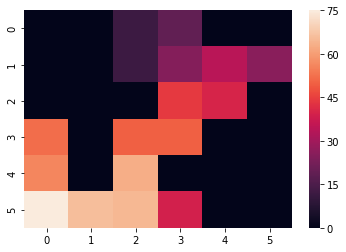

step:728 MAP


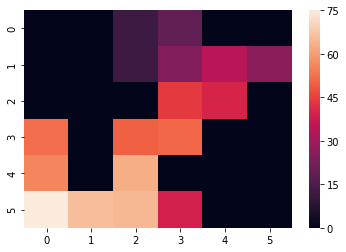

step:729 MAP


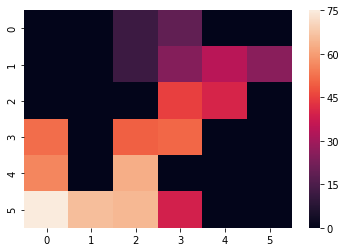

step:730 MAP


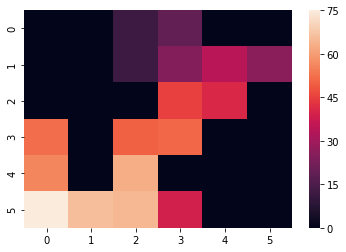

step:731 MAP


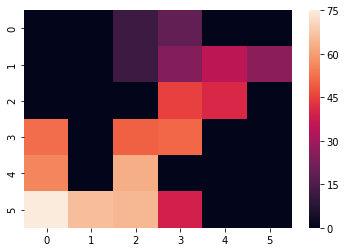

step:732 MAP


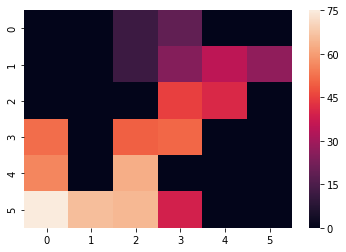

step:733 MAP


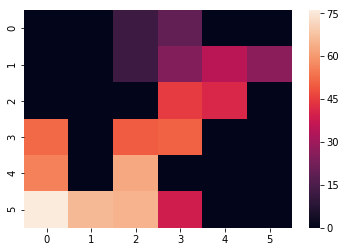

step:734 MAP


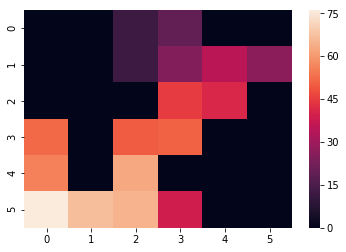

step:735 MAP


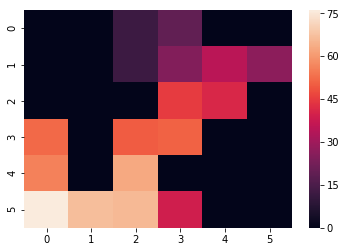

step:736 MAP


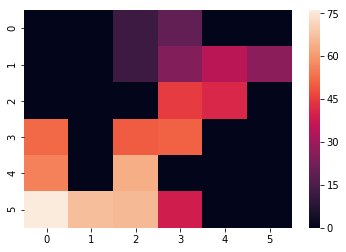

step:737 MAP


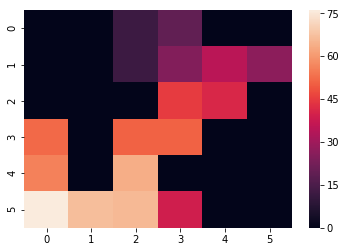

step:738 MAP


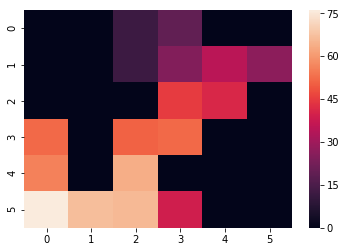

step:739 MAP


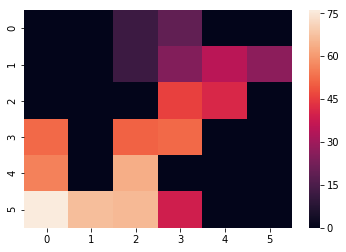

step:740 MAP


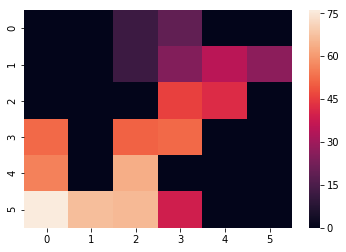

step:741 MAP


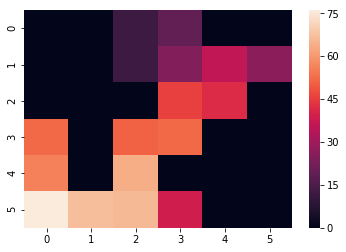

step:742 MAP


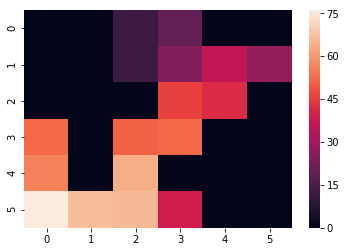

step:743 MAP


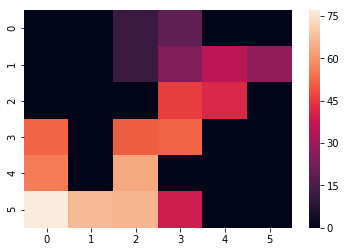

step:744 MAP


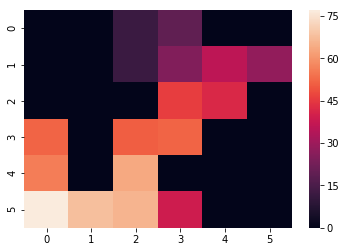

step:745 MAP


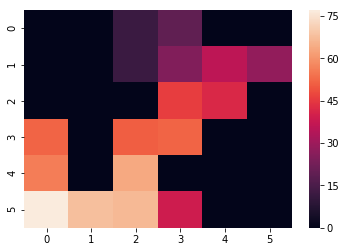

step:746 MAP


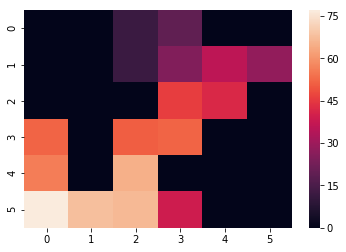

step:747 MAP


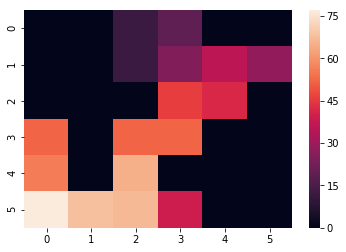

step:748 MAP


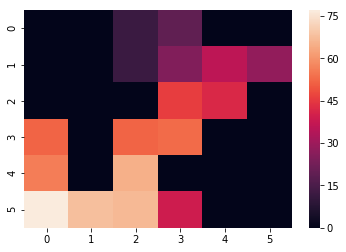

step:749 MAP


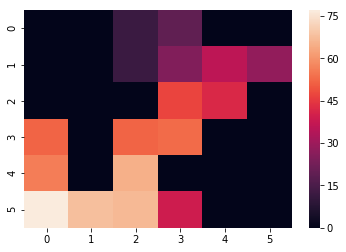

step:750 MAP


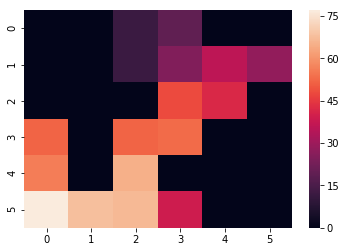

step:751 MAP


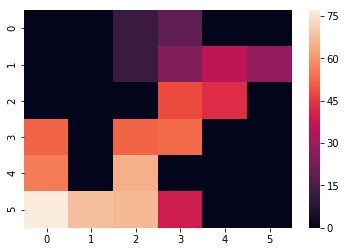

step:752 MAP


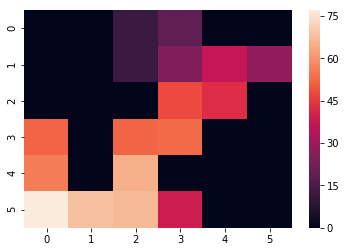

step:753 MAP


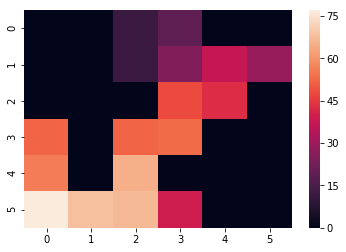

step:754 MAP


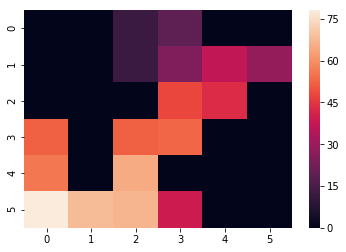

step:755 MAP


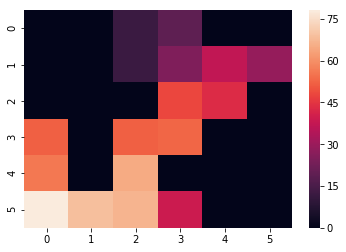

step:756 MAP


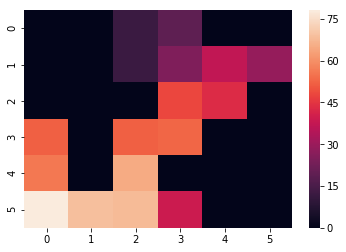

step:757 MAP


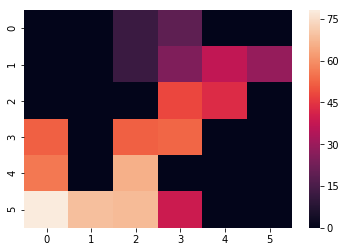

step:758 MAP


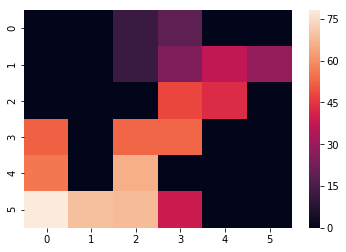

step:759 MAP


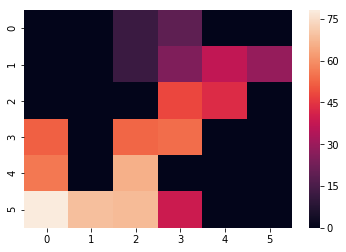

step:760 MAP


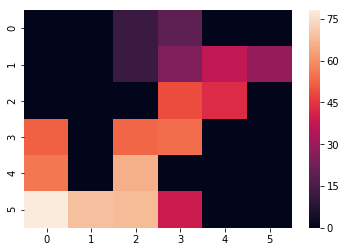

step:761 MAP


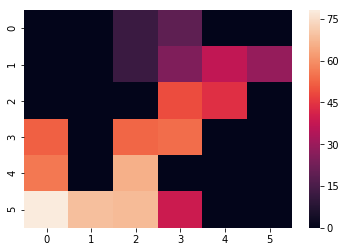

step:762 MAP


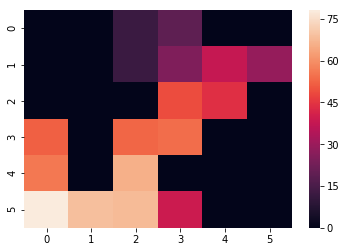

step:763 MAP


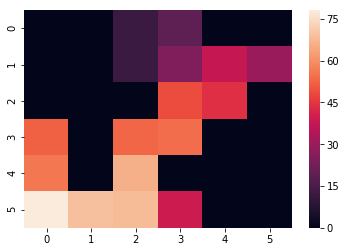

step:764 MAP


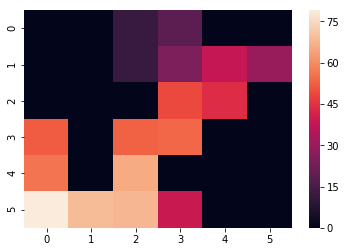

step:765 MAP


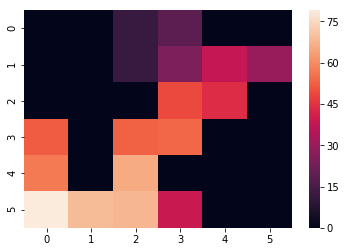

step:766 MAP


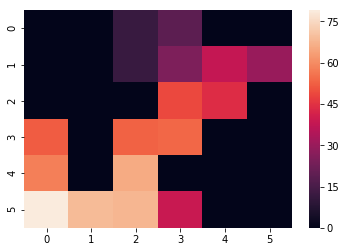

step:767 MAP


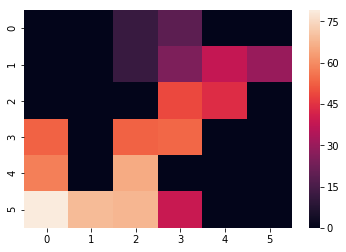

step:768 MAP


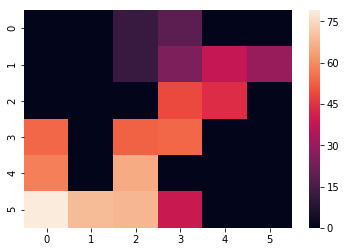

step:769 MAP


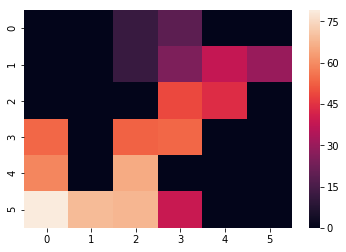

step:770 MAP


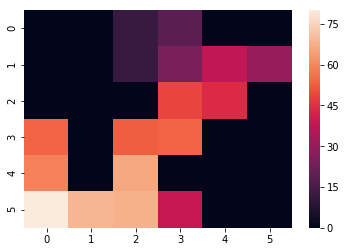

step:771 MAP


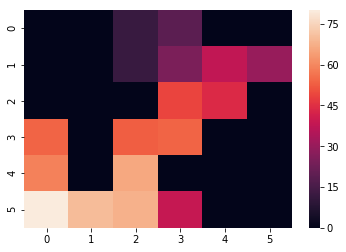

step:772 MAP


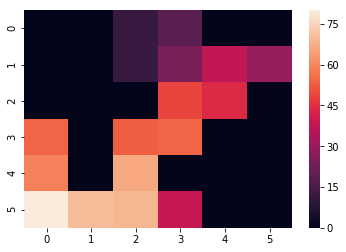

step:773 MAP


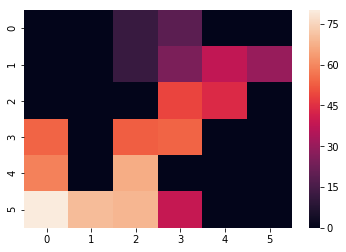

step:774 MAP


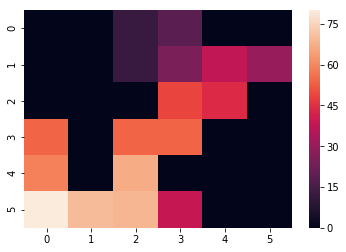

step:775 MAP


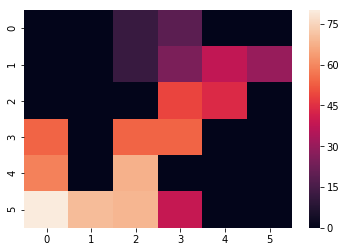

step:776 MAP


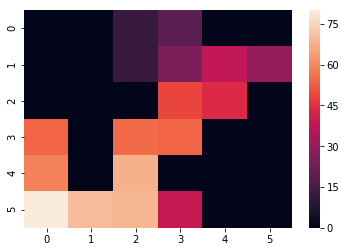

step:777 MAP


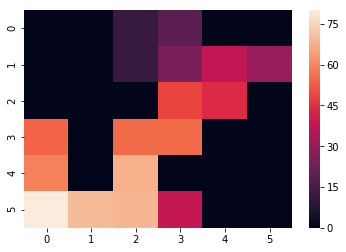

step:778 MAP


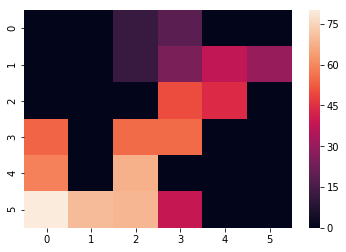

step:779 MAP


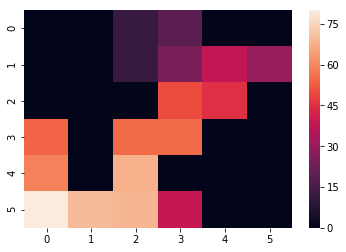

step:780 MAP


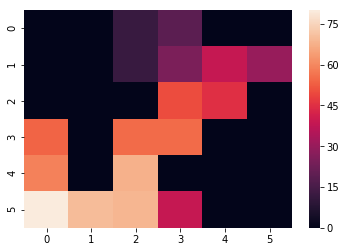

step:781 MAP


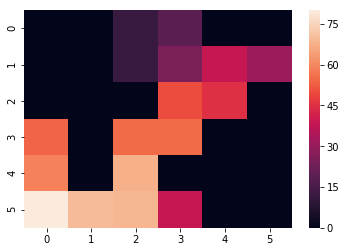

step:782 MAP


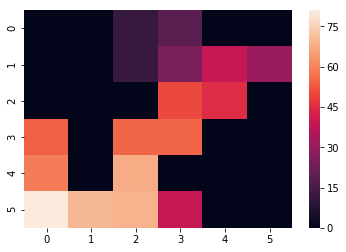

step:783 MAP


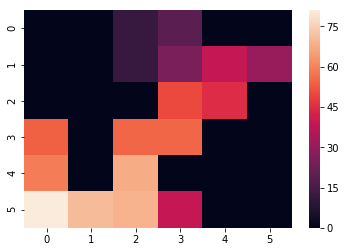

step:784 MAP


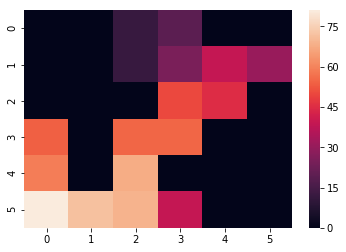

step:785 MAP


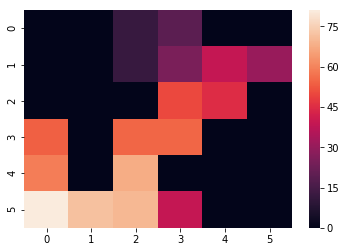

step:786 MAP


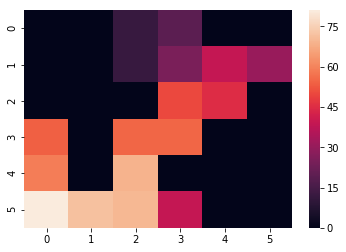

step:787 MAP


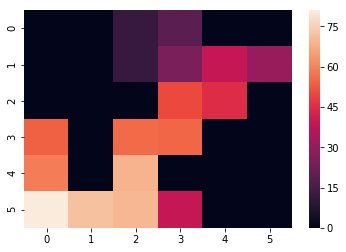

step:788 MAP


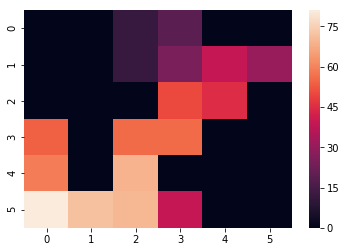

step:789 MAP


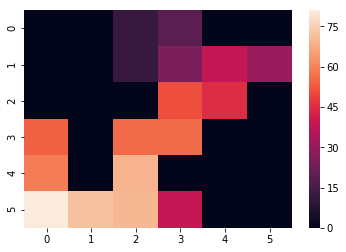

step:790 MAP


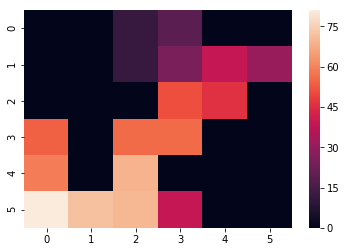

step:791 MAP


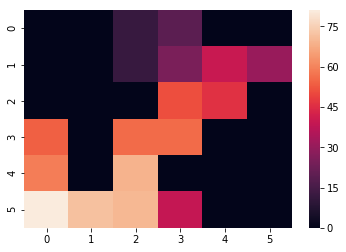

step:792 MAP


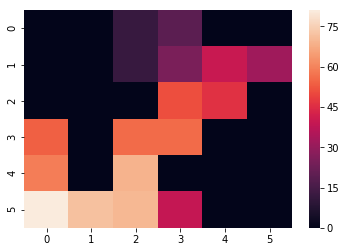

step:793 MAP


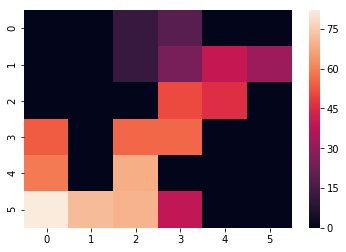

step:794 MAP


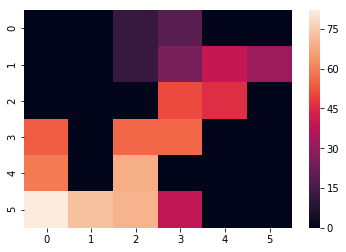

step:795 MAP


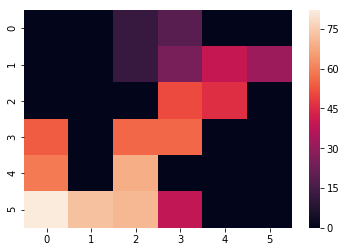

step:796 MAP


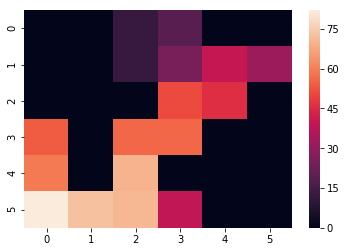

step:797 MAP


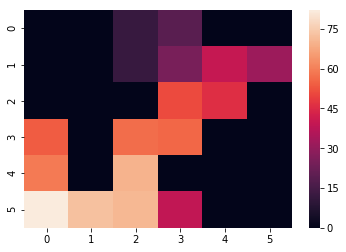

step:798 MAP


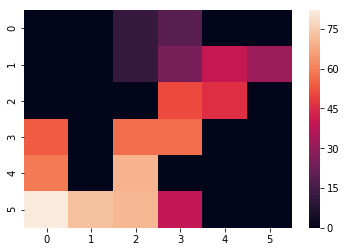

step:799 MAP


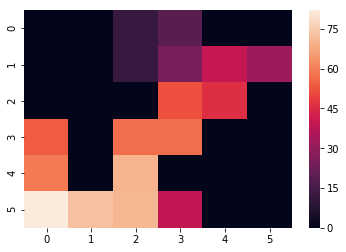

step:800 MAP


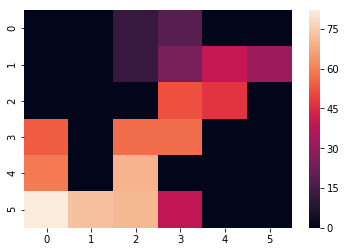

step:801 MAP


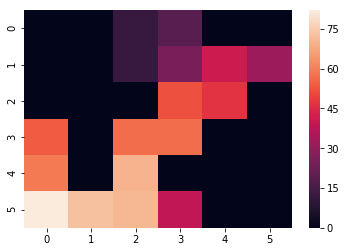

step:802 MAP


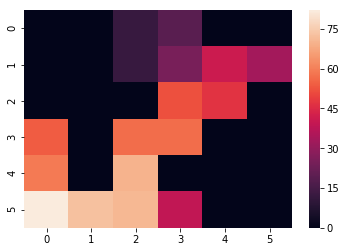

step:803 MAP


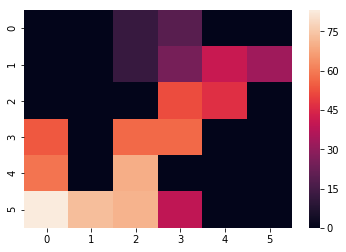

step:804 MAP


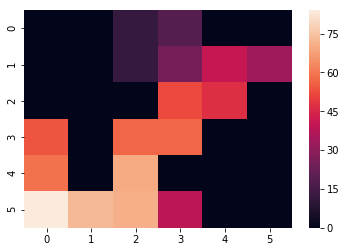

step:805 MAP


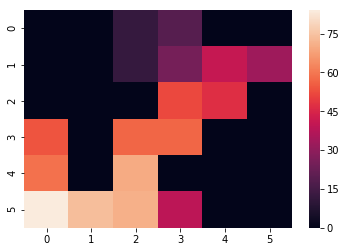

step:806 MAP


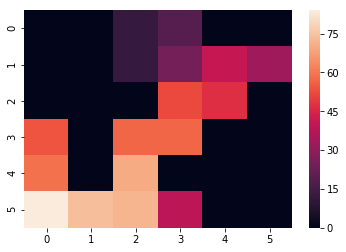

step:807 MAP


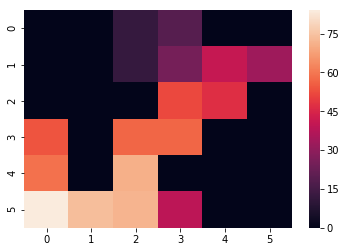

step:808 MAP


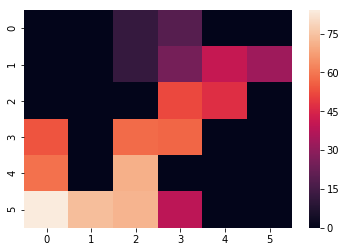

step:809 MAP


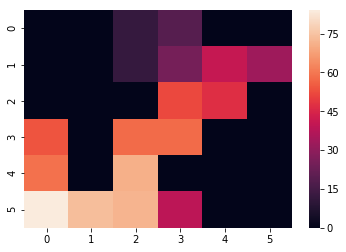

step:810 MAP


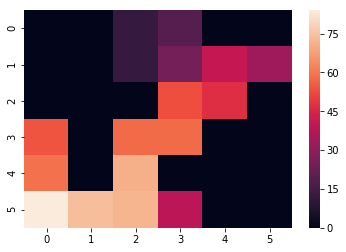

step:811 MAP


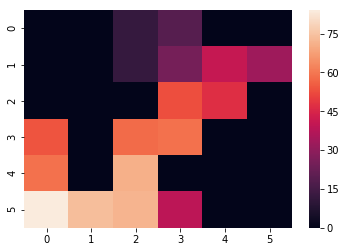

step:812 MAP


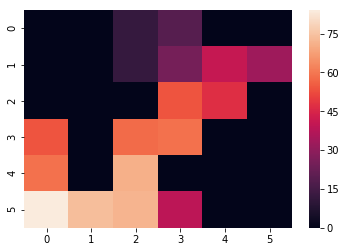

step:813 MAP


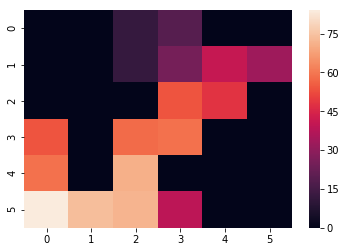

step:814 MAP


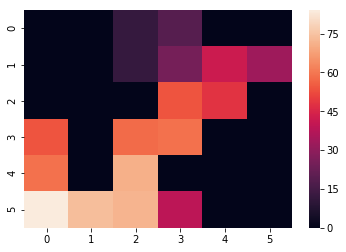

step:815 MAP


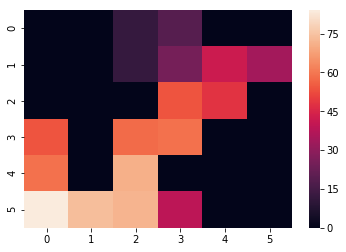

step:816 MAP


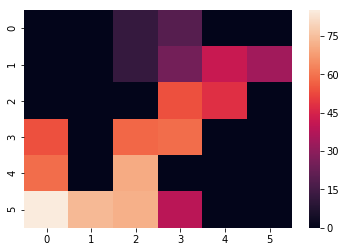

step:817 MAP


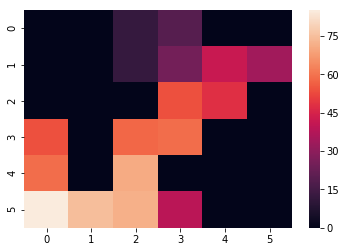

step:818 MAP


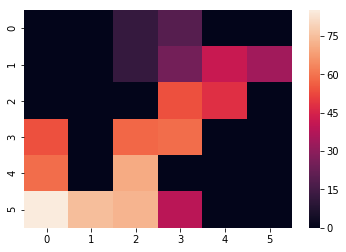

step:819 MAP


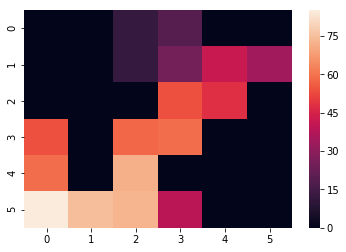

step:820 MAP


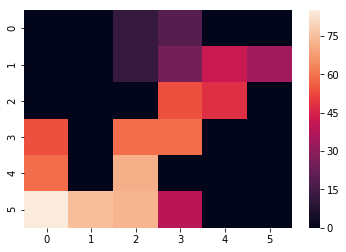

step:821 MAP


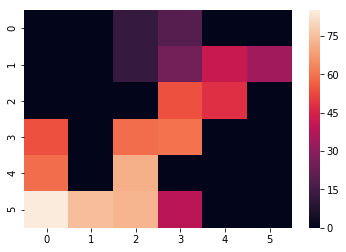

step:822 MAP


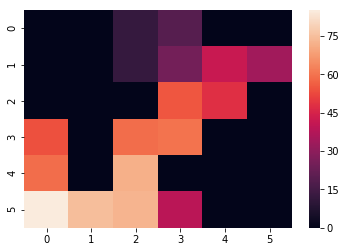

step:823 MAP


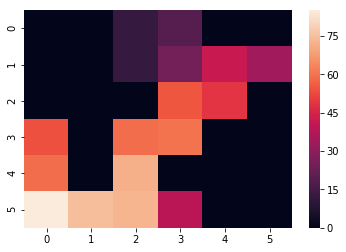

step:824 MAP


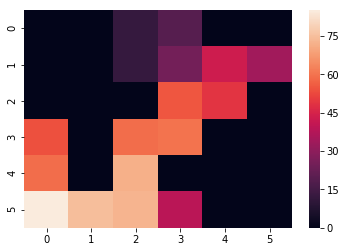

step:825 MAP


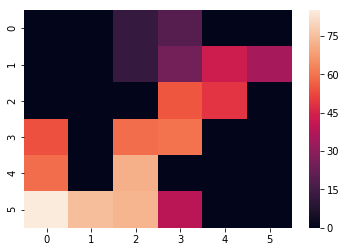

step:826 MAP


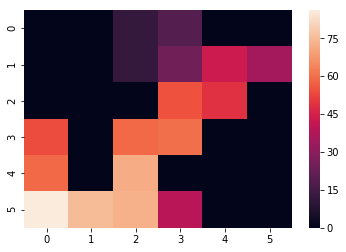

step:827 MAP


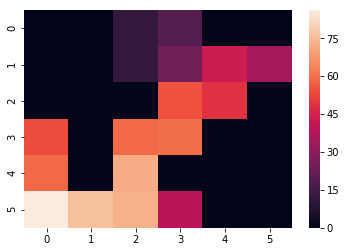

step:828 MAP


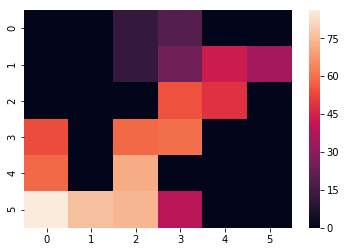

step:829 MAP


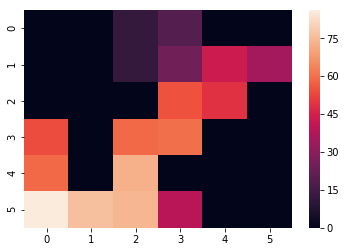

step:830 MAP


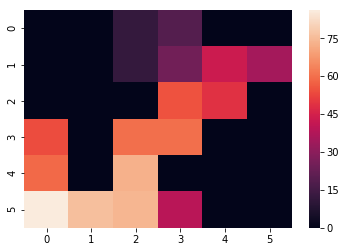

step:831 MAP


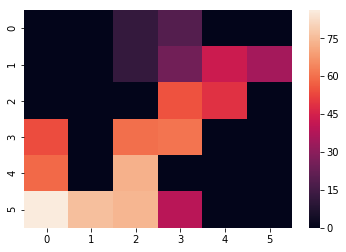

step:832 MAP


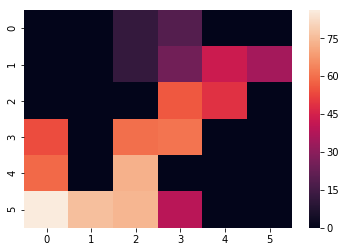

step:833 MAP


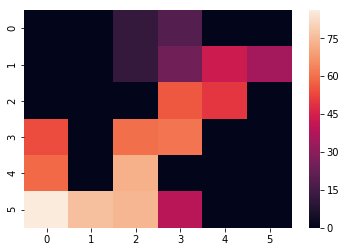

step:834 MAP


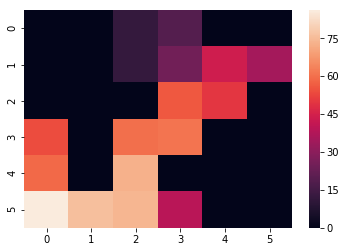

step:835 MAP


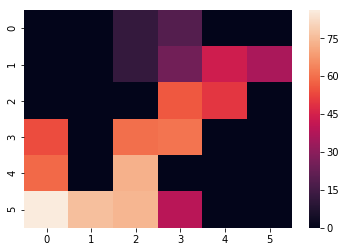

step:836 MAP


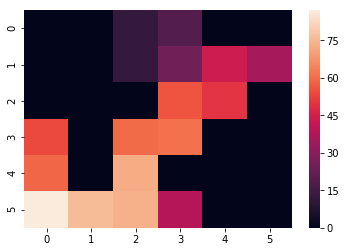

step:837 MAP


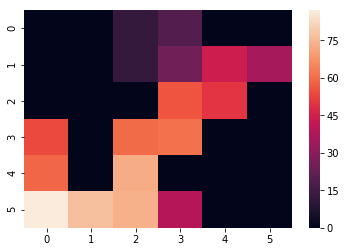

step:838 MAP


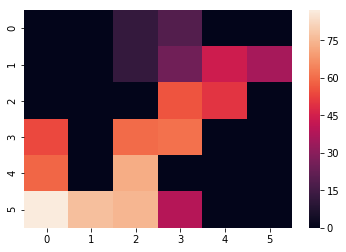

step:839 MAP


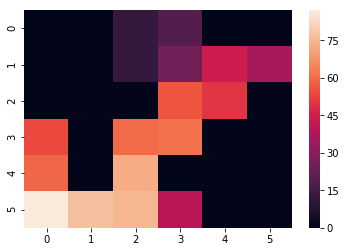

step:840 MAP


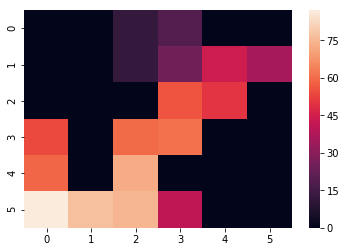

step:841 MAP


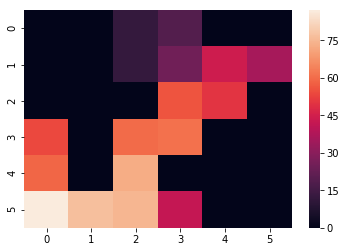

step:842 MAP


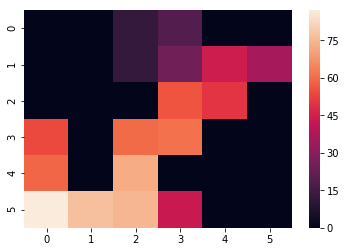

step:843 MAP


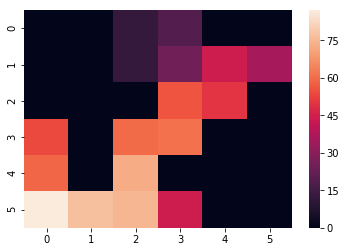

step:844 MAP


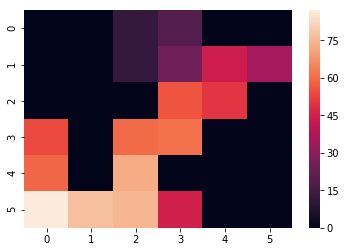

step:845 MAP


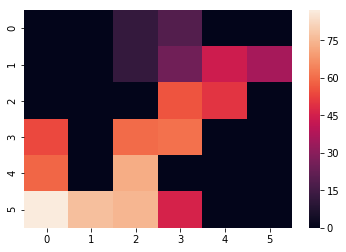

step:846 MAP


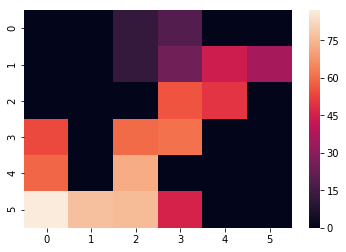

step:847 MAP


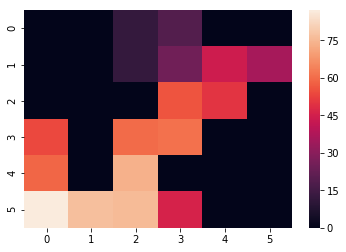

step:848 MAP


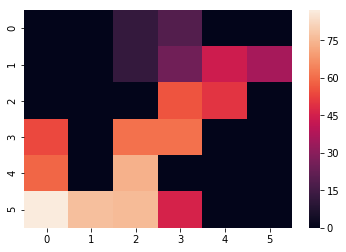

step:849 MAP


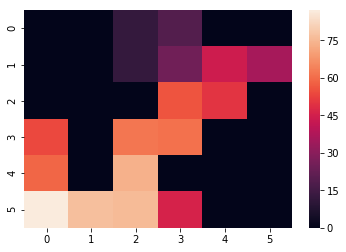

step:850 MAP


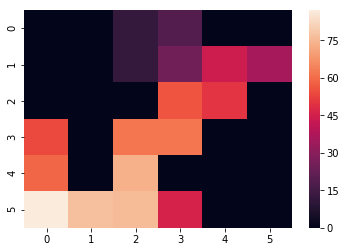

step:851 MAP


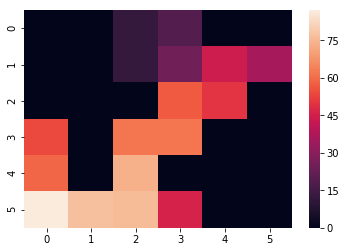

step:852 MAP


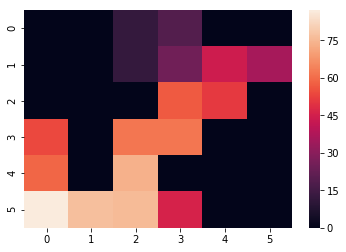

step:853 MAP


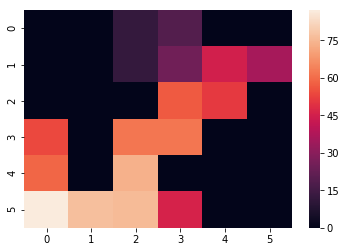

step:854 MAP


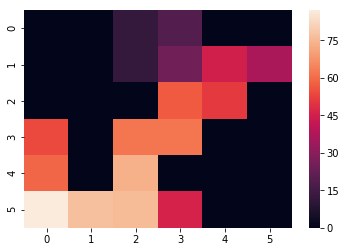

step:855 MAP


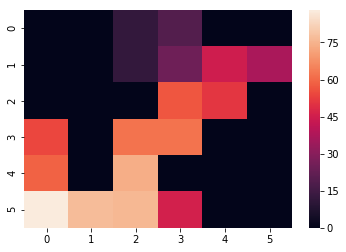

step:856 MAP


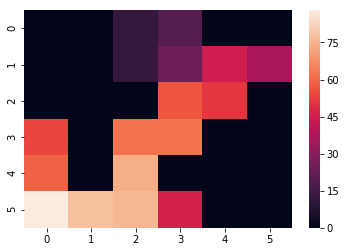

step:857 MAP


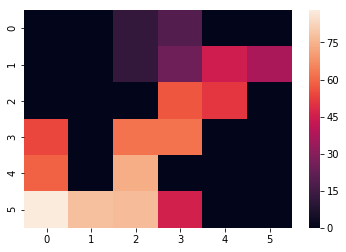

step:858 MAP


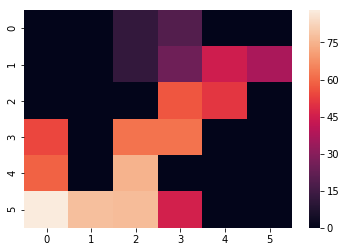

step:859 MAP


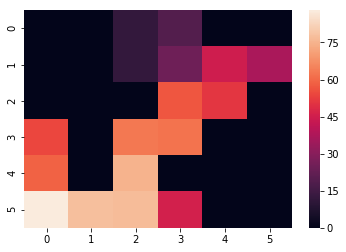

step:860 MAP


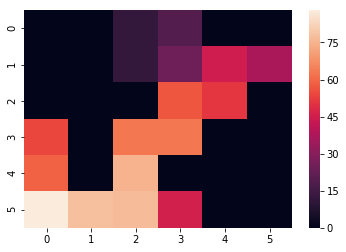

step:861 MAP


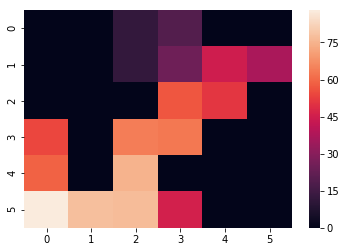

step:862 MAP


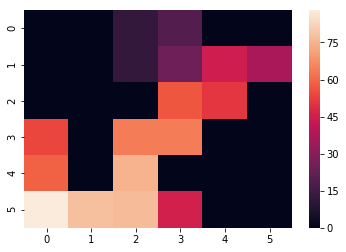

step:863 MAP


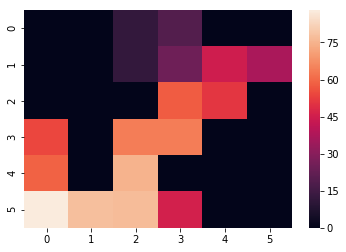

step:864 MAP


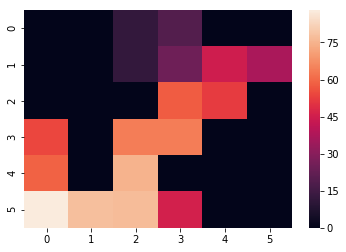

step:865 MAP


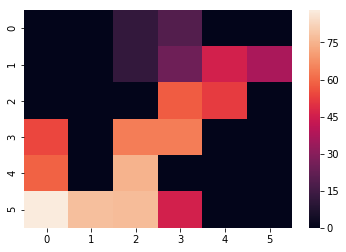

step:866 MAP


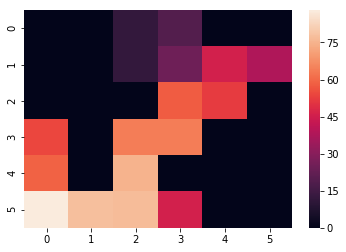

step:867 MAP


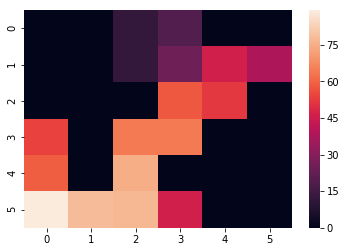

step:868 MAP


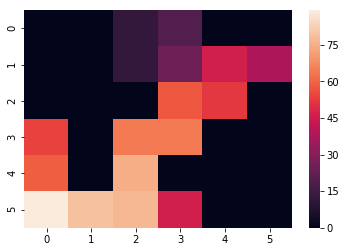

step:869 MAP


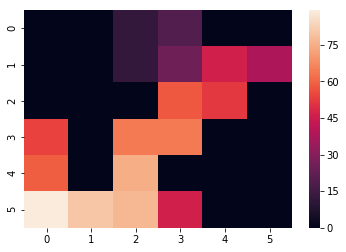

step:870 MAP


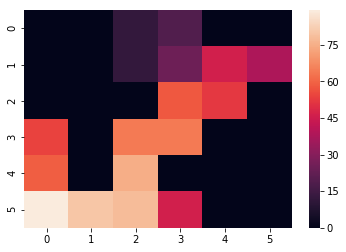

step:871 MAP


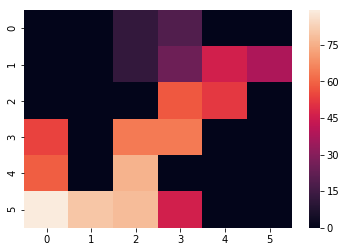

step:872 MAP


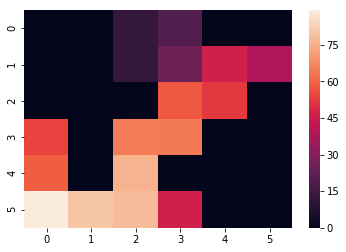

step:873 MAP


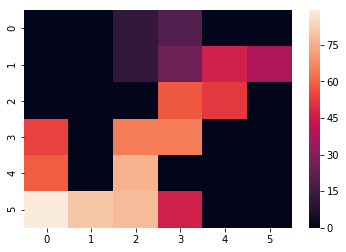

step:874 MAP


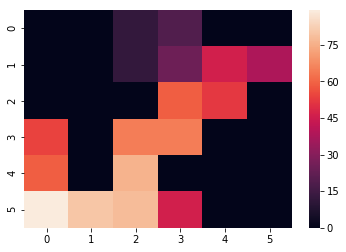

step:875 MAP


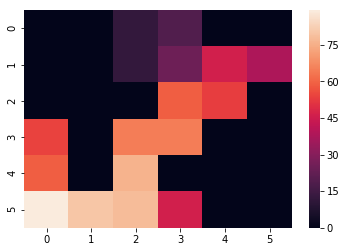

step:876 MAP


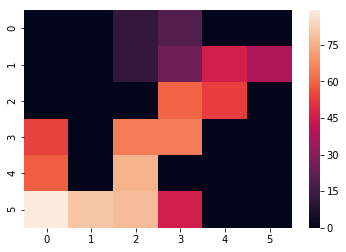

step:877 MAP


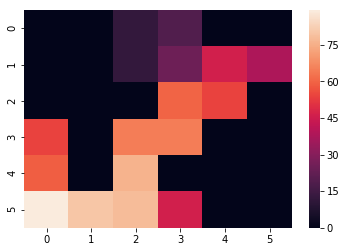

step:878 MAP


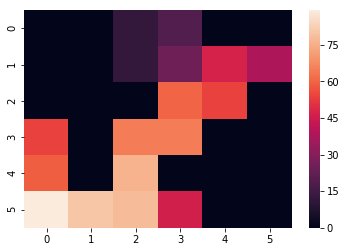

step:879 MAP


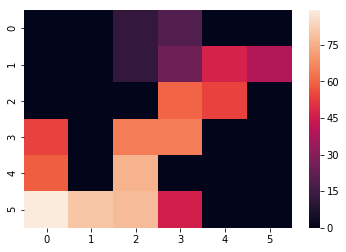

step:880 MAP


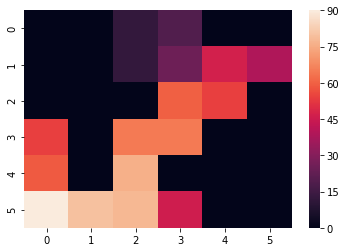

step:881 MAP


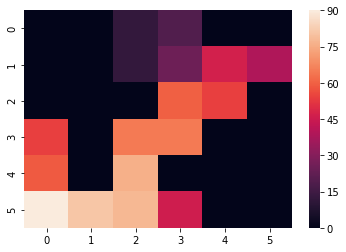

step:882 MAP


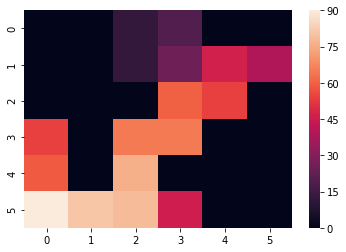

step:883 MAP


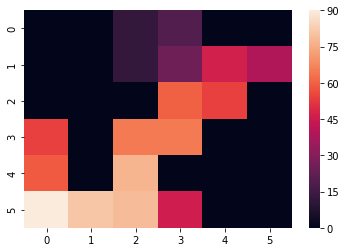

step:884 MAP


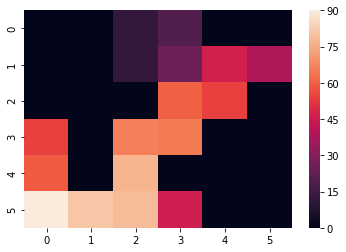

step:885 MAP


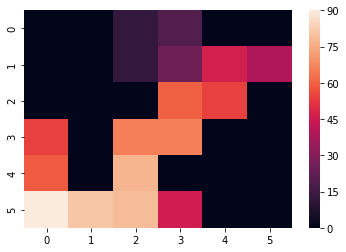

step:886 MAP


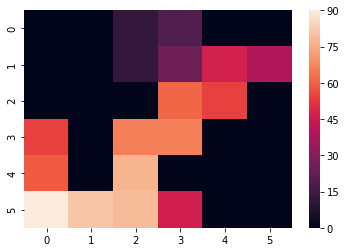

step:887 MAP


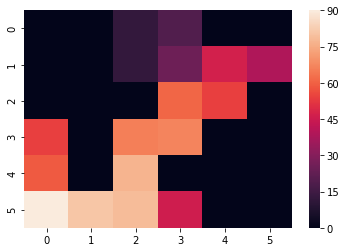

step:888 MAP


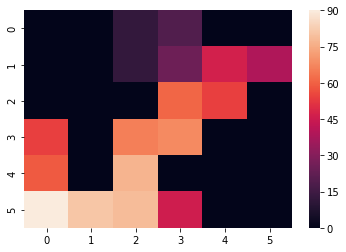

step:889 MAP


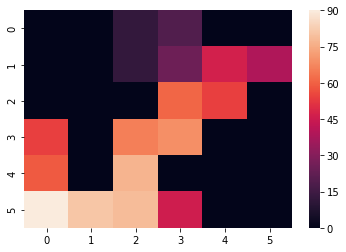

step:890 MAP


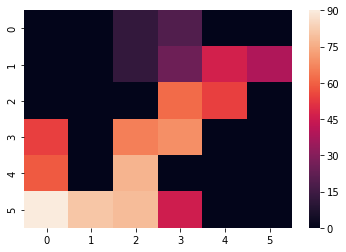

step:891 MAP


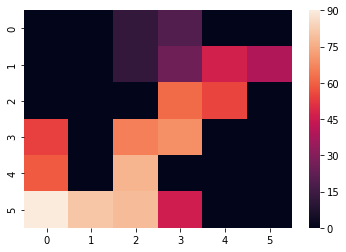

step:892 MAP


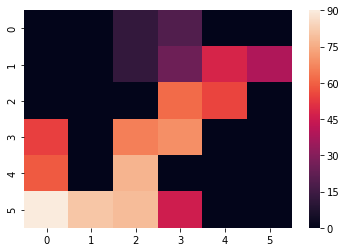

step:893 MAP


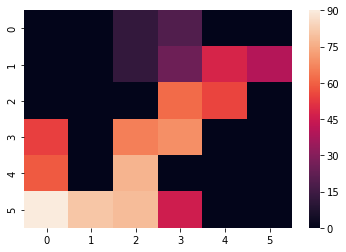

step:894 MAP


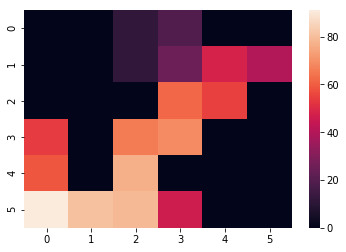

step:895 MAP


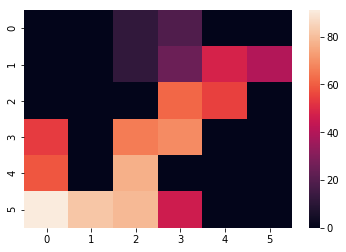

step:896 MAP


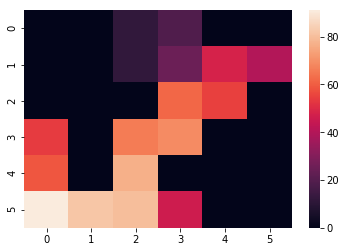

step:897 MAP


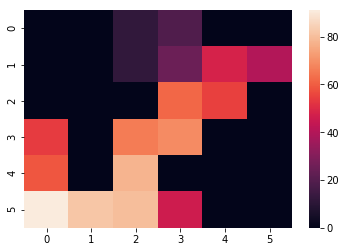

step:898 MAP


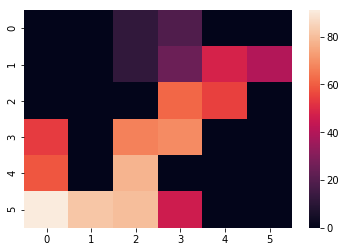

step:899 MAP


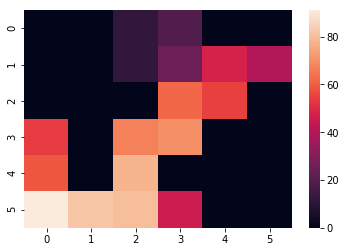

step:900 MAP


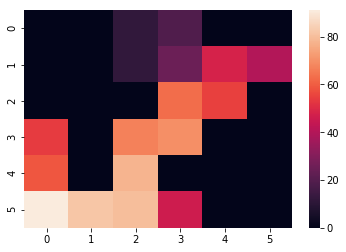

step:901 MAP


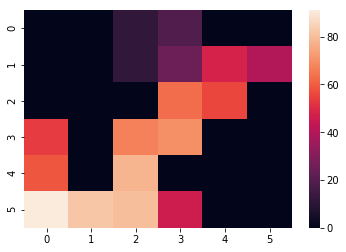

step:902 MAP


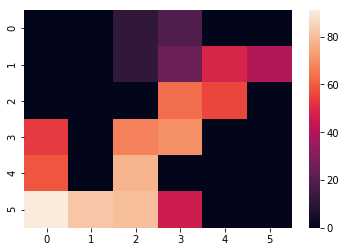

step:903 MAP


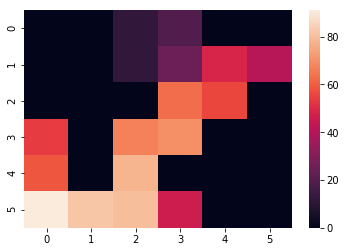

step:904 MAP


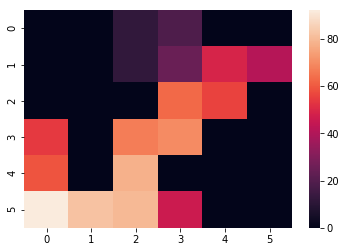

step:905 MAP


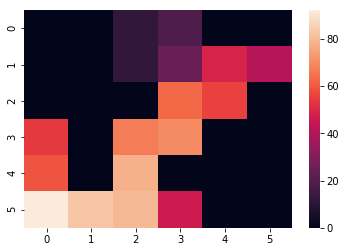

step:906 MAP


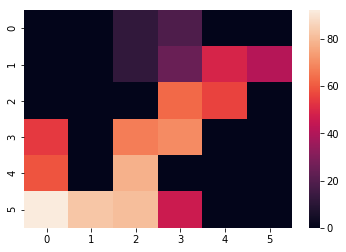

step:907 MAP


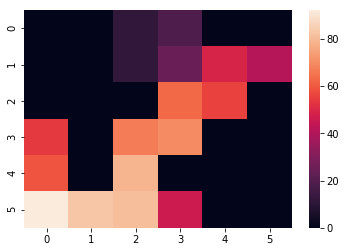

step:908 MAP


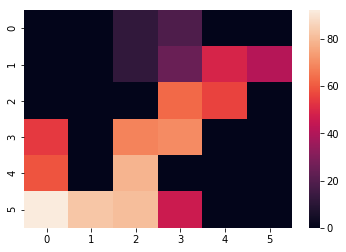

step:909 MAP


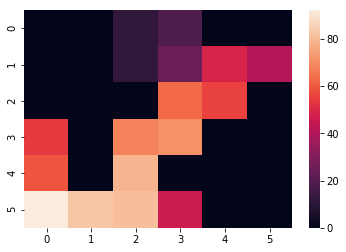

step:910 MAP


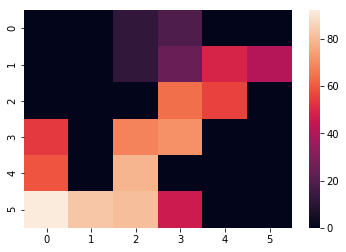

step:911 MAP


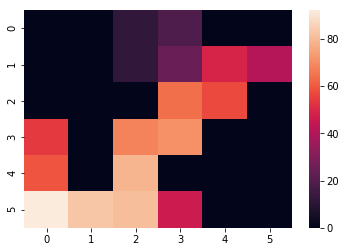

step:912 MAP


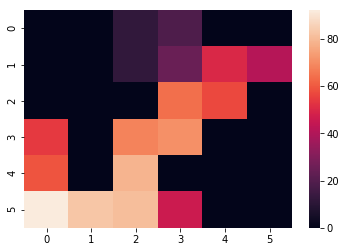

step:913 MAP


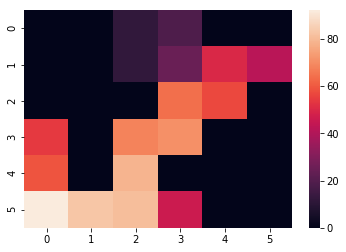

step:914 MAP


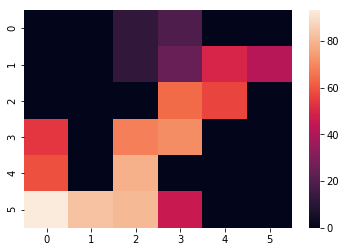

step:915 MAP


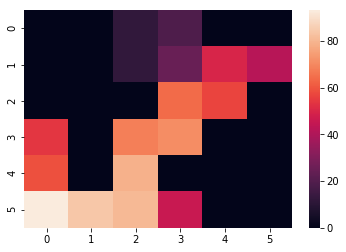

step:916 MAP


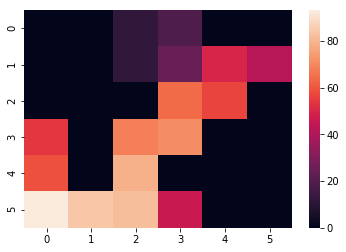

step:917 MAP


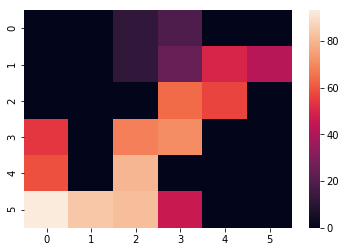

step:918 MAP


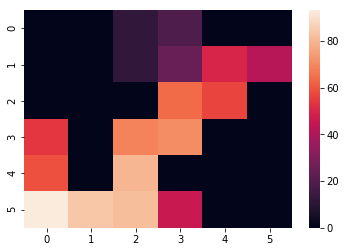

step:919 MAP


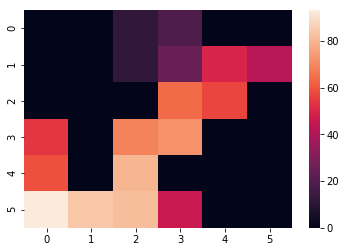

step:920 MAP


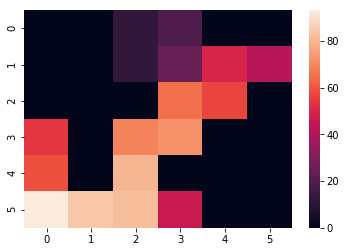

step:921 MAP


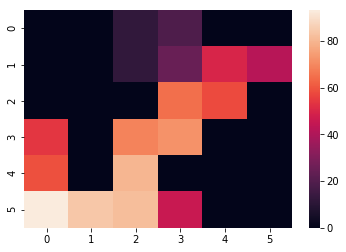

step:922 MAP


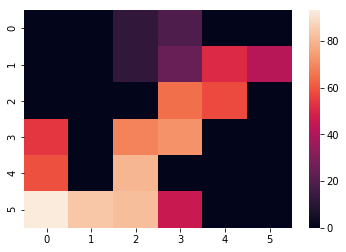

step:923 MAP


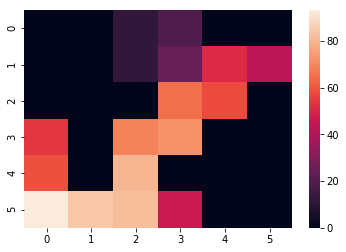

step:924 MAP


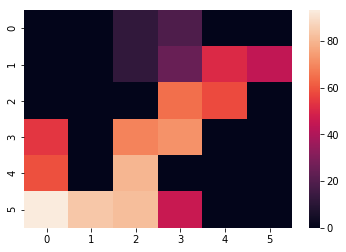

step:925 MAP


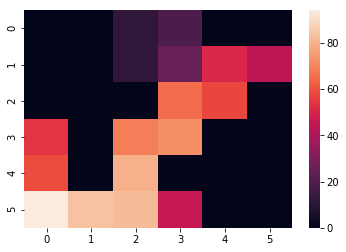

step:926 MAP


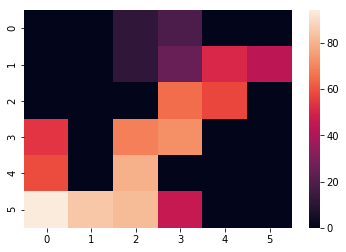

step:927 MAP


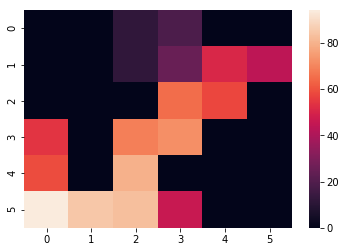

step:928 MAP


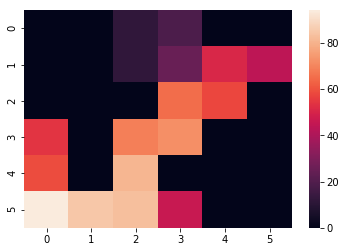

step:929 MAP


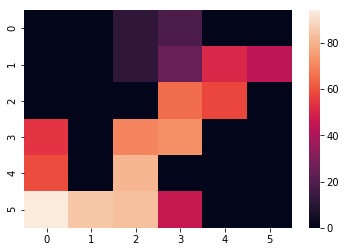

step:930 MAP


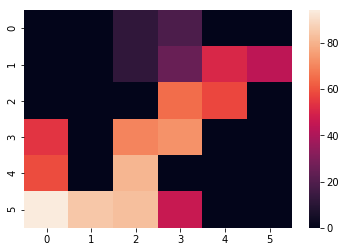

step:931 MAP


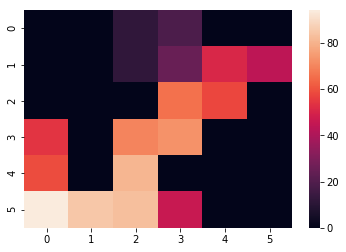

step:932 MAP


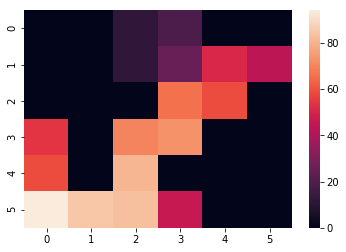

step:933 MAP


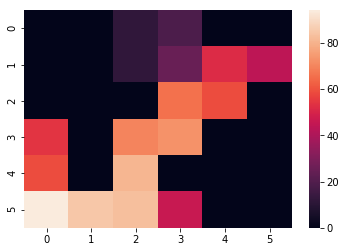

step:934 MAP


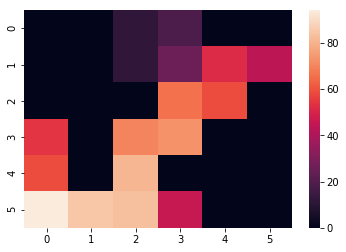

step:935 MAP


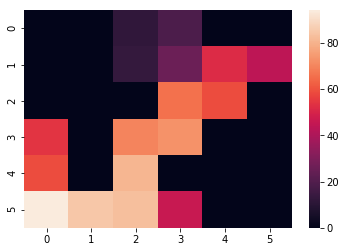

step:936 MAP


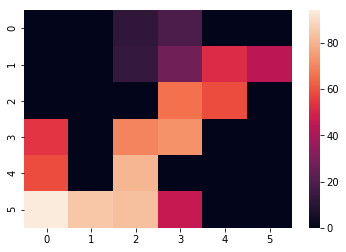

step:937 MAP


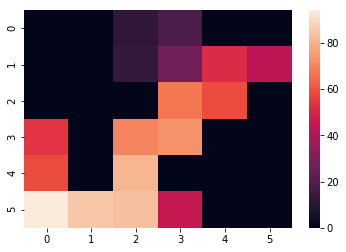

step:938 MAP


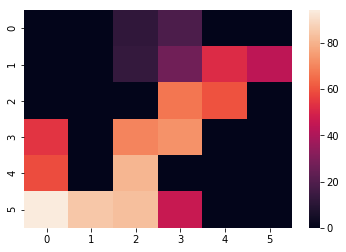

step:939 MAP


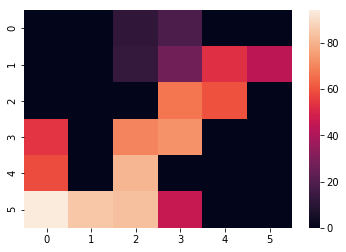

step:940 MAP


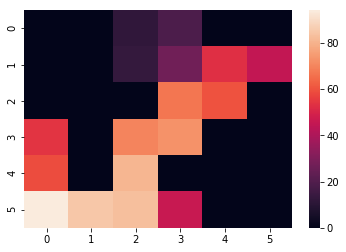

step:941 MAP


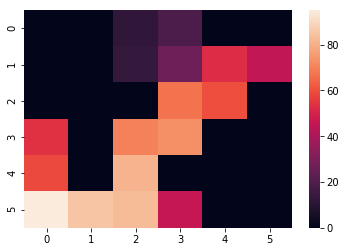

step:942 MAP


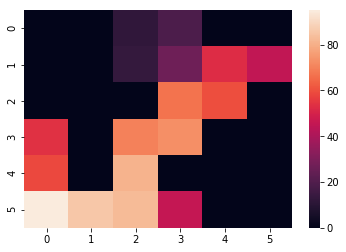

step:943 MAP


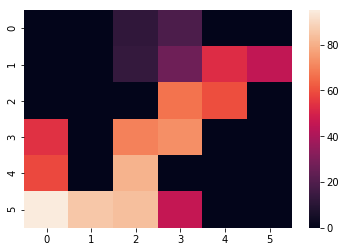

step:944 MAP


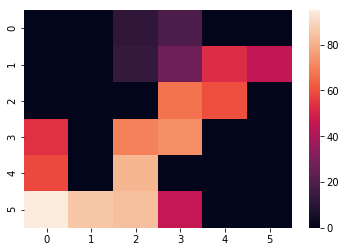

step:945 MAP


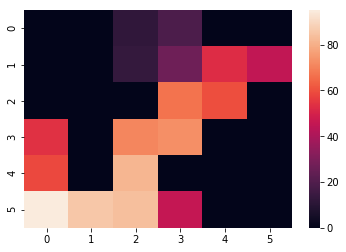

step:946 MAP


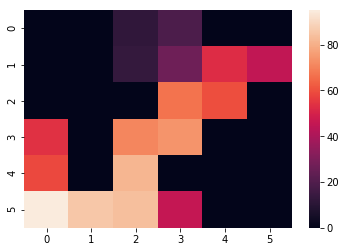

step:947 MAP


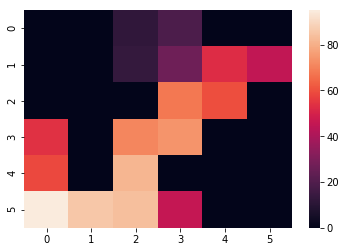

step:948 MAP


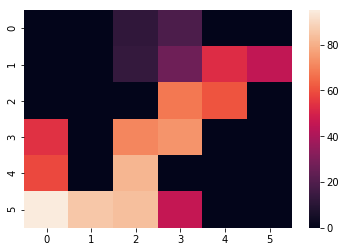

step:949 MAP


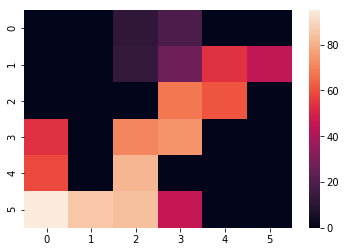

step:950 MAP


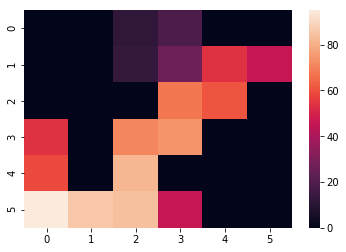

step:951 MAP


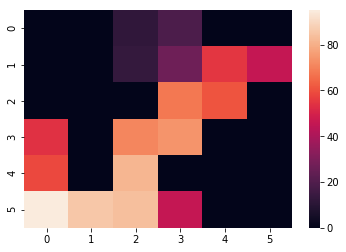

step:952 MAP


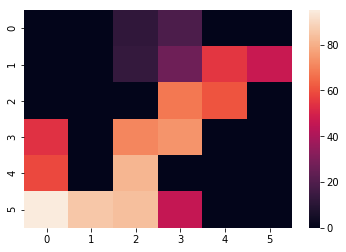

step:953 MAP


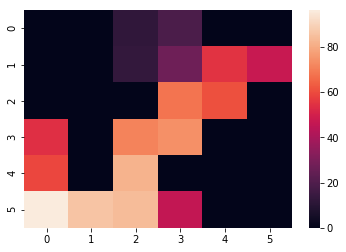

step:954 MAP


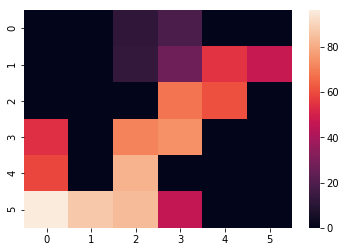

step:955 MAP


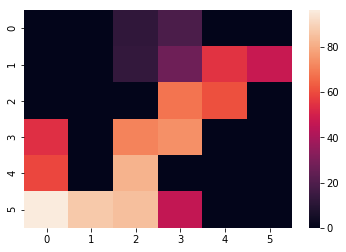

step:956 MAP


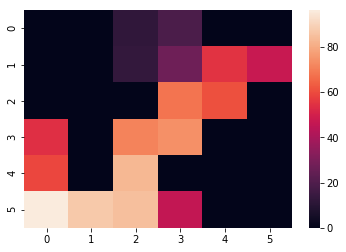

step:957 MAP


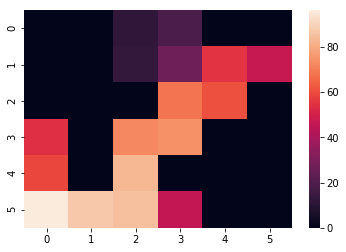

step:958 MAP


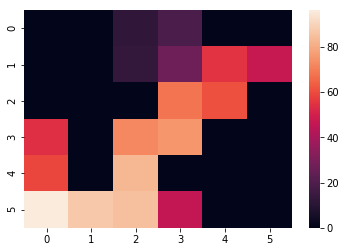

step:959 MAP


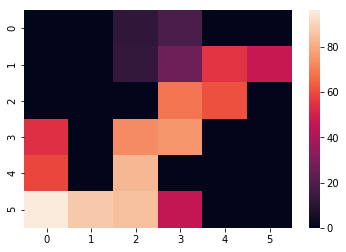

step:960 MAP


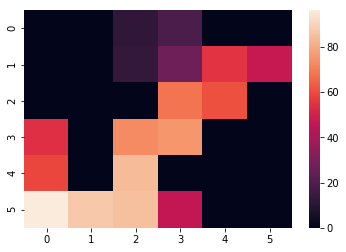

step:961 MAP


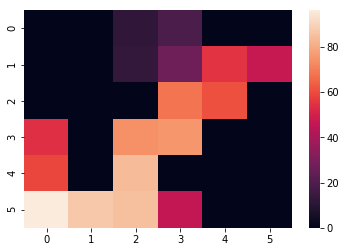

step:962 MAP


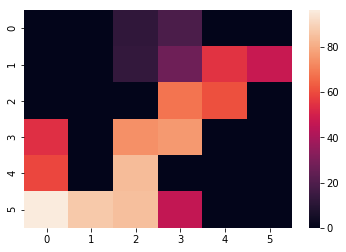

step:963 MAP


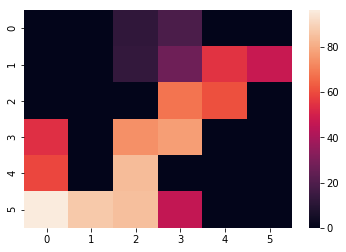

step:964 MAP


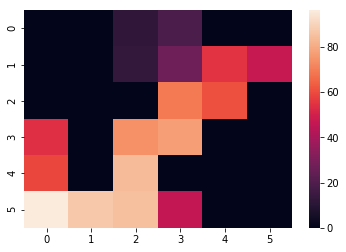

step:965 MAP


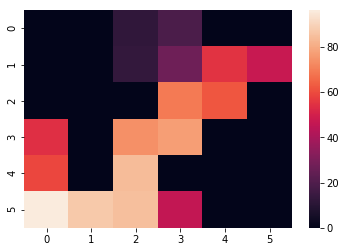

step:966 MAP


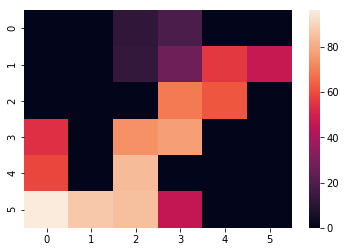

step:967 MAP


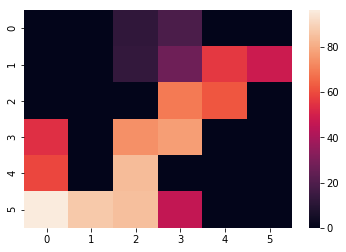

step:968 MAP


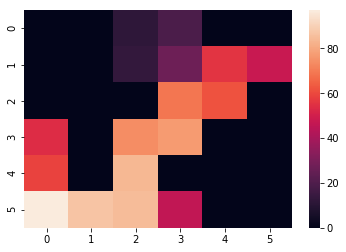

step:969 MAP


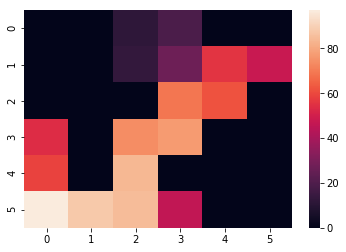

step:970 MAP


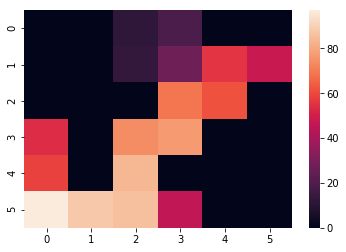

step:971 MAP


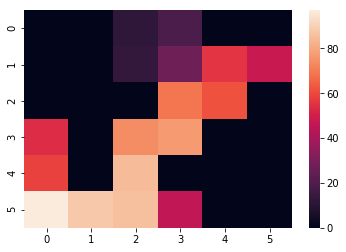

step:972 MAP


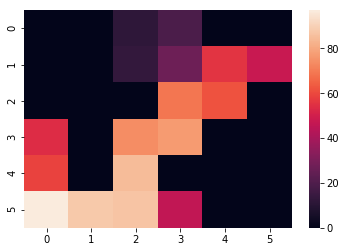

step:973 MAP


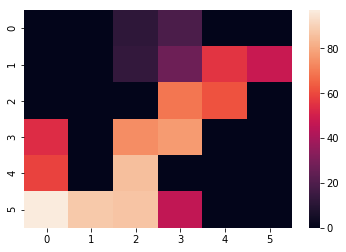

step:974 MAP


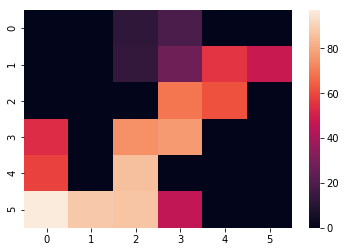

step:975 MAP


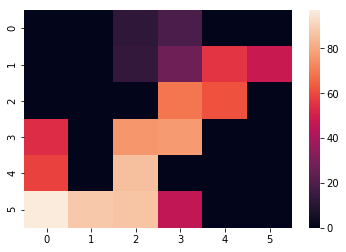

step:976 MAP


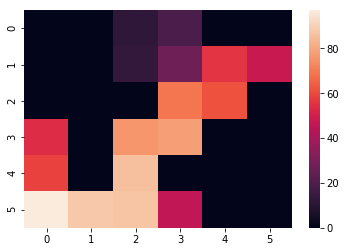

step:977 MAP


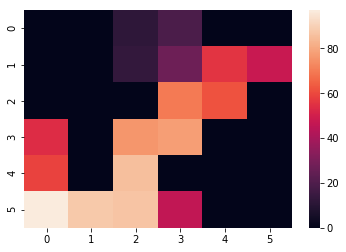

step:978 MAP


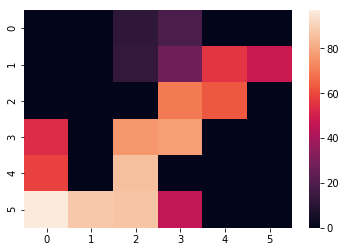

step:979 MAP


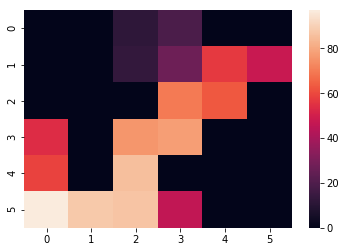

step:980 MAP


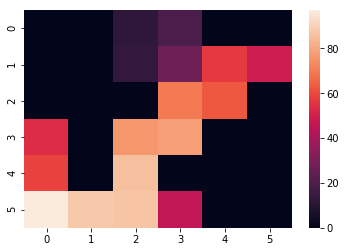

step:981 MAP


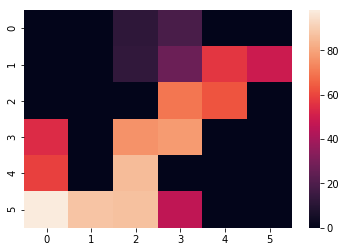

step:982 MAP


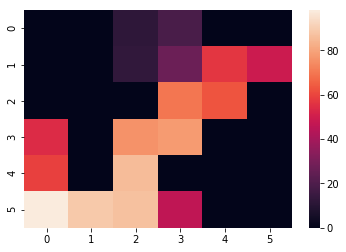

step:983 MAP


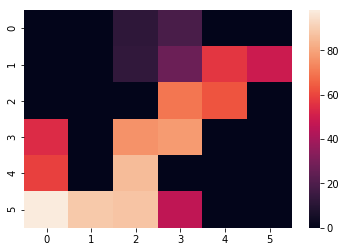

step:984 MAP


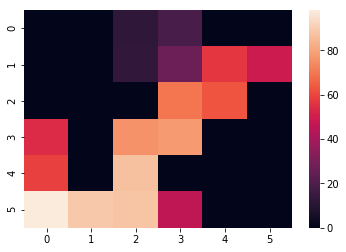

step:985 MAP


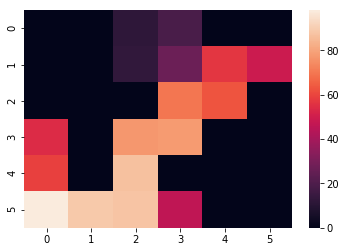

step:986 MAP


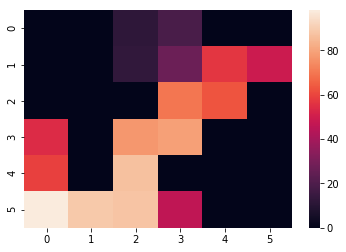

step:987 MAP


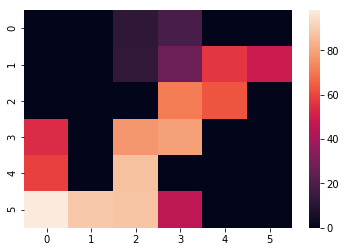

step:988 MAP


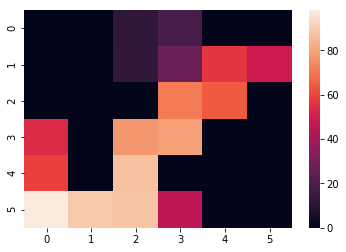

step:989 MAP


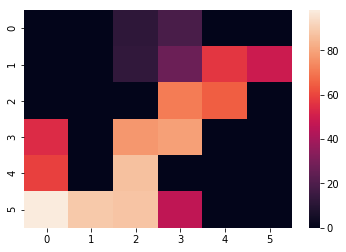

step:990 MAP


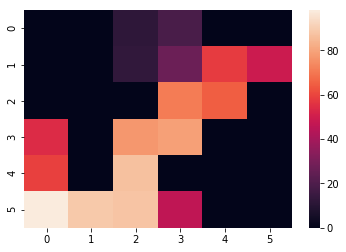

step:991 MAP


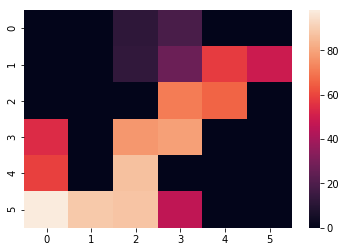

step:992 MAP


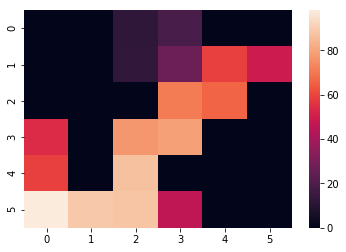

step:993 MAP


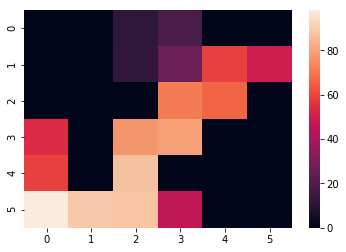

step:994 MAP


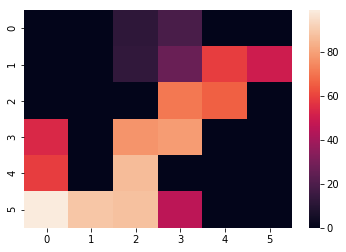

step:995 MAP


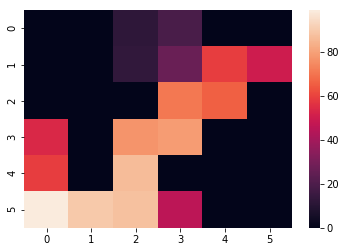

step:996 MAP


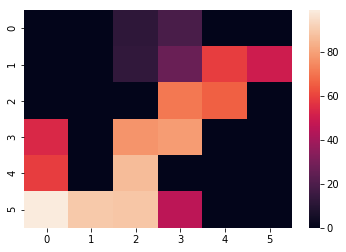

step:997 MAP


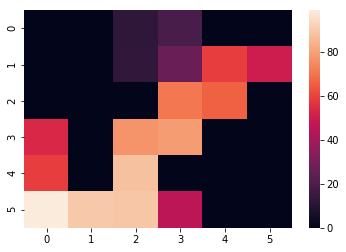

step:998 MAP


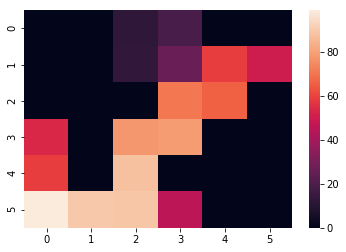

step:999 MAP


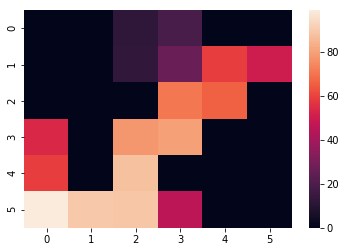

In [20]:
ALPHA = 0.9
GAMMA = 0.9
EPSILON = 0.1
REWARD = 10

Rmat = set_Rmat(states, actions, REWARD)

start = states[-1][0]
goal = states[0][-1]

state = start

history = []
goals = []

num_step = 1000

obstacle = m.obstacle

for step in range(num_step):
    a.take_action(state, EPSILON)
    next_state = state_transition(state, a.action, maze_size, m.obstacle)
    a.update_Q(ALPHA, GAMMA, Rmat, state, next_state, actions)
    history.append(state)
    if next_state == goal:
        state = start
        #print('step:{} Goal!'.format(step))
        goals.append(step)
    else:
        state = next_state
        
    #if step % (num_step / 10) == 0:
    counter = [0] * maze_size * maze_size
    for i in range(len(history)):
            counter[history[i]] += 1
    sns.heatmap(np.reshape(np.array(counter), [maze_size, maze_size]))
    print('step:{} MAP'.format(step))
    plt.show()

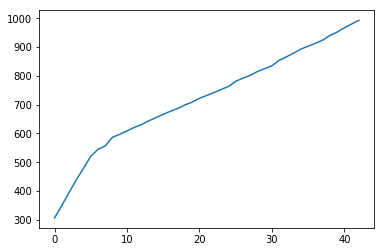

In [21]:
plt.plot(goals)

In [ ]:
sns.heatmap(a.Qmat.max(axis=1).reshape([maze_size, maze_size]))

In [ ]:
#test
EPSILON = 0
history_test = []

state = start

for step in range(100):
    a.take_action(state, EPSILON)
    next_state = state_transition(state, a.action, maze_size, m.obstacle)
    if next_state == goal:
        state = start
    else:
        state = next_state
    history_test.append(state)

In [ ]:
# visualize performance of learned agent
counter = [0] * maze_size * maze_size
for i in range(len(history_test)):
    counter[history_test[i]] += 1
sns.heatmap(np.reshape(np.array(counter), [maze_size, maze_size]))